In [ ]:
from google.colab import drive

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


**Import Dataset**

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/fh_5yrs.csv'

df = pd.read_csv(path)

**Preprocessing**

In [ ]:
df

date  volume       open       high        low      close  \
0        2020-07-02  257500  17.639999  17.740000  17.620001  17.709999   
1        2020-07-01  468100  17.730000  17.730000  17.540001  17.680000   
2        2020-06-30  319100  17.650000  17.799999  17.610001  17.780001   
3        2020-06-29  405500  17.670000  17.690001  17.629999  17.680000   
4        2020-06-26  335100  17.490000  17.670000  17.420000  17.670000   
...             ...     ...        ...        ...        ...        ...   
6852033  2015-01-12   10000   0.140000   0.140000   0.140000   0.140000   
6852034  2015-01-09     200   0.150000   0.150000   0.150000   0.150000   
6852035  2015-01-07    8100   0.140000   0.150000   0.130000   0.150000   
6852036  2015-01-05   33200   0.220000   0.220000   0.140000   0.160000   
6852037  2015-01-02     100   0.180000   0.180000   0.180000   0.180000   

          adjclose symbol  
0        17.709999   AAAU  
1        17.680000   AAAU  
2        17.780001   AAAU  
3        17.680000   AAAU  
4        17.670000   AAAU  
...            ...    ...  
6852033   0.136302   ZYXI  
6852034   0.146038   ZYXI  
6852035   0.146038   ZYXI  
6852036   0.155774   ZYXI  
6852037   0.175245   ZYXI  

[6852038 rows x 8 columns]

In [ ]:
# Check for null values
df.isnull().sum()

date        0
volume      0
open        0
high        0
low         0
close       0
adjclose    0
symbol      0
dtype: int64

In [ ]:
# Change date to datetime object
df.date = pd.to_datetime(df.date)

In [ ]:
# Sort the dataframe by symbol and date
df.sort_values(by = ['symbol', 'date'], inplace = True)
df.head()

date  volume   open   high    low  close  adjclose symbol
473 2018-08-15   27300  11.84  11.84  11.74  11.74     11.74   AAAU
472 2018-08-16  428400  11.78  11.80  11.74  11.74     11.74   AAAU
471 2018-08-17   52400  11.80  11.82  11.77  11.82     11.82   AAAU
470 2018-08-20   28700  11.88  11.91  11.85  11.90     11.90   AAAU
469 2018-08-21   30600  11.92  11.95  11.89  11.93     11.93   AAAU

In [ ]:
df.reset_index(drop = True, inplace = True)
df.head()

date  volume   open   high    low  close  adjclose symbol
0 2018-08-15   27300  11.84  11.84  11.74  11.74     11.74   AAAU
1 2018-08-16  428400  11.78  11.80  11.74  11.74     11.74   AAAU
2 2018-08-17   52400  11.80  11.82  11.77  11.82     11.82   AAAU
3 2018-08-20   28700  11.88  11.91  11.85  11.90     11.90   AAAU
4 2018-08-21   30600  11.92  11.95  11.89  11.93     11.93   AAAU

**Picking out 4 different stocks to use**

1) GDX - VanEck Gold Miners ETF

2) TWTR - Twitter Inc

3) USAK - USA Truck, Inc

4) UVSP - Univest Financial Corp

In [ ]:
# Retrieving the stock from original dataframe and assign onto stock name variable
stock_list = ['GDX','TWTR', 'USAK', "UVSP"]

for stock in stock_list:
  globals()[stock] = df[df.symbol == stock].copy()

In [ ]:
GDX.head()

date    volume       open       high        low      close  \
2558113 2015-01-02  47287400  18.070000  18.950001  17.950001  18.940001   
2558114 2015-01-05  46021100  19.059999  19.469999  18.760000  19.440001   
2558115 2015-01-06  76091200  19.629999  20.690001  19.540001  20.469999   
2558116 2015-01-07  45809700  20.010000  20.670000  19.820000  20.090000   
2558117 2015-01-08  46813900  20.230000  20.570000  19.610001  19.790001   

          adjclose symbol  
2558113  18.347082    GDX  
2558114  18.831429    GDX  
2558115  19.829184    GDX  
2558116  19.461082    GDX  
2558117  19.170473    GDX

In [ ]:
TWTR.head()

date    volume       open       high        low      close  \
6182867 2015-01-02  12062500  36.230000  36.740002  35.540001  36.560001   
6182868 2015-01-05  15062700  36.259998  37.110001  35.639999  36.380001   
6182869 2015-01-06  33050800  36.270000  39.450001  36.040001  38.759998   
6182870 2015-01-07  22675700  39.099998  39.099998  37.060001  37.279999   
6182871 2015-01-08  19190400  37.419998  39.189999  37.090000  39.090000   

          adjclose symbol  
6182867  36.560001   TWTR  
6182868  36.380001   TWTR  
6182869  38.759998   TWTR  
6182870  37.279999   TWTR  
6182871  39.090000   TWTR

In [ ]:
USAK.head()

date  volume       open       high        low      close  \
6297632 2015-01-02   55000  28.709999  28.730000  26.629999  27.889999   
6297633 2015-01-05   73700  27.799999  28.080000  27.120001  27.240000   
6297634 2015-01-06   51600  27.389999  27.450001  25.730000  26.590000   
6297635 2015-01-07   48300  25.340000  27.379999  25.010000  27.260000   
6297636 2015-01-08   83100  27.650000  27.850000  27.139999  27.740000   

          adjclose symbol  
6297632  27.889999   USAK  
6297633  27.240000   USAK  
6297634  26.590000   USAK  
6297635  27.260000   USAK  
6297636  27.740000   USAK

In [ ]:
UVSP.head()

date  volume       open       high        low      close  \
6345881 2015-01-02   30200  20.469999  20.610001  19.770000  19.990000   
6345882 2015-01-05   22100  19.799999  20.100000  19.799999  19.940001   
6345883 2015-01-06   36100  19.950001  20.049999  19.639999  19.740000   
6345884 2015-01-07   14900  19.889999  19.930000  19.650000  19.930000   
6345885 2015-01-08   15000  20.120001  20.270000  19.750000  20.209999   

          adjclose symbol  
6345881  16.558008   UVSP  
6345882  16.516598   UVSP  
6345883  16.350933   UVSP  
6345884  16.508314   UVSP  
6345885  16.740240   UVSP

In [ ]:
# Resets each dataframe index
for stock in stock_list:
  globals()[stock].reset_index(drop=True, inplace=True)

In [ ]:
# Check if date column for each stock is unique # When including date in index, there cannot be any duplicate values
for stock in stock_list:
  print(globals()[stock].date.is_unique)

True
True
True
True


In [ ]:
# Set each dataframe index to date
for stock in stock_list:
  globals()[stock].set_index('date', inplace = True)

In [ ]:
# Drops symbol column
for stock in stock_list:
  globals()[stock].drop(columns = 'symbol', inplace = True)

EDA - Exploratory Data Analysis

In [ ]:
# Retrieving the duration of each dataset

for stock in stock_list:
  start_date = globals()[stock].index[0]
  end_date = globals()[stock].index[-1]

  duration = end_date - start_date

  print(f'Stock duration for {stock}')
  print(f'Start date: {start_date}')
  print(f'End date: {end_date}')
  print(f'Duration: {duration}\n')

Stock duration for GDX
Start date: 2015-01-02 00:00:00
End date: 2020-07-02 00:00:00
Duration: 2008 days 00:00:00

Stock duration for TWTR
Start date: 2015-01-02 00:00:00
End date: 2020-07-02 00:00:00
Duration: 2008 days 00:00:00

Stock duration for USAK
Start date: 2015-01-02 00:00:00
End date: 2020-07-02 00:00:00
Duration: 2008 days 00:00:00

Stock duration for UVSP
Start date: 2015-01-02 00:00:00
End date: 2020-07-02 00:00:00
Duration: 2008 days 00:00:00



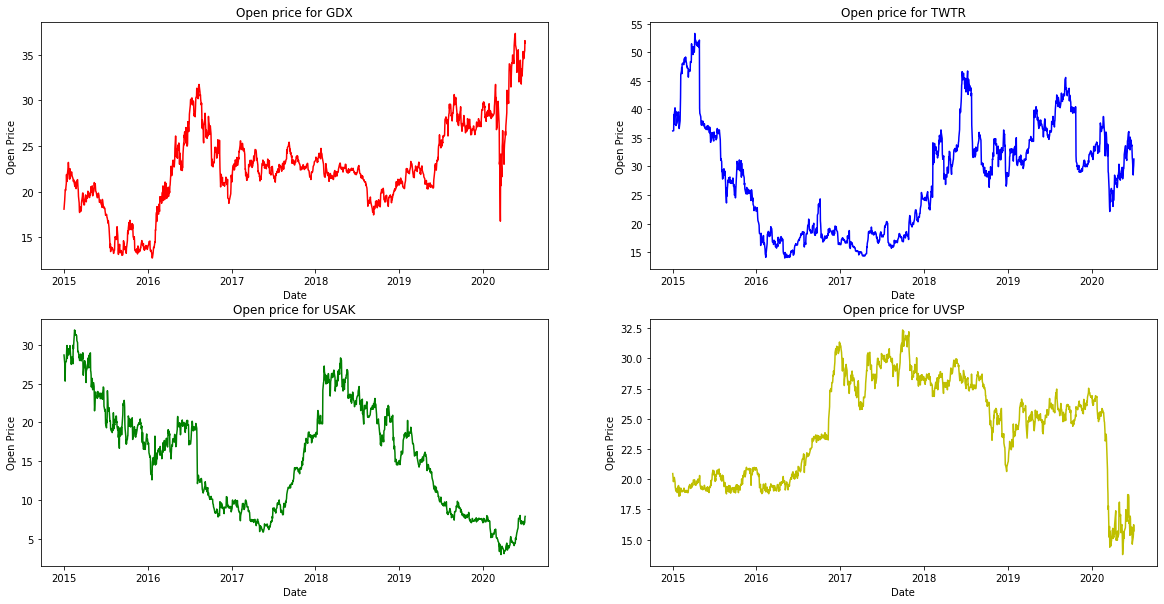

In [ ]:
# Graphing the open price for each of the stocks
plt.figure(figsize = (20, 10))

color_list = ['r', 'b', 'g', 'y']

for i, stock in enumerate(stock_list):
  plt.subplot(2, 2, i+1)
  plt.plot(globals()[stock].open, color = color_list[i])
  plt.ylabel('Open Price')
  plt.xlabel('Date')
  plt.title(f'Open price for {stock}')

plt.show()

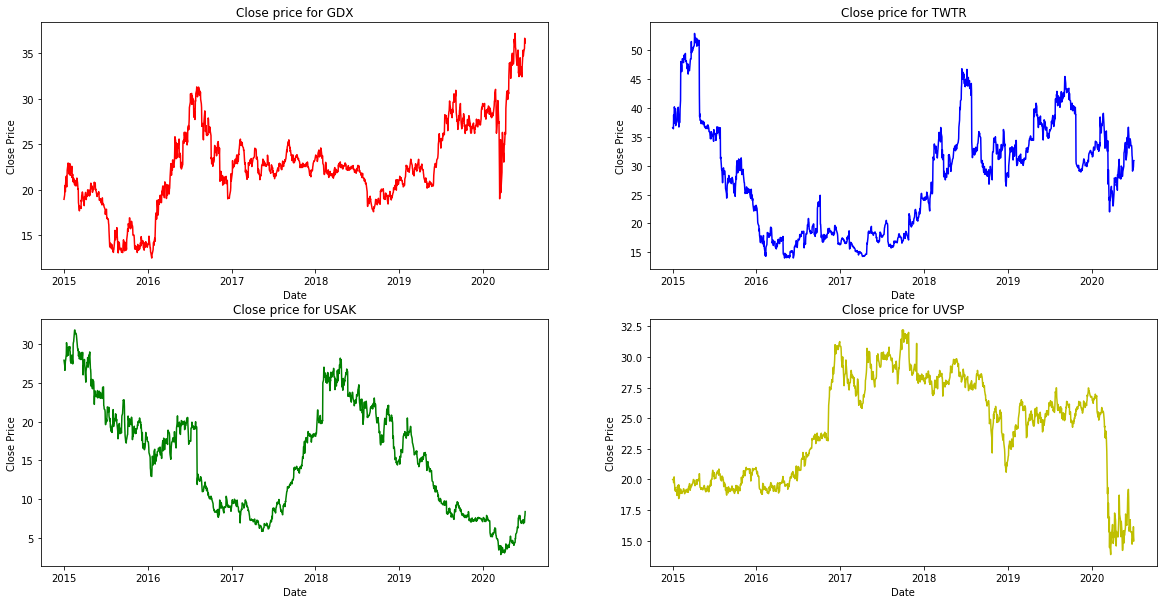

In [ ]:
# Graphing the close price for each of the stocks
plt.figure(figsize = (20, 10))

color_list = ['r', 'b', 'g', 'y']

for i, stock in enumerate(stock_list):
  plt.subplot(2, 2, i+1)
  plt.plot(globals()[stock].close, color = color_list[i])
  plt.ylabel('Close Price')
  plt.xlabel('Date')
  plt.title(f'Close price for {stock}')

plt.show()

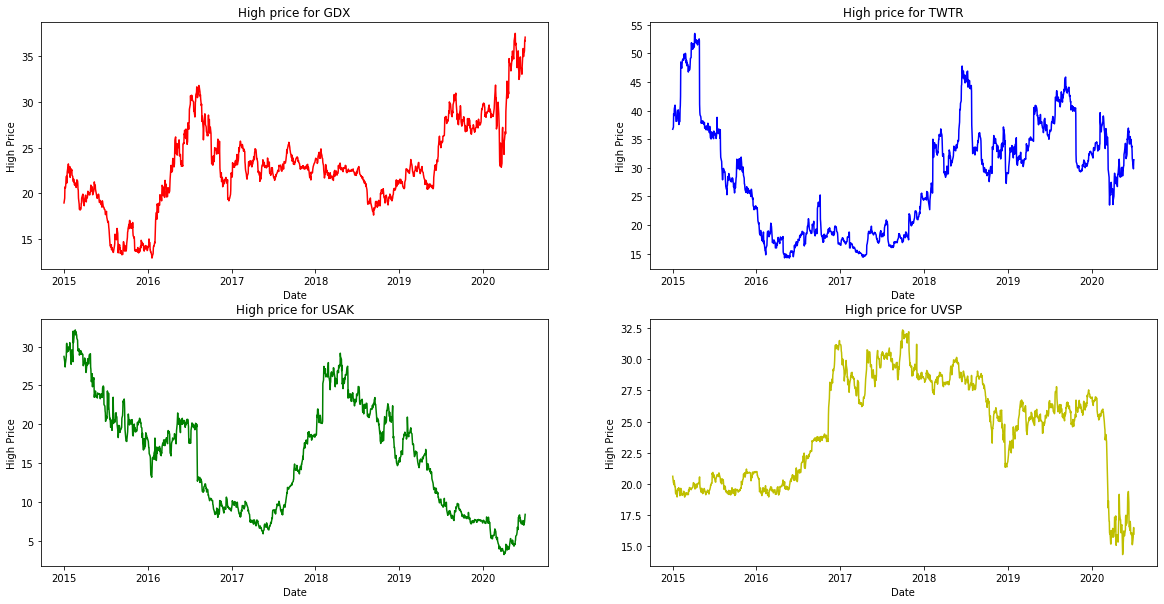

In [ ]:
# Graphing the high price for each of the stocks
plt.figure(figsize = (20, 10))

color_list = ['r', 'b', 'g', 'y']

for i, stock in enumerate(stock_list):
  plt.subplot(2, 2, i+1)
  plt.plot(globals()[stock].high, color = color_list[i])
  plt.ylabel('High Price')
  plt.xlabel('Date')
  plt.title(f'High price for {stock}')

plt.show()

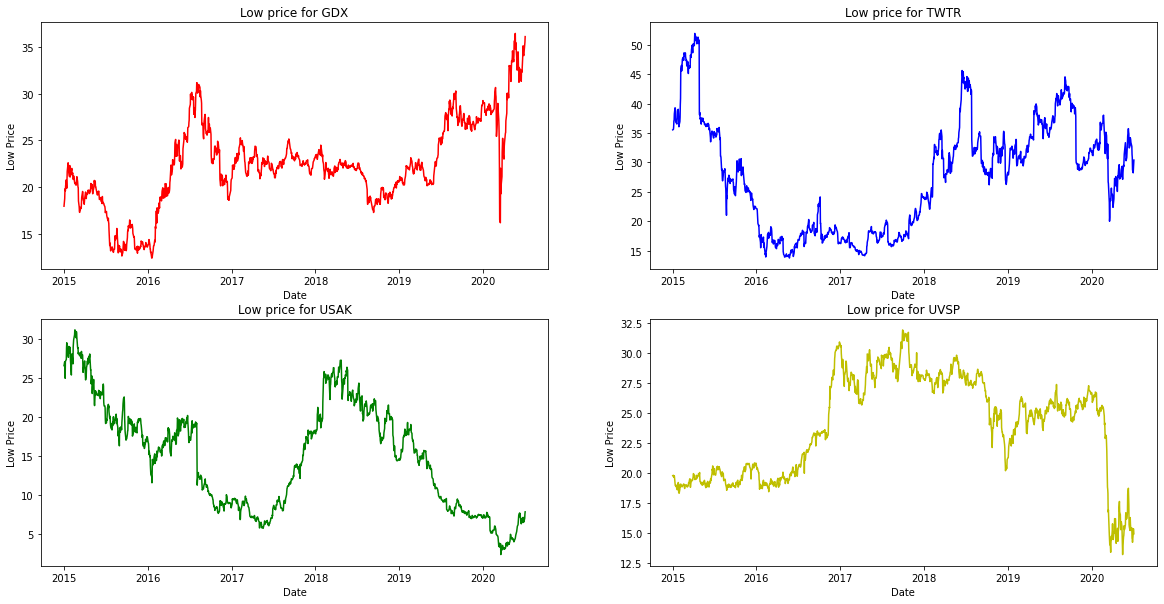

In [ ]:
# Graphing the low price for each of the stocks
plt.figure(figsize = (20, 10))

color_list = ['r', 'b', 'g', 'y']

for i, stock in enumerate(stock_list):
  plt.subplot(2, 2, i+1)
  plt.plot(globals()[stock].low, color = color_list[i])
  plt.ylabel('Low Price')
  plt.xlabel('Date')
  plt.title(f'Low price for {stock}')

plt.show()

Preparation and Preprocessing for close price prediction

In [ ]:
# Creating new dataframe that consists of each stock's close column
for stock in stock_list:
  globals()[stock + '_close'] = globals()[stock][['close']].copy()

# Checking for null values in close column for each stock
for stock in stock_list:
  print(globals()[stock + '_close'].isnull().sum())
  print()

close    0
dtype: int64

close    0
dtype: int64

close    0
dtype: int64

close    0
dtype: int64



In [ ]:
# Printing close stock shape

for stock in stock_list:
  print('Shape of {}: {}'.format(stock, globals()[stock + '_close'].shape))

Shape of GDX: (1385, 1)
Shape of TWTR: (1385, 1)
Shape of USAK: (1385, 1)
Shape of UVSP: (1385, 1)


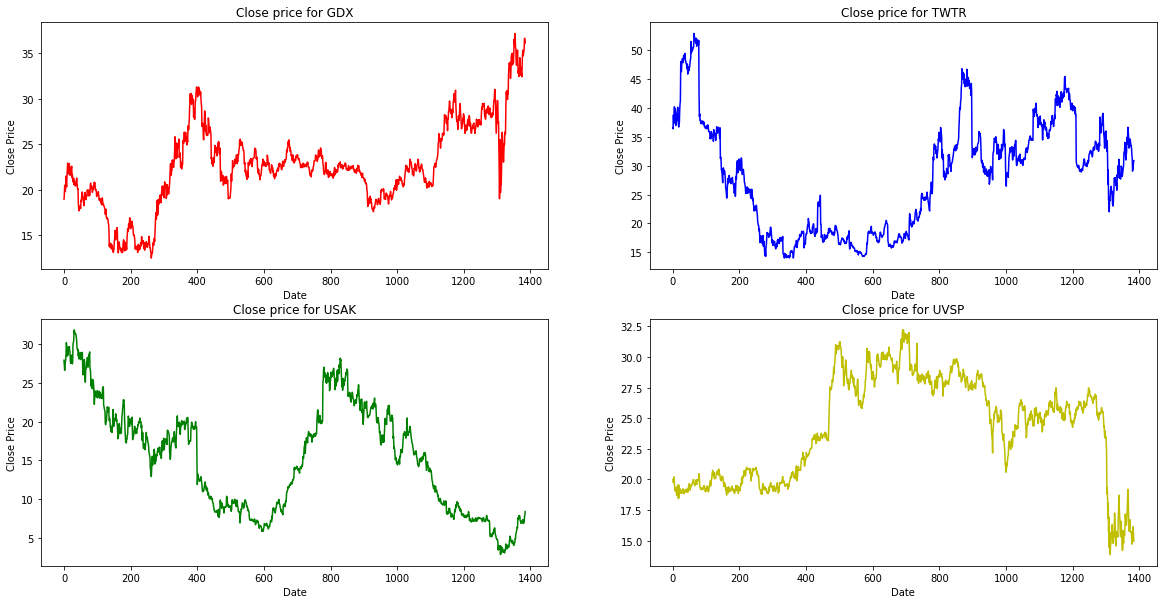

In [ ]:
# Plotting the close price graph for each stock
plt.figure(figsize = (20, 10))

color_list = ['r', 'b', 'g', 'y']

for i, stock in enumerate(stock_list):
  plt.subplot(2, 2, i+1)
  plt.plot(globals()[stock + '_close'].values, color = color_list[i])
  plt.ylabel('Close Price')
  plt.xlabel('Date')
  plt.title(f'Close price for {stock}')

plt.show()

In [ ]:
# Normalize the data
for stock in stock_list:
  globals()[stock + '_scaler'] = MinMaxScaler(feature_range = (0, 1))
  globals()[stock + '_transform'] = globals()[stock + '_scaler'].fit_transform(globals()[stock + '_close'])

In [ ]:
# Split data into train (80%) and test (20%)
training_size = int(np.ceil(len(GDX_transform) * 0.80))

for stock in stock_list:
  globals()[stock + '_train'] = globals()[stock + '_transform'][:training_size]

  globals()[stock + '_test'] = globals()[stock + '_transform'][training_size:]

# Print out the shape of each stock's train and test data

for stock in stock_list:
  print('{} Train shape: {}'.format(stock, globals()[stock + '_train'].shape))
  print('{} Test shape: {}'.format(stock, globals()[stock + '_test'].shape))
  print()


GDX Train shape: (1108, 1)
GDX Test shape: (277, 1)

TWTR Train shape: (1108, 1)
TWTR Test shape: (277, 1)

USAK Train shape: (1108, 1)
USAK Test shape: (277, 1)

UVSP Train shape: (1108, 1)
UVSP Test shape: (277, 1)



In [ ]:
# Split data into X and y according to the timestep
def split_data(data, time_step):
  X, y = [], []

  for i in range(len(data) - time_step - 1):
    X.append(data[i : (i + time_step), 0])
    y.append(data[i + time_step, 0])

  return np.array(X), np.array(y)

In [ ]:
# Split train and test data into X and y for each of the stocks
TIMESTEP = 15

for stock in stock_list:
  globals()[stock + '_X_train'], globals()[stock + '_y_train'] = split_data(globals()[stock + '_train'], TIMESTEP)

  globals()[stock + '_X_test'], globals()[stock + '_y_test'] = split_data(globals()[stock + '_test'], TIMESTEP)

In [ ]:
# Printing the shape for X and y train and test data
for stock in stock_list:
  print(stock)
  print("X train : {}, y train : {}".format(globals()[stock + '_X_train'].shape, globals()[stock + '_y_train'].shape))
  print("X test : {}, y test : {}\n".format(globals()[stock + '_X_test'].shape, globals()[stock + '_y_test'].shape))

GDX
X train : (1092, 15), y train : (1092,)
X test : (261, 15), y test : (261,)

TWTR
X train : (1092, 15), y train : (1092,)
X test : (261, 15), y test : (261,)

USAK
X train : (1092, 15), y train : (1092,)
X test : (261, 15), y test : (261,)

UVSP
X train : (1092, 15), y train : (1092,)
X test : (261, 15), y test : (261,)



**Creating and applying models on data**

**1. Random Forest (RF)**

Declaring Functions for model creation and evaluation

In [ ]:
# Import Random Forest Regressor library
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def create_model(X_train, y_train):
  # Creating the Random Forest model
  rf_model = RandomForestRegressor()
  rf_model.fit(X_train, y_train)
  
  return rf_model

In [ ]:
def transform_data(scaler, data):
  data = scaler.inverse_transform(np.reshape(data, (-1, 1)))

  return data

In [ ]:
# Printing the model evaluation
def print_evaluation(stock, model, X_test, y_test, ori_y_test, y_pred):
  accuracy = model.score(X_test, y_test) * 100
  print("Model Evaluation for stock - {}".format(stock))
  print("------------------------------------------------")
  print("Accuracy : {:.2f}%".format(accuracy))
  print("RMSE     : {}".format(sqrt(mean_squared_error(ori_y_test, y_pred))))
  print("MSE      : {}".format(mean_squared_error(ori_y_test, y_pred)))
  print("MAE      : {}".format(mean_absolute_error(ori_y_test, y_pred)))
  print("R2       : {}".format(r2_score(ori_y_test, y_pred)))

In [ ]:
def create_pred_df(close_df, y_pred):
  close_dates = close_df.index[len(close_df) - len(y_pred) - 1: -1]
  predict_df = pd.DataFrame(y_pred, index = close_dates, columns = ['close'])

  return predict_df

In [ ]:
def graph_prediction(close_df, pred_df):
  plt.figure(figsize = (20, 10))
  
  plt.plot(close_df, label = 'Original Close Price')
  plt.plot(pred_df, label = 'Predicted Close Price')
  plt.xlabel('Date')
  plt.ylabel('Close Price')
  plt.legend()
  plt.show()

In [ ]:
def predict_10_days(test_data, time_step, model):
  X_data = test_data[len(test_data)-time_step:].reshape(1, -1)

  predict_days = 10
  pred_list = []
  for i in range(predict_days):
    pred_data = model.predict(X_data)
    pred_list.extend(pred_data)
    X_data = np.append(X_data[0][1:], [pred_data]).reshape(1, -1)

  return pred_list

In [ ]:
def tune_rfmodel(X_train, y_train):
  # Creating a parameter grid for our grid search
  parameter_grid = {
    'n_estimators' : [50, 100],
    'random_state' : [0, 42],
    'max_depth' : [10, 30, 50],
    'min_samples_split' : [2, 6, 11],
    'min_samples_leaf' : [1, 3, 5],
    'bootstrap' : [True, False]
  }

  # Applying Grid Search for Random Forest
  model = RandomForestRegressor()
  grid_search = GridSearchCV(estimator = model, param_grid = parameter_grid, n_jobs = -1, verbose = 2)
  gs_fit = grid_search.fit(X_train, y_train)

  return gs_fit.best_params_

**Applying RF model on the stocks**

1) GDX - VanEck Gold Miners ETF

**Model Creation**

In [ ]:
# Creating RF model for GDX stock
GDX_rfmodel = create_model(GDX_X_train, GDX_y_train)

In [ ]:
# Transform back to original value
GDX_prediction = GDX_rfmodel.predict(GDX_X_test)
GDX_ori_y_test = transform_data(GDX_scaler, GDX_y_test)
GDX_y_pred = transform_data(GDX_scaler, GDX_prediction)

**Model Evaluation**

In [ ]:
# Model Evaluation
print_evaluation('GDX', GDX_rfmodel, GDX_X_test, GDX_y_test, GDX_ori_y_test, GDX_y_pred)

Model Evaluation for stock - GDX
------------------------------------------------
Accuracy : 62.13%
RMSE     : 1.9691796487470812
MSE      : 3.8776684890396784
MAE      : 1.2761927663138093
R2       : 0.6213102077750638


Graphing predicted close price

In [ ]:
# Create prediction dateframe
GDX_predict_df = create_pred_df(GDX_close, GDX_y_pred)

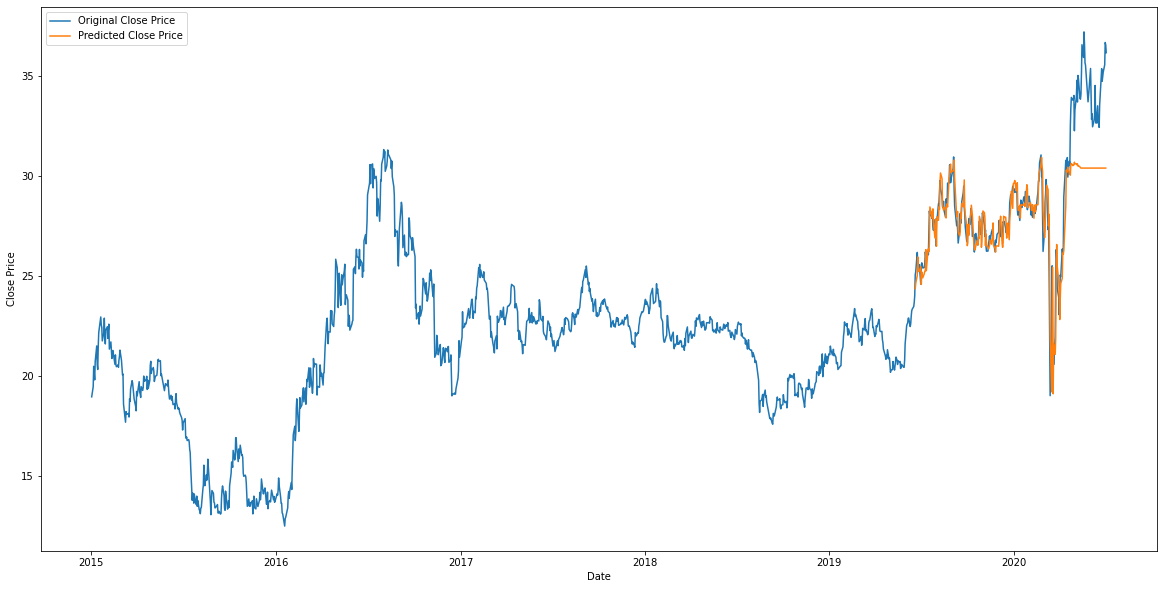

In [ ]:
graph_prediction(GDX_close, GDX_predict_df)

Predicting and graphing the stocks for next 10 days

In [ ]:
GDX_pred_list = predict_10_days(GDX_test, TIMESTEP, GDX_rfmodel)

In [ ]:
GDX_pred_list = transform_data(GDX_scaler, GDX_pred_list)

In [ ]:
from datetime import timedelta

pred_dates = []
for i in range(10):
  pred_dates.append(GDX_close.index[-1] + timedelta(days = i+1))

In [ ]:
GDX_10_days_df = pd.DataFrame(GDX_pred_list, index = pred_dates, columns = ['Predicted Value'])
GDX_last_15_days_df = GDX_close[len(GDX_close) - TIMESTEP:]

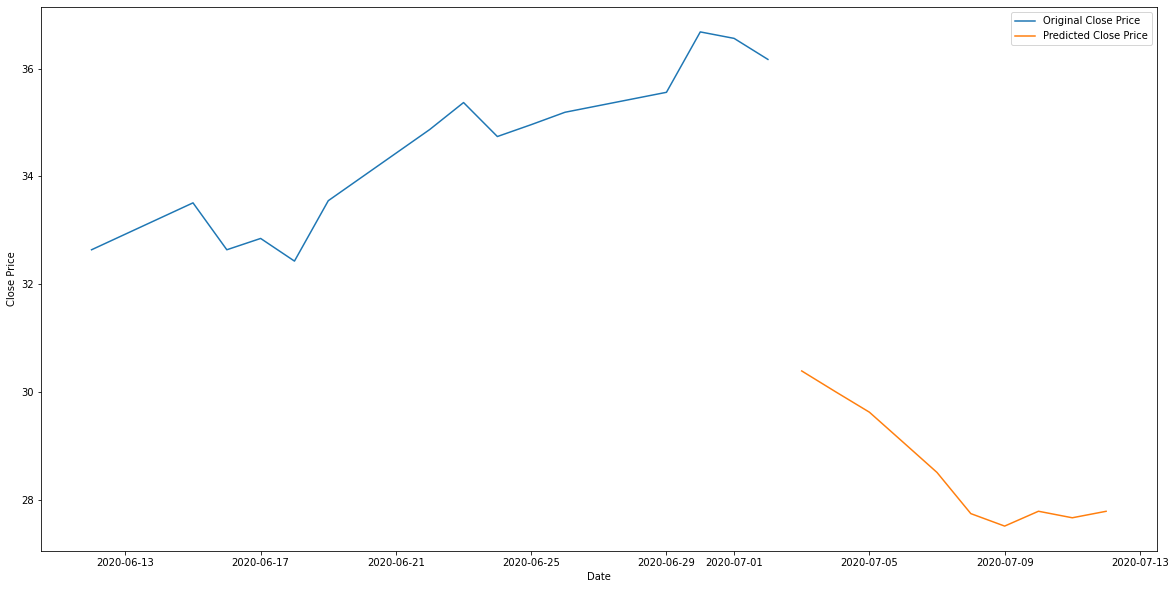

In [ ]:
graph_prediction(GDX_last_15_days_df, GDX_10_days_df)

**Hyperparameter Tuning**

In [ ]:
GDX_best_param = tune_rfmodel(GDX_X_train, GDX_y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: ignored

In [ ]:
print("Best Parameters")
print("-----------------------------------------------------------------------------------------")
print(GDX_best_param)

Best Parameters
-----------------------------------------------------------------------------------------
{'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}


Applying parameters in RF model for GDX stock

In [ ]:
# Creating RF model with best parameters for GDX stock
GDX_tuned_rfmodel = RandomForestRegressor(bootstrap = True, max_depth = 30, min_samples_leaf = 5, min_samples_split = 2, n_estimators = 100, random_state = 42)

GDX_tuned_rfmodel.fit(GDX_X_train, GDX_y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=5, random_state=42)

In [ ]:
# Transform back to original value
GDX_tuned_prediction = GDX_tuned_rfmodel.predict(GDX_X_test)
GDX_ori_y_test = transform_data(GDX_scaler, GDX_y_test)
GDX_tuned_y_pred = transform_data(GDX_scaler, GDX_tuned_prediction)

In [ ]:
# Model Evaluation
print_evaluation('GDX', GDX_tuned_rfmodel, GDX_X_test, GDX_y_test, GDX_ori_y_test, GDX_tuned_y_pred)

Model Evaluation for stock - GDX
------------------------------------------------
Accuracy : 67.06%
RMSE     : 1.8366575927905755
MSE      : 3.373311113155271
MAE      : 1.1940672586314527
R2       : 0.670565318267524


Graphing predicted close price after parameter tuning

In [ ]:
# Create prediction dateframe
GDX_tuned_predict_df = create_pred_df(GDX_close, GDX_tuned_y_pred)

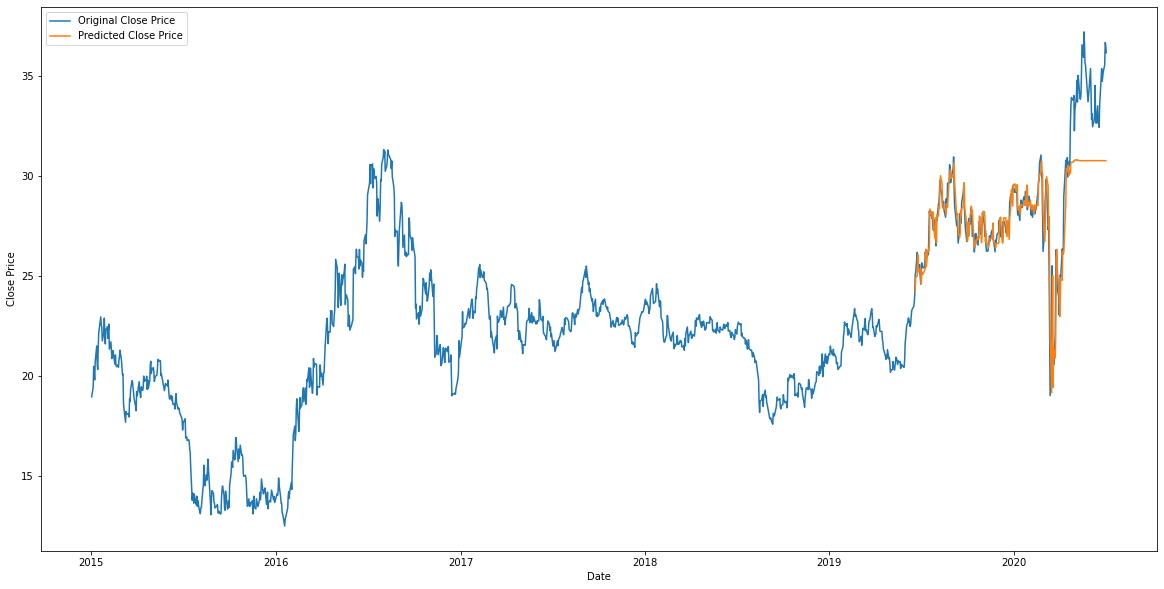

In [ ]:
graph_prediction(GDX_close, GDX_tuned_predict_df)

Predicting and graphing the stocks for next 10 days after parameter tuning

In [ ]:
GDX_tuned_pred_list = predict_10_days(GDX_test, TIMESTEP, GDX_tuned_rfmodel)

In [ ]:
GDX_tuned_pred_list = transform_data(GDX_scaler, GDX_tuned_pred_list)

In [ ]:
GDX_tuned_10_days_df = pd.DataFrame(GDX_tuned_pred_list, index = pred_dates, columns = ['Predicted Value'])

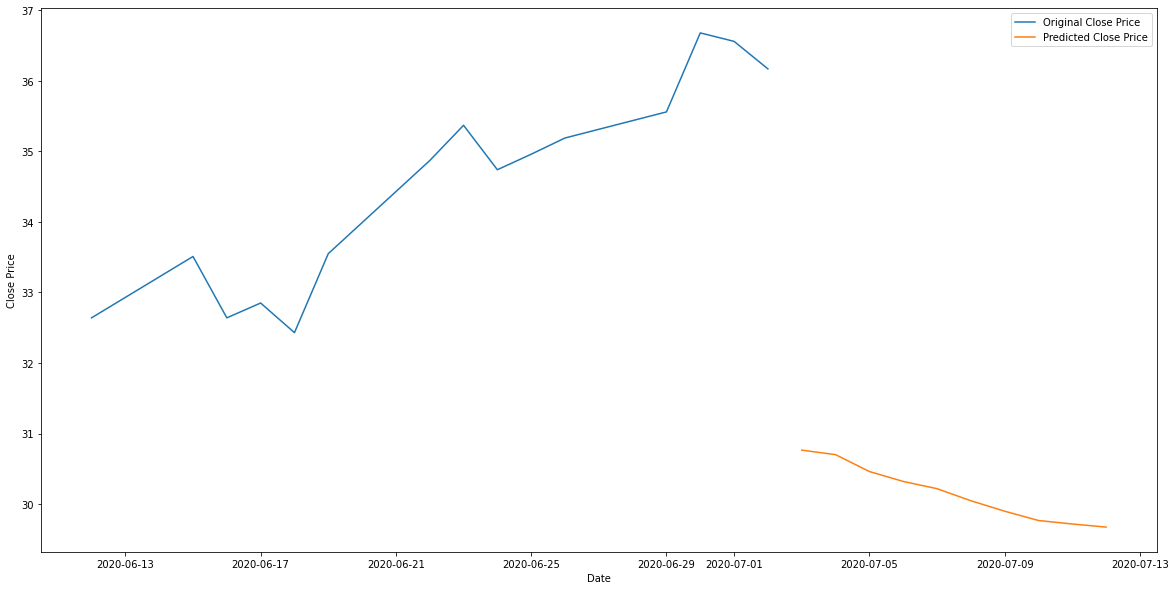

In [ ]:
graph_prediction(GDX_last_15_days_df, GDX_tuned_10_days_df)

2) TWTR - Twitter Inc

**Model Creation**

In [ ]:
# Creating RF model for TWTR stock
TWTR_rfmodel = create_model(TWTR_X_train, TWTR_y_train)

In [ ]:
# Transform back to original value
TWTR_prediction = TWTR_rfmodel.predict(TWTR_X_test)
TWTR_ori_y_test = transform_data(TWTR_scaler, TWTR_y_test)
TWTR_y_pred = transform_data(TWTR_scaler, TWTR_prediction)

**Model Evaluation**

In [ ]:
# Model Evaluation
print_evaluation('TWTR', TWTR_rfmodel, TWTR_X_test, TWTR_y_test, TWTR_ori_y_test, TWTR_y_pred)

Model Evaluation for stock - TWTR
------------------------------------------------
Accuracy : 93.71%
RMSE     : 1.3492637693612277
MSE      : 1.8205127193108686
MAE      : 0.9170494822798105
R2       : 0.9370846641186077


Graphing predicted close price

In [ ]:
# Create prediction dateframe
TWTR_predict_df = create_pred_df(TWTR_close, TWTR_y_pred)

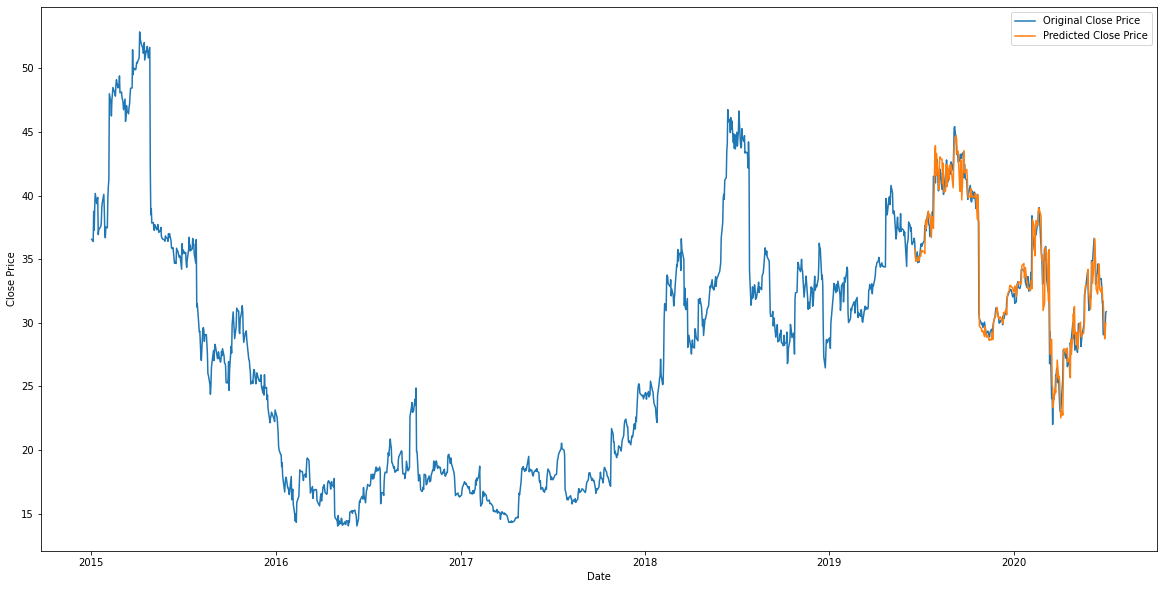

In [ ]:
graph_prediction(TWTR_close, TWTR_predict_df)

Predicting and graphing the stocks for next 10 days

In [ ]:
TWTR_pred_list = predict_10_days(TWTR_test, TIMESTEP, TWTR_rfmodel)

In [ ]:
TWTR_pred_list = transform_data(TWTR_scaler, TWTR_pred_list)

In [ ]:
from datetime import timedelta

pred_dates = []
for i in range(10):
  pred_dates.append(TWTR_close.index[-1] + timedelta(days = i+1))

In [ ]:
TWTR_10_days_df = pd.DataFrame(TWTR_pred_list, index = pred_dates, columns = ['Predicted Value'])
TWTR_last_15_days_df = TWTR_close[len(TWTR_close) - TIMESTEP:]

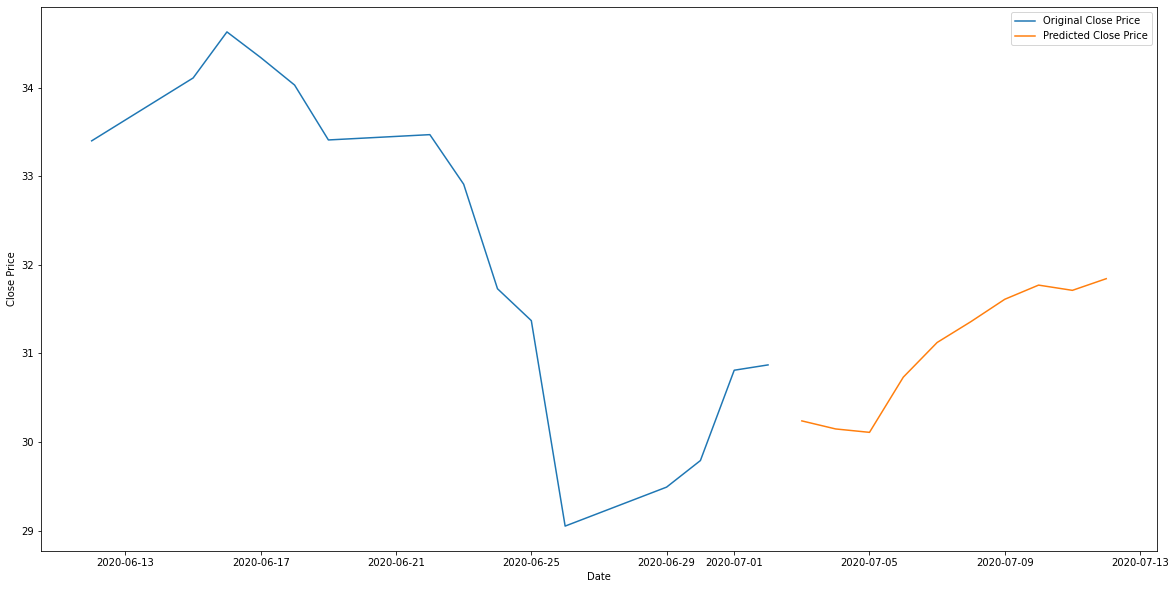

In [ ]:
graph_prediction(TWTR_last_15_days_df, TWTR_10_days_df)

**Hyperparameter Tuning**

In [ ]:
TWTR_best_param = tune_rfmodel(TWTR_X_train, TWTR_y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
print("Best Parameters")
print("-----------------------------------------------------------------------------------------")
print(TWTR_best_param)

Best Parameters
-----------------------------------------------------------------------------------------
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 100, 'random_state': 42}


Applying parameters in RF model for TWTR stock

In [ ]:
# Creating RF model with best parameters for TWTR stock
TWTR_tuned_rfmodel = RandomForestRegressor(bootstrap = True, max_depth = 10, min_samples_leaf = 5, min_samples_split = 11, n_estimators = 100, random_state = 42)

TWTR_tuned_rfmodel.fit(TWTR_X_train, TWTR_y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=11,
                      random_state=42)

In [ ]:
# Transform back to original value
TWTR_tuned_prediction = TWTR_tuned_rfmodel.predict(TWTR_X_test)
TWTR_ori_y_test = transform_data(TWTR_scaler, TWTR_y_test)
TWTR_tuned_y_pred = transform_data(TWTR_scaler, TWTR_tuned_prediction)

In [ ]:
# Model Evaluation
print_evaluation('TWTR', TWTR_tuned_rfmodel, TWTR_X_test, TWTR_y_test, TWTR_ori_y_test, TWTR_tuned_y_pred)

Model Evaluation for stock - TWTR
------------------------------------------------
Accuracy : 94.39%
RMSE     : 1.2736865150584051
MSE      : 1.6222773386416247
MAE      : 0.8594999969822517
R2       : 0.9439355064258793


Graphing predicted close price after parameter tuning

In [ ]:
# Create prediction dateframe
TWTR_tuned_predict_df = create_pred_df(TWTR_close, TWTR_tuned_y_pred)

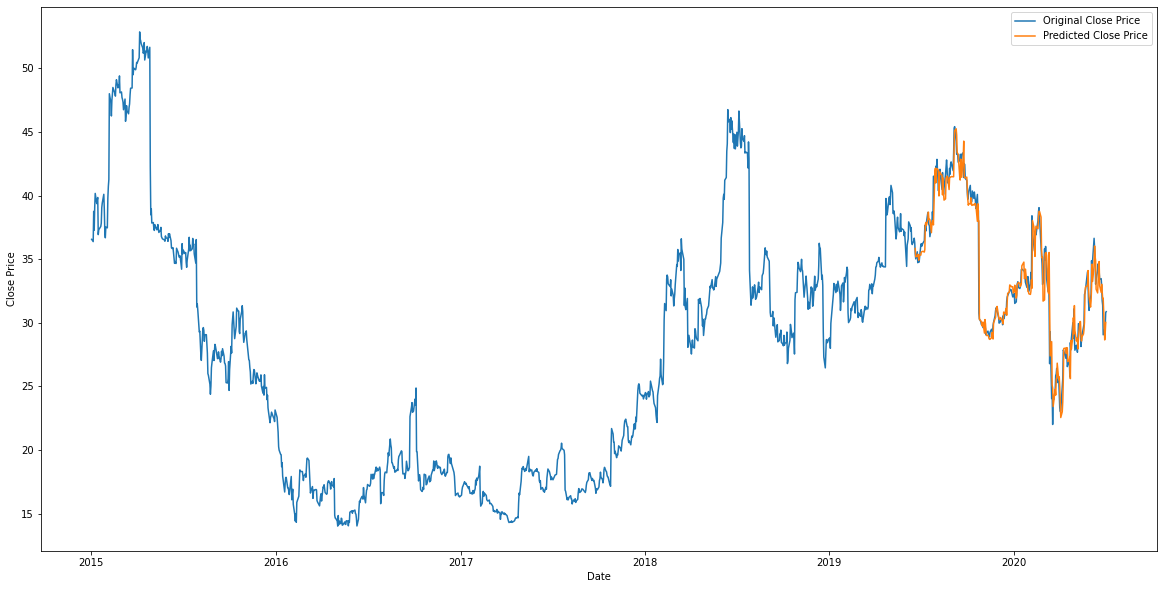

In [ ]:
graph_prediction(TWTR_close, TWTR_tuned_predict_df)

Predicting and graphing the stocks for next 10 days after parameter tuning

In [ ]:
TWTR_tuned_pred_list = predict_10_days(TWTR_test, TIMESTEP, TWTR_tuned_rfmodel)

In [ ]:
TWTR_tuned_pred_list = transform_data(TWTR_scaler, TWTR_tuned_pred_list)

In [ ]:
TWTR_tuned_10_days_df = pd.DataFrame(TWTR_tuned_pred_list, index = pred_dates, columns = ['Predicted Value'])

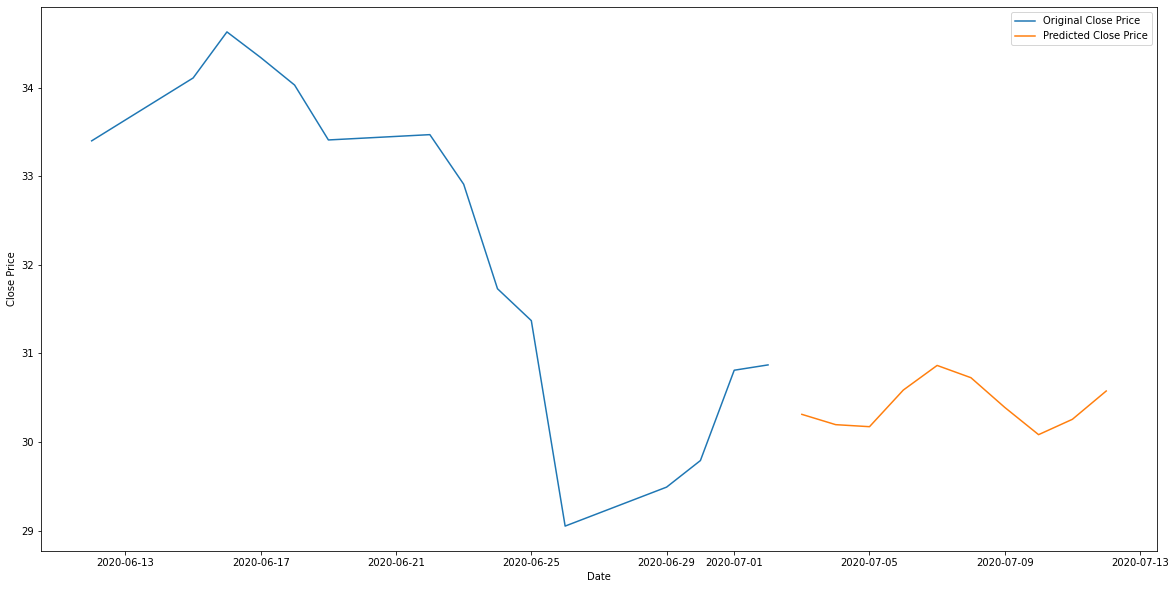

In [ ]:
graph_prediction(TWTR_last_15_days_df, TWTR_tuned_10_days_df)

3) USAK - USA Truck, Inc

**Model Creation**

In [ ]:
# Creating RF model for USAK stock
USAK_rfmodel = create_model(USAK_X_train, USAK_y_train)

In [ ]:
# Transform back to original value
USAK_prediction = USAK_rfmodel.predict(USAK_X_test)
USAK_ori_y_test = transform_data(USAK_scaler, USAK_y_test)
USAK_y_pred = transform_data(USAK_scaler, USAK_prediction)

**Model Evaluation**

In [ ]:
# Model Evaluation
print_evaluation('USAK', USAK_rfmodel, USAK_X_test, USAK_y_test, USAK_ori_y_test, USAK_y_pred)

Model Evaluation for stock - USAK
------------------------------------------------
Accuracy : 63.65%
RMSE     : 1.1187496750352475
MSE      : 1.2516008353914718
MAE      : 0.7232873560185634
R2       : 0.6365438880563156


In [ ]:
# Create prediction dateframe
USAK_predict_df = create_pred_df(USAK_close, USAK_y_pred)

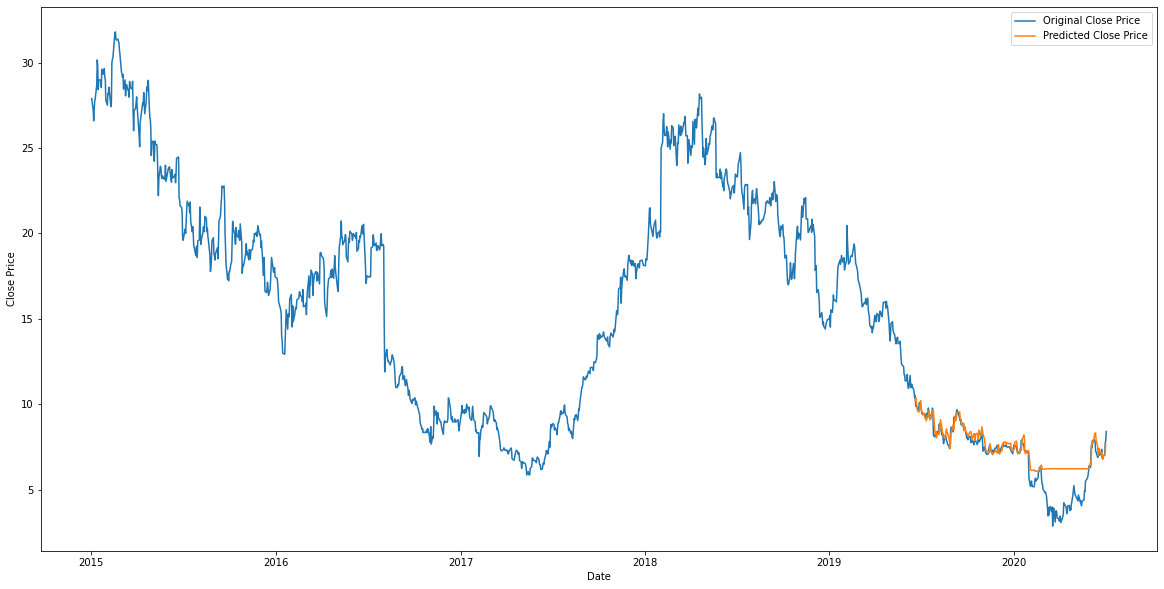

In [ ]:
graph_prediction(USAK_close, USAK_predict_df)

Predicting and graphing the stocks for next 10 days

In [ ]:
USAK_pred_list = predict_10_days(USAK_test, TIMESTEP, USAK_rfmodel)

In [ ]:
USAK_pred_list = transform_data(USAK_scaler, USAK_pred_list)

In [ ]:
from datetime import timedelta

pred_dates = []
for i in range(10):
  pred_dates.append(USAK_close.index[-1] + timedelta(days = i+1))

In [ ]:
USAK_10_days_df = pd.DataFrame(USAK_pred_list, index = pred_dates, columns = ['Predicted Value'])
USAK_last_15_days_df = USAK_close[len(USAK_close) - TIMESTEP:]

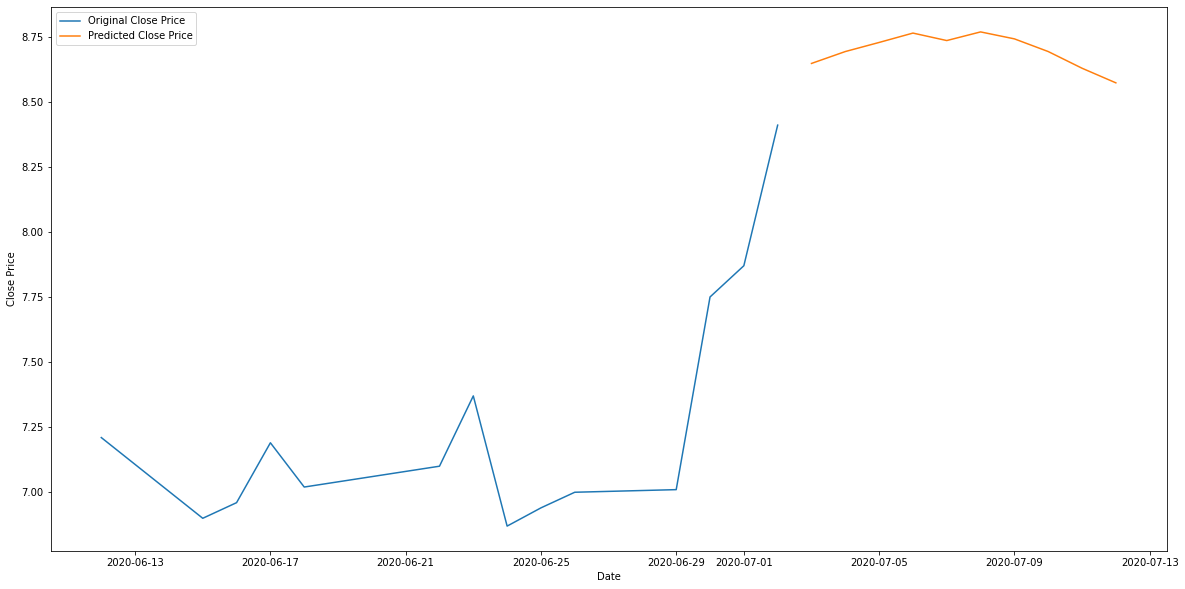

In [ ]:
graph_prediction(USAK_last_15_days_df, USAK_10_days_df)

**Hyperparameter Tuning**

In [ ]:
USAK_best_param = tune_rfmodel(USAK_X_train, USAK_y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
print("Best Parameters")
print("-----------------------------------------------------------------------------------------")
print(USAK_best_param)

Best Parameters
-----------------------------------------------------------------------------------------
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 0}


Applying parameters in RF model for USAK stock

In [ ]:
# Creating RF model with best parameters for USAK stock
USAK_tuned_rfmodel = RandomForestRegressor(bootstrap = True, max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50, random_state = 0)

USAK_tuned_rfmodel.fit(USAK_X_train, USAK_y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, random_state=0)

In [ ]:
# Transform back to original value
USAK_tuned_prediction = USAK_tuned_rfmodel.predict(USAK_X_test)
USAK_ori_y_test = transform_data(USAK_scaler, USAK_y_test)
USAK_tuned_y_pred = transform_data(USAK_scaler, USAK_tuned_prediction)

In [ ]:
# Model Evaluation
print_evaluation('USAK', USAK_tuned_rfmodel, USAK_X_test, USAK_y_test, USAK_ori_y_test, USAK_tuned_y_pred)

Model Evaluation for stock - USAK
------------------------------------------------
Accuracy : 64.71%
RMSE     : 1.1024171428843101
MSE      : 1.2153235569252057
MAE      : 0.7116147314816675
R2       : 0.6470785555081181


Graphing predicted close price after parameter tuning

In [ ]:
# Create prediction dateframe
USAK_tuned_predict_df = create_pred_df(USAK_close, USAK_tuned_y_pred)

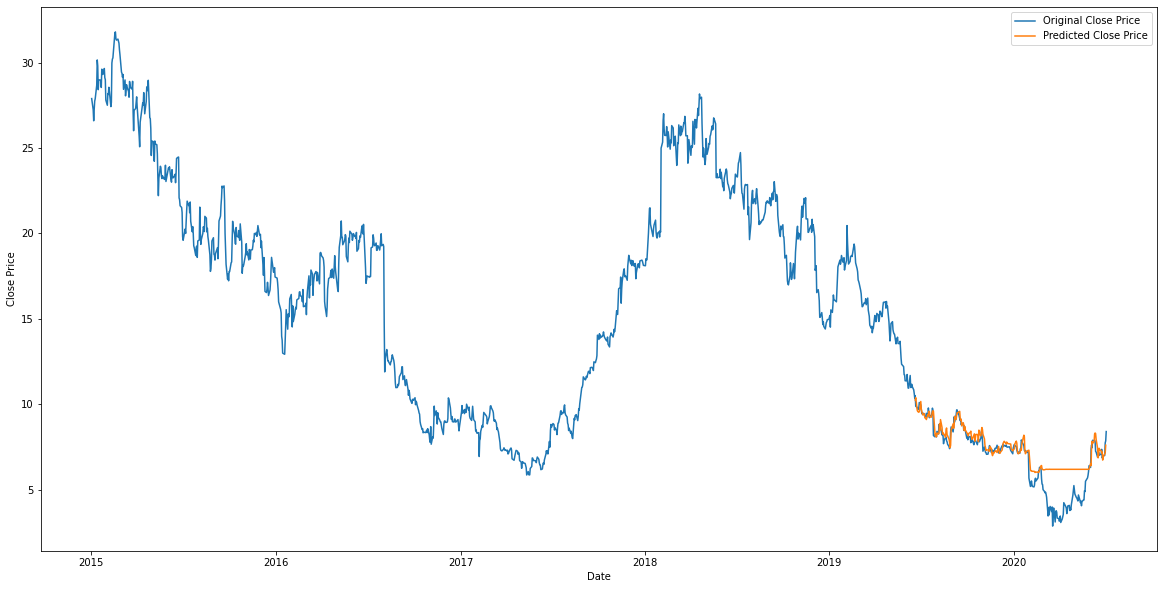

In [ ]:
graph_prediction(USAK_close, USAK_tuned_predict_df)

Predicting and graphing the stocks for next 10 days after parameter tuning

In [ ]:
USAK_tuned_pred_list = predict_10_days(USAK_test, TIMESTEP, USAK_tuned_rfmodel)

In [ ]:
USAK_tuned_pred_list = transform_data(USAK_scaler, USAK_tuned_pred_list)

In [ ]:
USAK_tuned_10_days_df = pd.DataFrame(USAK_tuned_pred_list, index = pred_dates, columns = ['Predicted Value'])

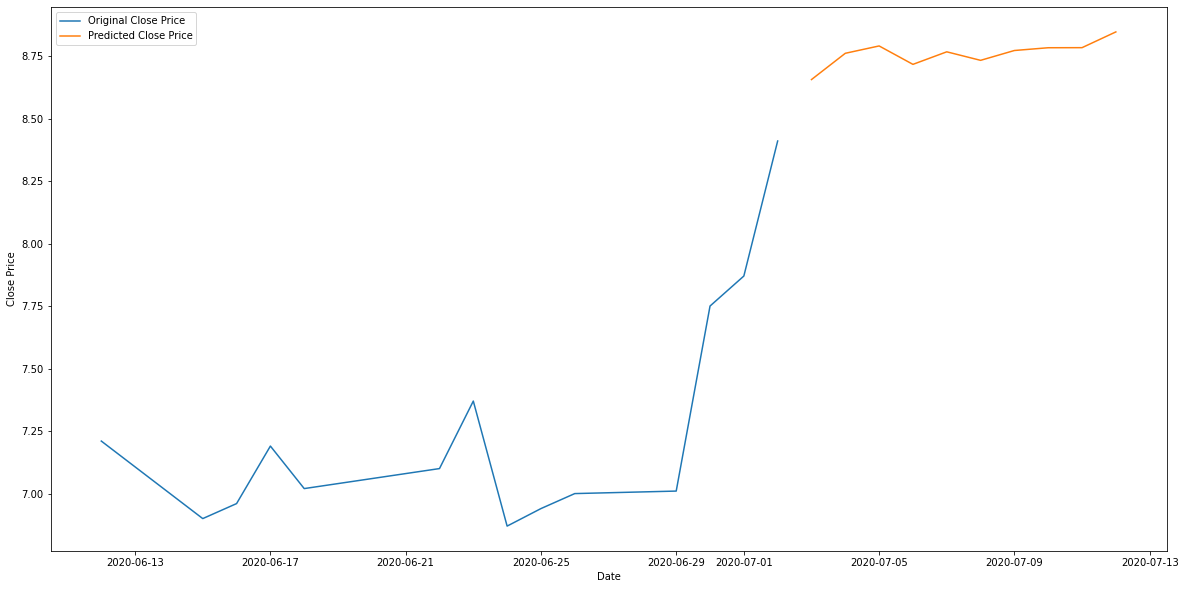

In [ ]:
graph_prediction(USAK_last_15_days_df, USAK_tuned_10_days_df)

4) UVSP - Univest Financial Corp

**Model Creation**

In [ ]:
# Creating RF model for UVSP stock
UVSP_rfmodel = create_model(UVSP_X_train, UVSP_y_train)

In [ ]:
# Transform back to original value
UVSP_prediction = UVSP_rfmodel.predict(UVSP_X_test)
UVSP_ori_y_test = transform_data(UVSP_scaler, UVSP_y_test)
UVSP_y_pred = transform_data(UVSP_scaler, UVSP_prediction)

**Model Evaluation**

In [ ]:
# Model Evaluation
print_evaluation('UVSP', UVSP_rfmodel, UVSP_X_test, UVSP_y_test, UVSP_ori_y_test, UVSP_y_pred)

Model Evaluation for stock - UVSP
------------------------------------------------
Accuracy : 83.93%
RMSE     : 1.837029793360819
MSE      : 3.374678461695294
MAE      : 1.1438398770445584
R2       : 0.8392659996897037


Graphing predicted close price

In [ ]:
# Create prediction dateframe
UVSP_predict_df = create_pred_df(UVSP_close, UVSP_y_pred)

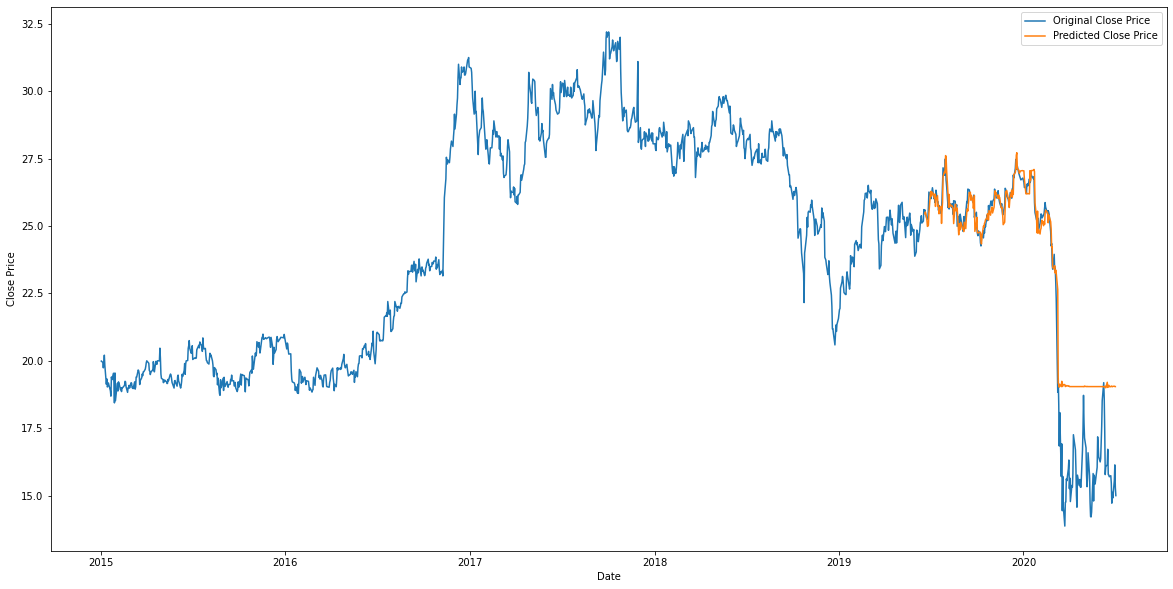

In [ ]:
graph_prediction(UVSP_close, UVSP_predict_df)

Predicting and graphing the stocks for next 10 days

In [ ]:
UVSP_pred_list = predict_10_days(UVSP_test, TIMESTEP, UVSP_rfmodel)

In [ ]:
UVSP_pred_list = transform_data(UVSP_scaler, UVSP_pred_list)

In [ ]:
from datetime import timedelta

pred_dates = []
for i in range(10):
  pred_dates.append(UVSP_close.index[-1] + timedelta(days = i+1))

In [ ]:
UVSP_10_days_df = pd.DataFrame(UVSP_pred_list, index = pred_dates, columns = ['Predicted Value'])
UVSP_last_15_days_df = UVSP_close[len(UVSP_close) - TIMESTEP:]

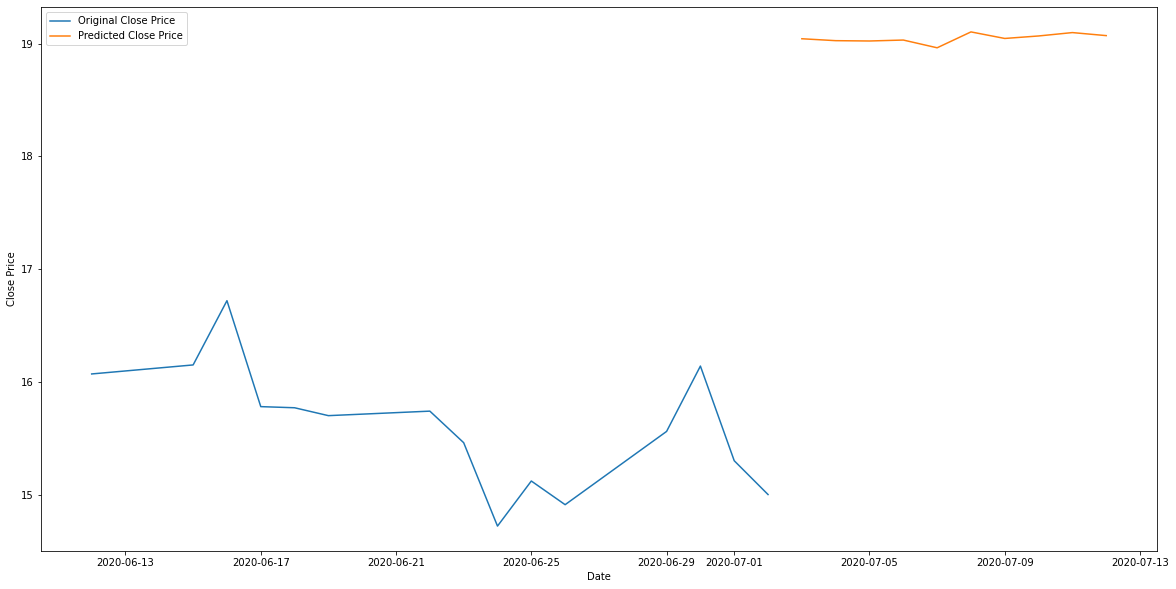

In [ ]:
graph_prediction(UVSP_last_15_days_df, UVSP_10_days_df)

**Hyperparameter Tuning**

In [ ]:
UVSP_best_param = tune_rfmodel(UVSP_X_train, UVSP_y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
print("Best Parameters")
print("-----------------------------------------------------------------------------------------")
print(UVSP_best_param)

Best Parameters
-----------------------------------------------------------------------------------------
{'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42}


Applying parameters in RF model for UVSP stock

In [ ]:
# Creating RF model with best parameters for UVSP stock
UVSP_tuned_rfmodel = RandomForestRegressor(bootstrap = True, max_depth = 30, min_samples_leaf = 3, min_samples_split = 2, n_estimators = 50, random_state = 42)

UVSP_tuned_rfmodel.fit(UVSP_X_train, UVSP_y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=3, n_estimators=50,
                      random_state=42)

In [ ]:
# Transform back to original value
UVSP_tuned_prediction = UVSP_tuned_rfmodel.predict(UVSP_X_test)
UVSP_ori_y_test = transform_data(UVSP_scaler, UVSP_y_test)
UVSP_tuned_y_pred = transform_data(UVSP_scaler, UVSP_tuned_prediction)

In [ ]:
# Model Evaluation
print_evaluation('UVSP', UVSP_tuned_rfmodel, UVSP_X_test, UVSP_y_test, UVSP_ori_y_test, UVSP_tuned_y_pred)

Model Evaluation for stock - UVSP
------------------------------------------------
Accuracy : 83.47%
RMSE     : 1.8630610683433029
MSE      : 3.4709965443764887
MAE      : 1.164804751398161
R2       : 0.834678424634097


Graphing predicted close price after parameter tuning

In [ ]:
# Create prediction dateframe
UVSP_tuned_predict_df = create_pred_df(UVSP_close, UVSP_tuned_y_pred)

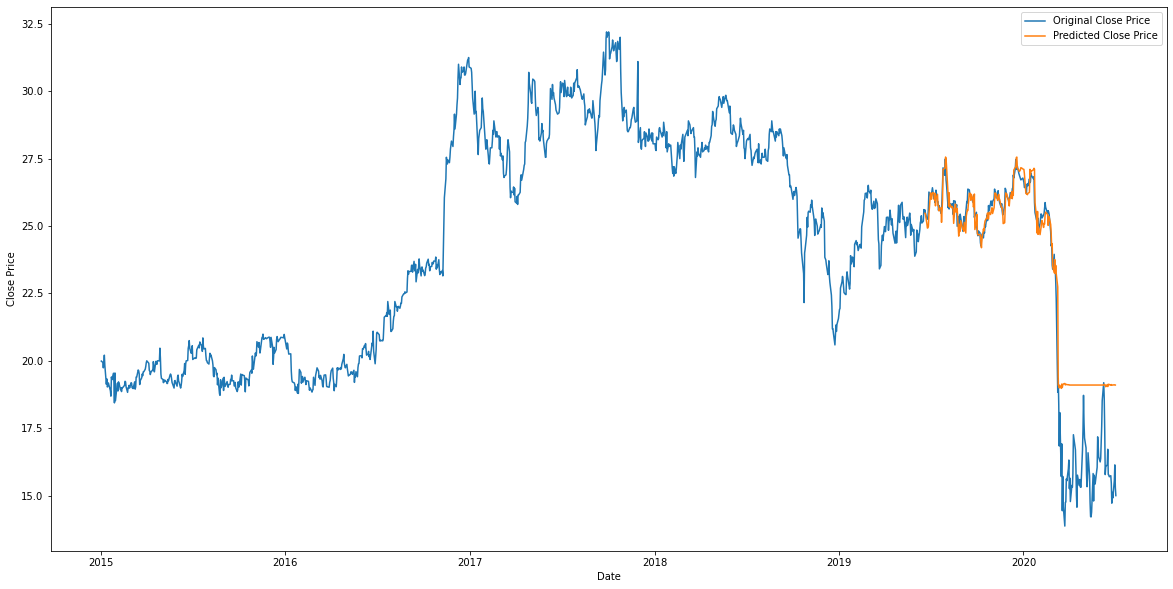

In [ ]:
graph_prediction(UVSP_close, UVSP_tuned_predict_df)

Predicting and graphing the stocks for next 10 days after parameter tuning

In [ ]:
UVSP_tuned_pred_list = predict_10_days(UVSP_test, TIMESTEP, UVSP_tuned_rfmodel)

In [ ]:
UVSP_tuned_pred_list = transform_data(UVSP_scaler, UVSP_tuned_pred_list)

In [ ]:
UVSP_tuned_10_days_df = pd.DataFrame(UVSP_tuned_pred_list, index = pred_dates, columns = ['Predicted Value'])

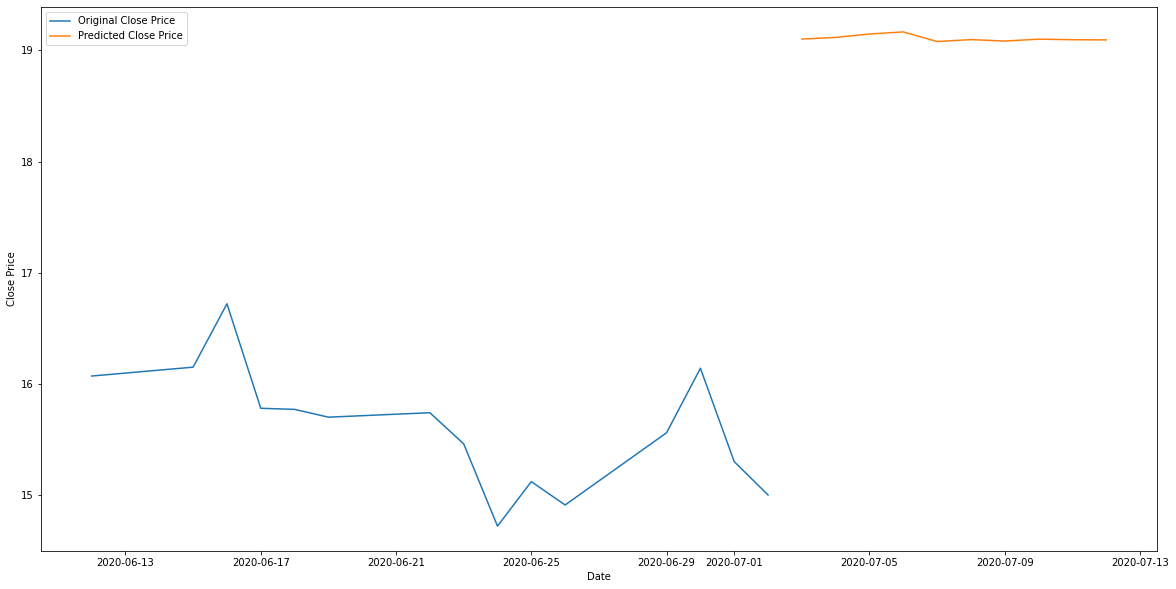

In [ ]:
graph_prediction(UVSP_last_15_days_df, UVSP_tuned_10_days_df)

**2. Long Short Term Memory (LSTM)**

Declaring Functions for model creation and evaluation

In [ ]:
# Import libraries needed for LSTM model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf

In [ ]:
def reshape_data(data):
  data = data.reshape(data.shape[0], data.shape[1], 1)

  return data

In [ ]:
def create_lstm_model(X_train):
  model = Sequential()
  model.add(LSTM(32, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
  model.add(Dropout(0.2))

  model.add(LSTM(32, return_sequences = True))
  model.add(Dropout(0.2))

  model.add(LSTM(32))
  model.add(Dropout(0.2))

  model.add(Dense(1))

  model.compile(loss = 'mean_squared_error', optimizer = 'adam')

  return model

In [ ]:
def lstm_model_evaluation(stock, y_test, y_pred):
  print("Model Evaluation for stock - {}".format(stock))
  print("------------------------------------------------")
  print("RMSE     : {}".format(sqrt(mean_squared_error(y_test, y_pred))))
  print("MSE      : {}".format(mean_squared_error(y_test, y_pred)))
  print("MAE      : {}".format(mean_absolute_error(y_test, y_pred)))
  print("R2       : {}".format(r2_score(y_test, y_pred)))

In [ ]:
def lstm_predict_10_days(test_data, time_step, model):
  X_data = test_data[len(test_data)-time_step:].reshape(1, -1)

  predict_days = 10
  pred_list = []
  for i in range(predict_days):
    pred_data = model.predict(X_data)
    pred_list.extend(pred_data[0])
    X_data = np.append(X_data[0][1:], [pred_data]).reshape(1, -1)

  return pred_list

Applying LSTM model on the stocks

1) GDX - VanEck Gold Miners ETF

**Model Creation**

In [ ]:
GDX_X_train = reshape_data(GDX_X_train)
GDX_X_test = reshape_data(GDX_X_test)

In [ ]:
tf.keras.backend.clear_session()
GDX_lstm_model = create_lstm_model(GDX_X_train)

In [ ]:
GDX_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 dropout_1 (Dropout)         (None, 15, 32)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [ ]:
GDX_lstm_model.fit(GDX_X_train, GDX_y_train, validation_data = (GDX_X_test, GDX_y_test), epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
35/35 [==============================] - 6s 45ms/step - loss: 0.0310 - val_loss: 0.0123
Epoch 2/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0063 - val_loss: 0.0089
Epoch 3/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0044 - val_loss: 0.0071
Epoch 4/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0040 - val_loss: 0.0078
Epoch 5/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0042 - val_loss: 0.0063
Epoch 6/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0039 - val_loss: 0.0068
Epoch 7/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0040 - val_loss: 0.0102
Epoch 8/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0039 - val_loss: 0.0061
Epoch 9/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0038 - val_loss: 0.0057
Epoch 10/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0037 - val_loss: 0.0096
Epoch 11/

In [ ]:
GDX_lstm_predict = GDX_lstm_model.predict(GDX_X_test)
GDX_ori_y_test = transform_data(GDX_scaler, GDX_y_test)
GDX_lstm_y_pred = transform_data(GDX_scaler, GDX_lstm_predict)

**Model Evaluation**

In [ ]:
# Model Evaluation
lstm_model_evaluation('GDX', GDX_ori_y_test, GDX_lstm_y_pred)

Model Evaluation for stock - GDX
------------------------------------------------
RMSE     : 1.4150104271422992
MSE      : 2.002254508921432
MAE      : 1.0390885451744345
R2       : 0.8044615350414656


In [ ]:
# Create prediction dateframe
GDX_lstm_predict_df = create_pred_df(GDX_close, GDX_lstm_y_pred)

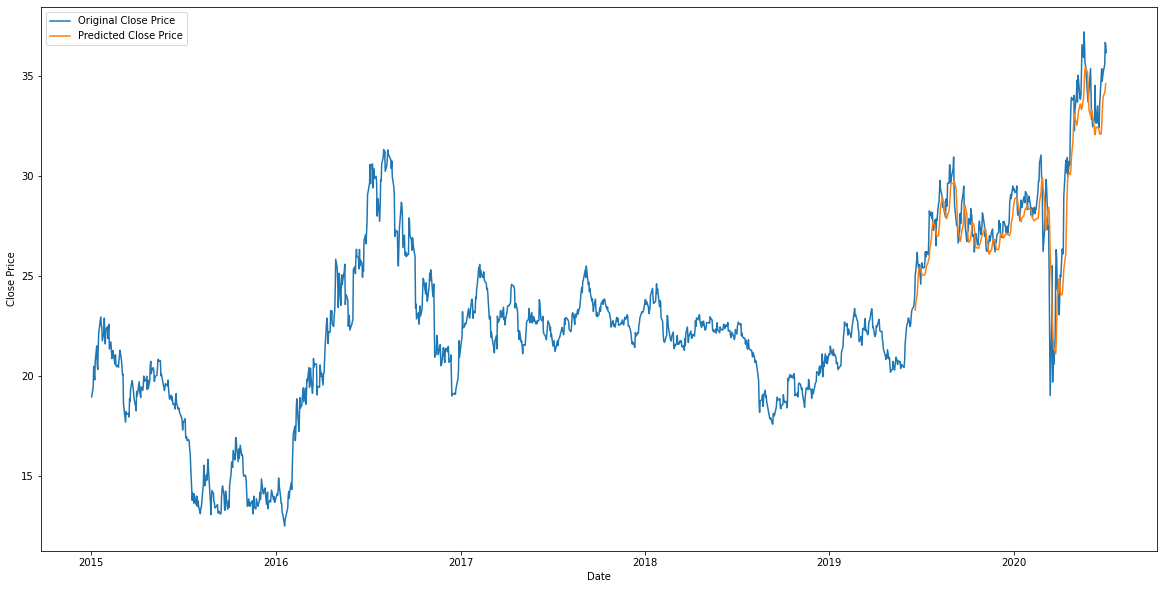

In [ ]:
graph_prediction(GDX_close, GDX_lstm_predict_df)

In [ ]:
GDX_lstm_pred_list = lstm_predict_10_days(GDX_test, TIMESTEP, GDX_lstm_model)

In [ ]:
GDX_lstm_pred_list = transform_data(GDX_scaler, GDX_lstm_pred_list)

In [ ]:
from datetime import timedelta

pred_dates = []
for i in range(10):
  pred_dates.append(GDX_close.index[-1] + timedelta(days = i+1))

In [ ]:
GDX_lstm_10_days_df = pd.DataFrame(GDX_lstm_pred_list, index = pred_dates, columns = ['Predicted Value'])

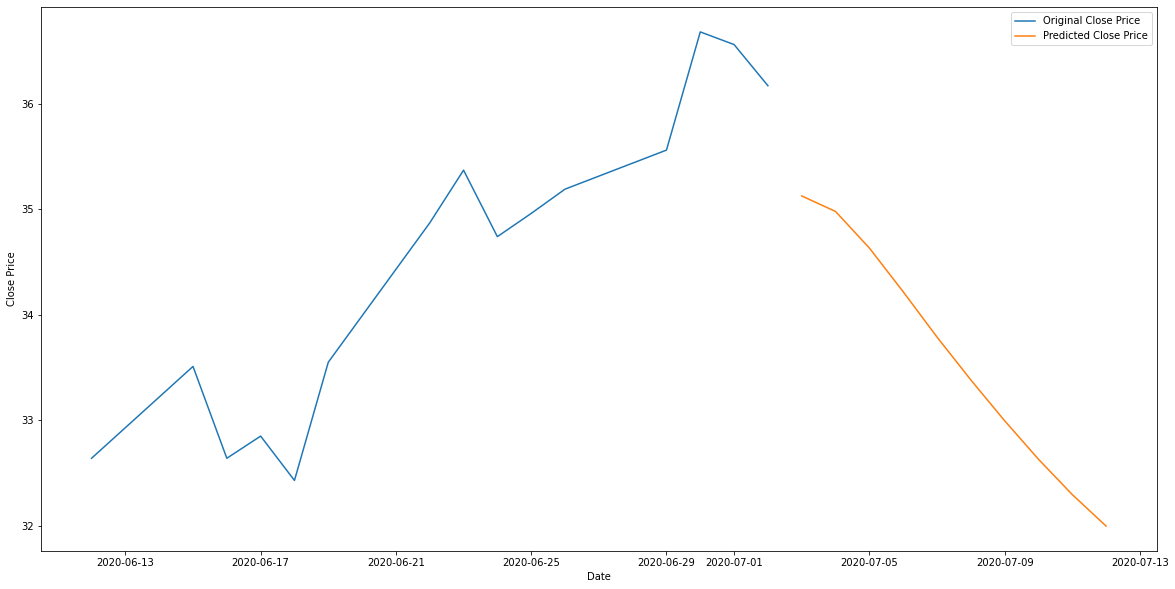

In [ ]:
graph_prediction(GDX_last_15_days_df, GDX_lstm_10_days_df)

**Hyperparameter Tuning**

Declaring function for hyperparameter tuning

In [ ]:
from itertools import product

def LSTM_parameter_tuning(X_train, y_train, X_test, y_test):
  nodes = [32, 64]
  dropout = [0.2]
  batch_size = [32, 64]
  dense = [1]
  epoch = [50, 100]

  combinations = list(product(nodes, dropout, batch_size, dense, epoch))
  results = []
  for i in range(len(combinations)):
    print('Combination ', i+1)
    print('-------------------------------------------------------')

    nodes, dropout, batch_size, dense, epoch = combinations[i]

    tf.keras.backend.clear_session()

    model = Sequential()
    model.add(LSTM(nodes, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout))

    model.add(LSTM(nodes, return_sequences = True))
    model.add(Dropout(dropout))

    model.add(LSTM(nodes))
    model.add(Dropout(dropout))

    model.add(Dense(dense))

    model.compile(loss = 'mean_squared_error', optimizer = 'adam')

    model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = epoch, batch_size = batch_size, verbose = 1)

    test_acc = model.evaluate(X_test, y_test, verbose = 0)

    results.append([nodes, dropout, batch_size, dense, epoch, test_acc])

    print(f'\nCombination {i+1}: {combinations[i]}')
    print(f'test acc: {test_acc}\n\n\n')

  
  return results

In [ ]:
results = LSTM_parameter_tuning(GDX_X_train, GDX_y_train, GDX_X_test, GDX_y_test)

Combination  1
-------------------------------------------------------
Epoch 1/50
35/35 [==============================] - 12s 100ms/step - loss: 0.0215 - val_loss: 0.0106
Epoch 2/50
35/35 [==============================] - 2s 43ms/step - loss: 0.0055 - val_loss: 0.0070
Epoch 3/50
35/35 [==============================] - 1s 37ms/step - loss: 0.0044 - val_loss: 0.0106
Epoch 4/50
35/35 [==============================] - 1s 37ms/step - loss: 0.0043 - val_loss: 0.0071
Epoch 5/50
35/35 [==============================] - 2s 47ms/step - loss: 0.0044 - val_loss: 0.0069
Epoch 6/50
35/35 [==============================] - 2s 48ms/step - loss: 0.0041 - val_loss: 0.0077
Epoch 7/50
35/35 [==============================] - 2s 45ms/step - loss: 0.0037 - val_loss: 0.0062
Epoch 8/50
35/35 [==============================] - 1s 37ms/step - loss: 0.0041 - val_loss: 0.0113
Epoch 9/50
35/35 [==============================] - 1s 29ms/step - loss: 0.0041 - val_loss: 0.0110
Epoch 10/50
35/35 [=================

Applying parameters in LSTM model for GDX stock

In [ ]:
GDX_results_df = pd.DataFrame(results, columns = ['nodes', 'dropout', 'batch_size', 'dense', 'epoch', 'test_acc'])

GDX_results_df.sort_values(by = ['test_acc'], inplace = True)

GDX_results_df

nodes  dropout  batch_size  dense  epoch  test_acc
5     64      0.2          32      1    100  0.001594
4     64      0.2          32      1     50  0.002486
1     32      0.2          32      1    100  0.002684
0     32      0.2          32      1     50  0.002949
3     32      0.2          64      1    100  0.003007
6     64      0.2          64      1     50  0.003041
7     64      0.2          64      1    100  0.003242
2     32      0.2          64      1     50  0.003772

In [ ]:
tf.keras.backend.clear_session()

nodes, dropout, batch_size, dense, epoch = 64, 0.2, 32, 1, 100

GDX_tuned_lstm_model = Sequential()
GDX_tuned_lstm_model.add(LSTM(nodes, return_sequences = True, input_shape = (GDX_X_train.shape[1], GDX_X_train.shape[2])))
GDX_tuned_lstm_model.add(Dropout(dropout))

GDX_tuned_lstm_model.add(LSTM(nodes, return_sequences = True))
GDX_tuned_lstm_model.add(Dropout(dropout))

GDX_tuned_lstm_model.add(LSTM(nodes))
GDX_tuned_lstm_model.add(Dropout(dropout))

GDX_tuned_lstm_model.add(Dense(dense))

GDX_tuned_lstm_model.compile(loss = 'mean_squared_error', optimizer = 'adam')


In [ ]:
GDX_tuned_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 15, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 15, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 15, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 6

In [ ]:
GDX_tuned_lstm_model.fit(GDX_X_train, GDX_y_train, validation_data = (GDX_X_test, GDX_y_test), epochs = epoch, batch_size = batch_size, verbose = 1)

Epoch 1/100
35/35 [==============================] - 7s 74ms/step - loss: 0.0256 - val_loss: 0.0321
Epoch 2/100
35/35 [==============================] - 1s 23ms/step - loss: 0.0039 - val_loss: 0.0071
Epoch 3/100
35/35 [==============================] - 1s 23ms/step - loss: 0.0035 - val_loss: 0.0065
Epoch 4/100
35/35 [==============================] - 1s 25ms/step - loss: 0.0038 - val_loss: 0.0071
Epoch 5/100
35/35 [==============================] - 1s 23ms/step - loss: 0.0031 - val_loss: 0.0072
Epoch 6/100
35/35 [==============================] - 1s 23ms/step - loss: 0.0028 - val_loss: 0.0064
Epoch 7/100
35/35 [==============================] - 1s 23ms/step - loss: 0.0030 - val_loss: 0.0104
Epoch 8/100
35/35 [==============================] - 1s 22ms/step - loss: 0.0029 - val_loss: 0.0071
Epoch 9/100
35/35 [==============================] - 1s 23ms/step - loss: 0.0027 - val_loss: 0.0072
Epoch 10/100
35/35 [==============================] - 1s 22ms/step - loss: 0.0030 - val_loss: 0.0048

In [ ]:
GDX_tuned_lstm_predict = GDX_tuned_lstm_model.predict(GDX_X_test)
GDX_tuned_lstm_y_pred = transform_data(GDX_scaler, GDX_tuned_lstm_predict)

**Model Evaluation**

In [ ]:
# Model Evaluation
lstm_model_evaluation('GDX', GDX_ori_y_test, GDX_tuned_lstm_y_pred)

Model Evaluation for stock - GDX
------------------------------------------------
RMSE     : 0.9576050070999266
MSE      : 0.9170073496228505
MAE      : 0.6523952630287845
R2       : 0.9104458455695842


In [ ]:
# Create prediction dateframe
GDX_tuned_lstm_predict_df = create_pred_df(GDX_close, GDX_tuned_lstm_y_pred)

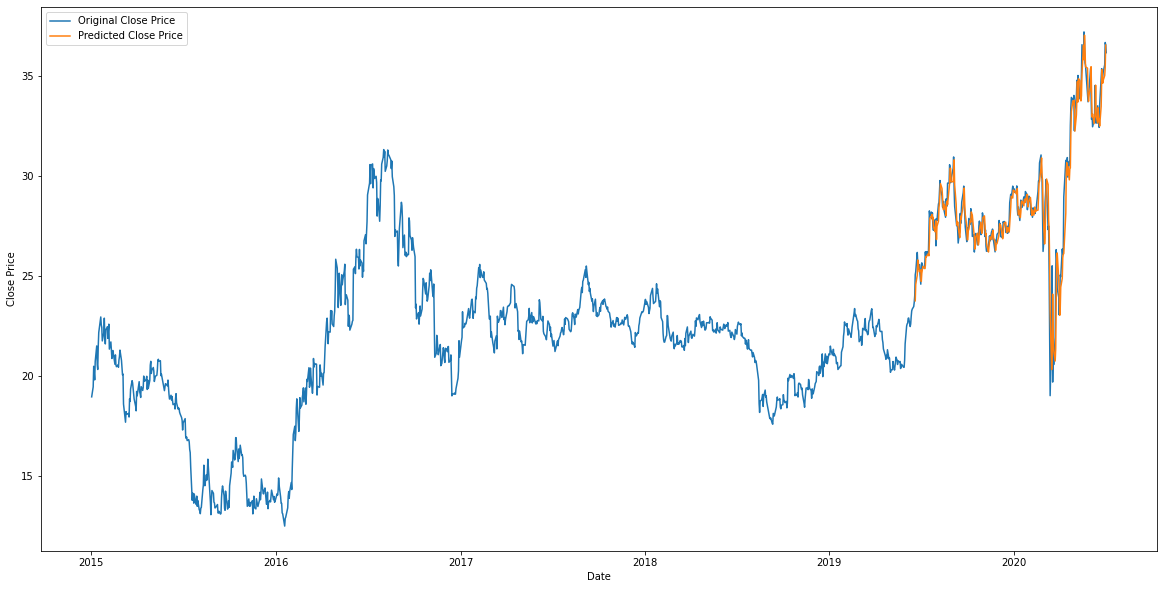

In [ ]:
graph_prediction(GDX_close, GDX_tuned_lstm_predict_df)

In [ ]:
GDX_tuned_lstm_pred_list = lstm_predict_10_days(GDX_test, TIMESTEP, GDX_tuned_lstm_model)

In [ ]:
GDX_tuned_lstm_pred_list = transform_data(GDX_scaler, GDX_tuned_lstm_pred_list)

In [ ]:
GDX_tuned_lstm_10_days_df = pd.DataFrame(GDX_tuned_lstm_pred_list, index = pred_dates, columns = ['Predicted Value'])

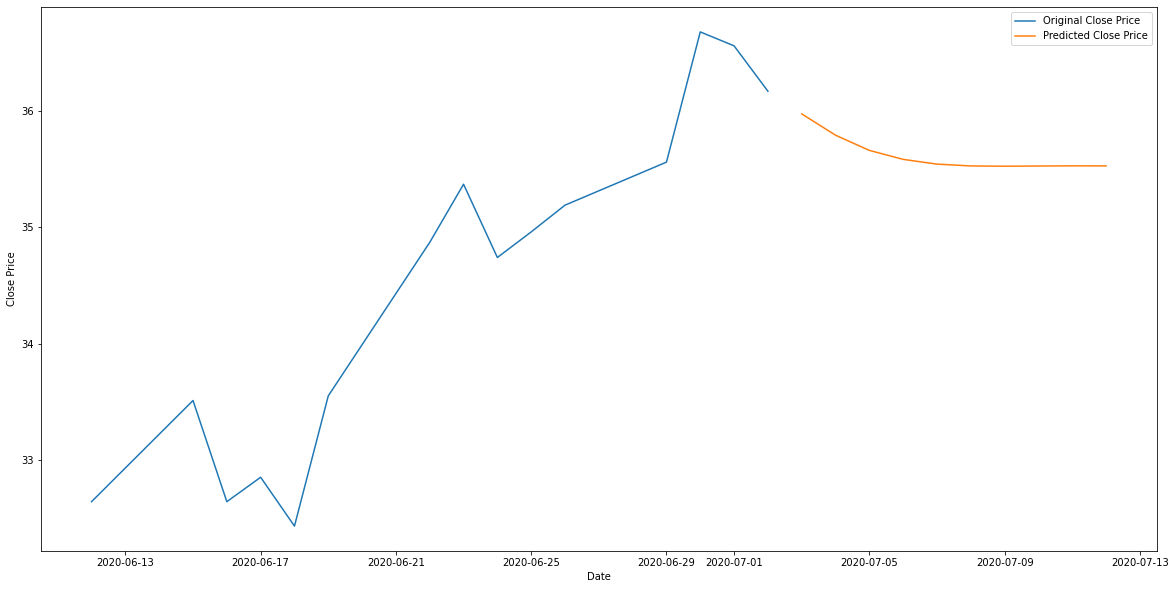

In [ ]:
graph_prediction(GDX_last_15_days_df, GDX_tuned_lstm_10_days_df)

2) TWTR - Twitter Inc

**Model Creation**

In [ ]:
TWTR_X_train = reshape_data(TWTR_X_train)
TWTR_X_test = reshape_data(TWTR_X_test)

In [ ]:
tf.keras.backend.clear_session()
TWTR_lstm_model = create_lstm_model(TWTR_X_train)

In [ ]:
TWTR_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 dropout_1 (Dropout)         (None, 15, 32)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [ ]:
TWTR_lstm_model.fit(TWTR_X_train, TWTR_y_train, validation_data = (TWTR_X_test, TWTR_y_test), epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
35/35 [==============================] - 6s 44ms/step - loss: 0.0399 - val_loss: 0.0068
Epoch 2/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0082 - val_loss: 0.0057
Epoch 3/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0070 - val_loss: 0.0056
Epoch 4/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0070 - val_loss: 0.0056
Epoch 5/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0064 - val_loss: 0.0065
Epoch 6/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0067 - val_loss: 0.0061
Epoch 7/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0064 - val_loss: 0.0057
Epoch 8/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 9/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0061 - val_loss: 0.0049
Epoch 10/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0056 - val_loss: 0.0049
Epoch 11/

In [ ]:
TWTR_lstm_predict = TWTR_lstm_model.predict(TWTR_X_test)
TWTR_ori_y_test = transform_data(TWTR_scaler, TWTR_y_test)
TWTR_lstm_y_pred = transform_data(TWTR_scaler, TWTR_lstm_predict)

**Model Evaluation**

In [ ]:
# Model Evaluation
lstm_model_evaluation('TWTR', TWTR_ori_y_test, TWTR_lstm_y_pred)

Model Evaluation for stock - TWTR
------------------------------------------------
RMSE     : 1.6607761102964482
MSE      : 2.7581772885314004
MAE      : 1.1464906232110388
R2       : 0.9046797922982548


In [ ]:
# Create prediction dateframe
TWTR_lstm_predict_df = create_pred_df(TWTR_close, TWTR_lstm_y_pred)

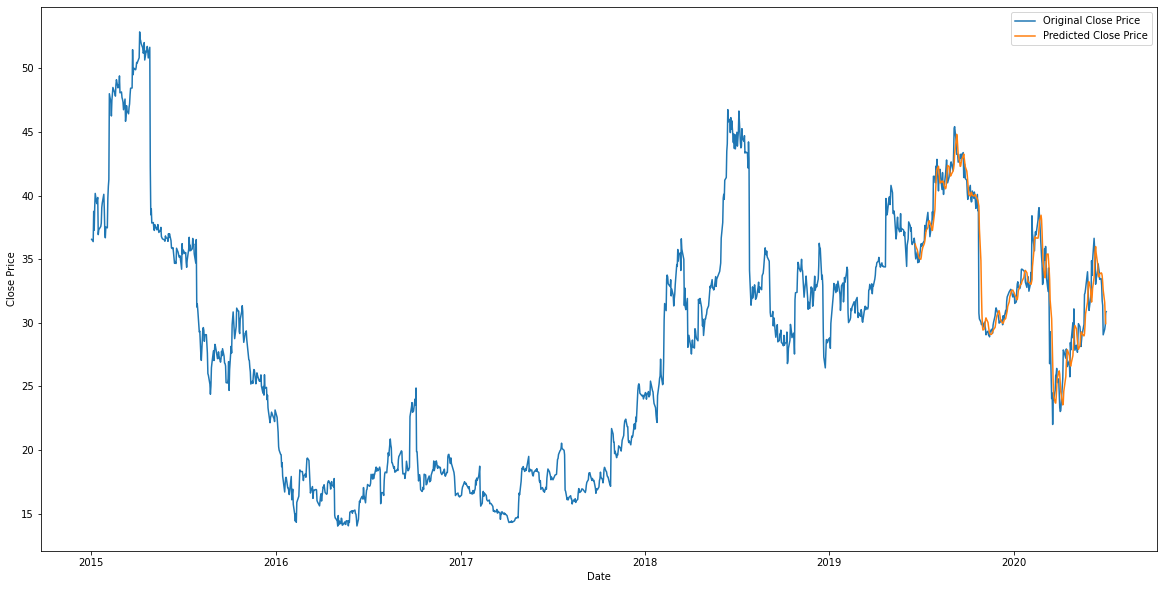

In [ ]:
graph_prediction(TWTR_close, TWTR_lstm_predict_df)

In [ ]:
TWTR_lstm_pred_list = lstm_predict_10_days(TWTR_test, TIMESTEP, TWTR_lstm_model)

In [ ]:
TWTR_lstm_pred_list = transform_data(TWTR_scaler, TWTR_lstm_pred_list)

In [ ]:
TWTR_lstm_10_days_df = pd.DataFrame(TWTR_lstm_pred_list, index = pred_dates, columns = ['Predicted Value'])

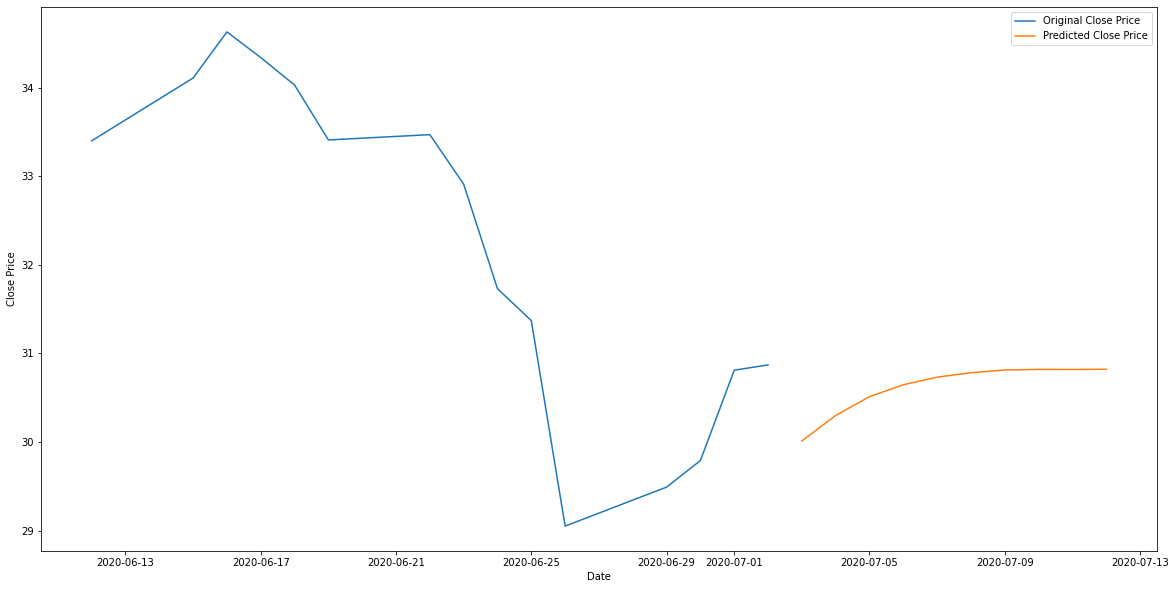

In [ ]:
graph_prediction(TWTR_last_15_days_df, TWTR_lstm_10_days_df)

**Hyperparameter Tuning**

In [ ]:
results = LSTM_parameter_tuning(TWTR_X_train, TWTR_y_train, TWTR_X_test, TWTR_y_test)

Combination  1
-------------------------------------------------------
Epoch 1/50
35/35 [==============================] - 10s 80ms/step - loss: 0.0325 - val_loss: 0.0097
Epoch 2/50
35/35 [==============================] - 1s 31ms/step - loss: 0.0089 - val_loss: 0.0055
Epoch 3/50
35/35 [==============================] - 1s 30ms/step - loss: 0.0067 - val_loss: 0.0057
Epoch 4/50
35/35 [==============================] - 1s 31ms/step - loss: 0.0065 - val_loss: 0.0058
Epoch 5/50
35/35 [==============================] - 1s 36ms/step - loss: 0.0070 - val_loss: 0.0052
Epoch 6/50
35/35 [==============================] - 1s 35ms/step - loss: 0.0065 - val_loss: 0.0071
Epoch 7/50
35/35 [==============================] - 1s 35ms/step - loss: 0.0063 - val_loss: 0.0048
Epoch 8/50
35/35 [==============================] - 1s 35ms/step - loss: 0.0057 - val_loss: 0.0046
Epoch 9/50
35/35 [==============================] - 1s 33ms/step - loss: 0.0056 - val_loss: 0.0072
Epoch 10/50
35/35 [==================

Applying parameters in LSTM model for TWTR stock

In [ ]:
TWTR_results_df = pd.DataFrame(results, columns = ['nodes', 'dropout', 'batch_size', 'dense', 'epoch', 'test_acc'])

TWTR_results_df.sort_values(by = ['test_acc'], inplace = True)

TWTR_results_df

nodes  dropout  batch_size  dense  epoch  test_acc
5     64      0.2          32      1    100  0.000936
4     64      0.2          32      1     50  0.001354
3     32      0.2          64      1    100  0.001773
6     64      0.2          64      1     50  0.002004
1     32      0.2          32      1    100  0.002021
0     32      0.2          32      1     50  0.002436
7     64      0.2          64      1    100  0.002485
2     32      0.2          64      1     50  0.002913

In [ ]:
tf.keras.backend.clear_session()

nodes, dropout, batch_size, dense, epoch = 64, 0.2, 32, 1, 100

TWTR_tuned_lstm_model = Sequential()
TWTR_tuned_lstm_model.add(LSTM(nodes, return_sequences = True, input_shape = (TWTR_X_train.shape[1], TWTR_X_train.shape[2])))
TWTR_tuned_lstm_model.add(Dropout(dropout))

TWTR_tuned_lstm_model.add(LSTM(nodes, return_sequences = True))
TWTR_tuned_lstm_model.add(Dropout(dropout))

TWTR_tuned_lstm_model.add(LSTM(nodes))
TWTR_tuned_lstm_model.add(Dropout(dropout))

TWTR_tuned_lstm_model.add(Dense(dense))

TWTR_tuned_lstm_model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
TWTR_tuned_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 15, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 15, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 15, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 6

In [ ]:
TWTR_tuned_lstm_model.fit(TWTR_X_train, TWTR_y_train, validation_data = (TWTR_X_test, TWTR_y_test), epochs = epoch, batch_size = batch_size, verbose = 1)

Epoch 1/100
35/35 [==============================] - 6s 52ms/step - loss: 0.0324 - val_loss: 0.0138
Epoch 2/100
35/35 [==============================] - 1s 22ms/step - loss: 0.0078 - val_loss: 0.0059
Epoch 3/100
35/35 [==============================] - 1s 24ms/step - loss: 0.0060 - val_loss: 0.0073
Epoch 4/100
35/35 [==============================] - 1s 24ms/step - loss: 0.0056 - val_loss: 0.0049
Epoch 5/100
35/35 [==============================] - 1s 24ms/step - loss: 0.0051 - val_loss: 0.0052
Epoch 6/100
35/35 [==============================] - 1s 23ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 7/100
35/35 [==============================] - 1s 23ms/step - loss: 0.0052 - val_loss: 0.0045
Epoch 8/100
35/35 [==============================] - 1s 22ms/step - loss: 0.0048 - val_loss: 0.0065
Epoch 9/100
35/35 [==============================] - 1s 26ms/step - loss: 0.0058 - val_loss: 0.0036
Epoch 10/100
35/35 [==============================] - 1s 23ms/step - loss: 0.0043 - val_loss: 0.0048

In [ ]:
TWTR_tuned_lstm_predict = TWTR_tuned_lstm_model.predict(TWTR_X_test)
TWTR_tuned_lstm_y_pred = transform_data(TWTR_scaler, TWTR_tuned_lstm_predict)

**Model Evaluation**

In [ ]:
# Model Evaluation
lstm_model_evaluation('TWTR', TWTR_ori_y_test, TWTR_tuned_lstm_y_pred)

Model Evaluation for stock - TWTR
------------------------------------------------
RMSE     : 1.2167798169517297
MSE      : 1.4805531229410849
MAE      : 0.8287760270509681
R2       : 0.9488333720319497


In [ ]:
# Create prediction dateframe
TWTR_tuned_lstm_predict_df = create_pred_df(TWTR_close, TWTR_tuned_lstm_y_pred)

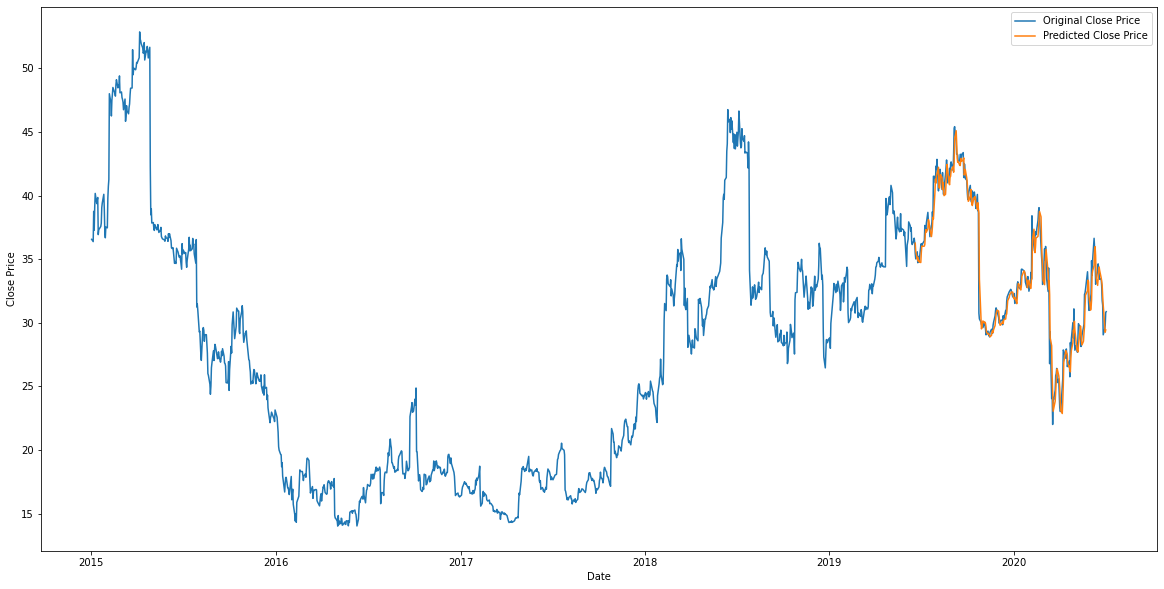

In [ ]:
graph_prediction(TWTR_close, TWTR_tuned_lstm_predict_df)

In [ ]:
TWTR_tuned_lstm_pred_list = lstm_predict_10_days(TWTR_test, TIMESTEP, TWTR_tuned_lstm_model)

In [ ]:
TWTR_tuned_lstm_pred_list = transform_data(TWTR_scaler, TWTR_tuned_lstm_pred_list)

In [ ]:
TWTR_tuned_lstm_10_days_df = pd.DataFrame(TWTR_tuned_lstm_pred_list, index = pred_dates, columns = ['Predicted Value'])

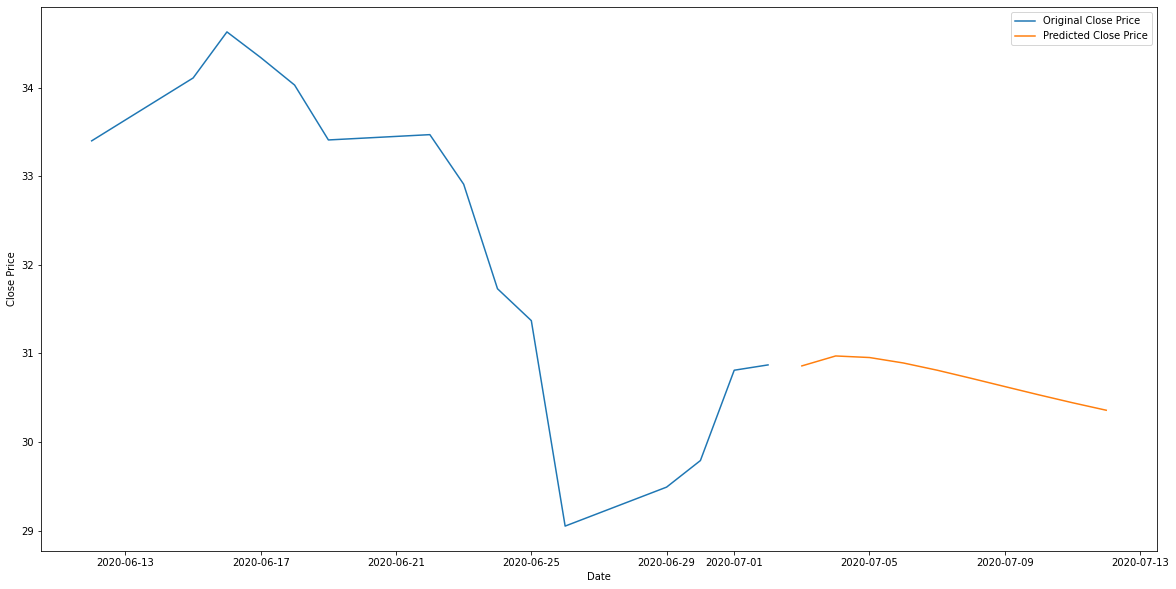

In [ ]:
graph_prediction(TWTR_last_15_days_df, TWTR_tuned_lstm_10_days_df)

3) USAK - USA Truck, Inc

**Model Creation**

In [ ]:
USAK_X_train = reshape_data(USAK_X_train)
USAK_X_test = reshape_data(USAK_X_test)

In [ ]:
tf.keras.backend.clear_session()
USAK_lstm_model = create_lstm_model(USAK_X_train)

In [ ]:
USAK_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 dropout_1 (Dropout)         (None, 15, 32)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [ ]:
USAK_lstm_model.fit(USAK_X_train, USAK_y_train, validation_data = (USAK_X_test, USAK_y_test), epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
35/35 [==============================] - 6s 47ms/step - loss: 0.0666 - val_loss: 0.0199
Epoch 2/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0098 - val_loss: 0.0029
Epoch 3/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0076 - val_loss: 0.0011
Epoch 4/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0081 - val_loss: 0.0015
Epoch 5/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0072 - val_loss: 0.0014
Epoch 6/50
35/35 [==============================] - 1s 18ms/step - loss: 0.0064 - val_loss: 0.0014
Epoch 7/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0063 - val_loss: 0.0014
Epoch 8/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0063 - val_loss: 0.0012
Epoch 9/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0064 - val_loss: 7.6813e-04
Epoch 10/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0061 - val_loss: 7.0120e-04
E

In [ ]:
USAK_lstm_predict = USAK_lstm_model.predict(USAK_X_test)
USAK_ori_y_test = transform_data(USAK_scaler, USAK_y_test)
USAK_lstm_y_pred = transform_data(USAK_scaler, USAK_lstm_predict)

**Model Evaluation**

In [ ]:
# Model Evaluation
lstm_model_evaluation('USAK', USAK_ori_y_test, USAK_lstm_y_pred)

Model Evaluation for stock - USAK
------------------------------------------------
RMSE     : 0.8686110203164502
MSE      : 0.7544851046151847
MAE      : 0.7429244098078702
R2       : 0.78090281271098


In [ ]:
# Create prediction dateframe
USAK_lstm_predict_df = create_pred_df(USAK_close, USAK_lstm_y_pred)

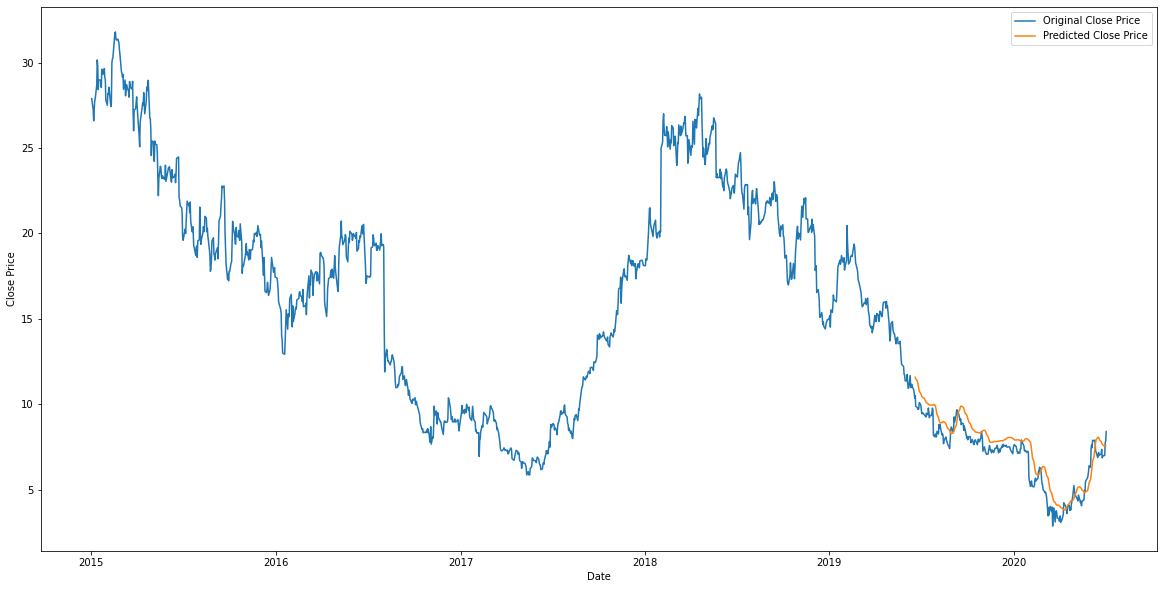

In [ ]:
graph_prediction(USAK_close, USAK_lstm_predict_df)

In [ ]:
USAK_lstm_pred_list = lstm_predict_10_days(USAK_test, TIMESTEP, USAK_lstm_model)

In [ ]:
USAK_lstm_pred_list = transform_data(USAK_scaler, USAK_lstm_pred_list)

In [ ]:
USAK_lstm_10_days_df = pd.DataFrame(USAK_lstm_pred_list, index = pred_dates, columns = ['Predicted Value'])

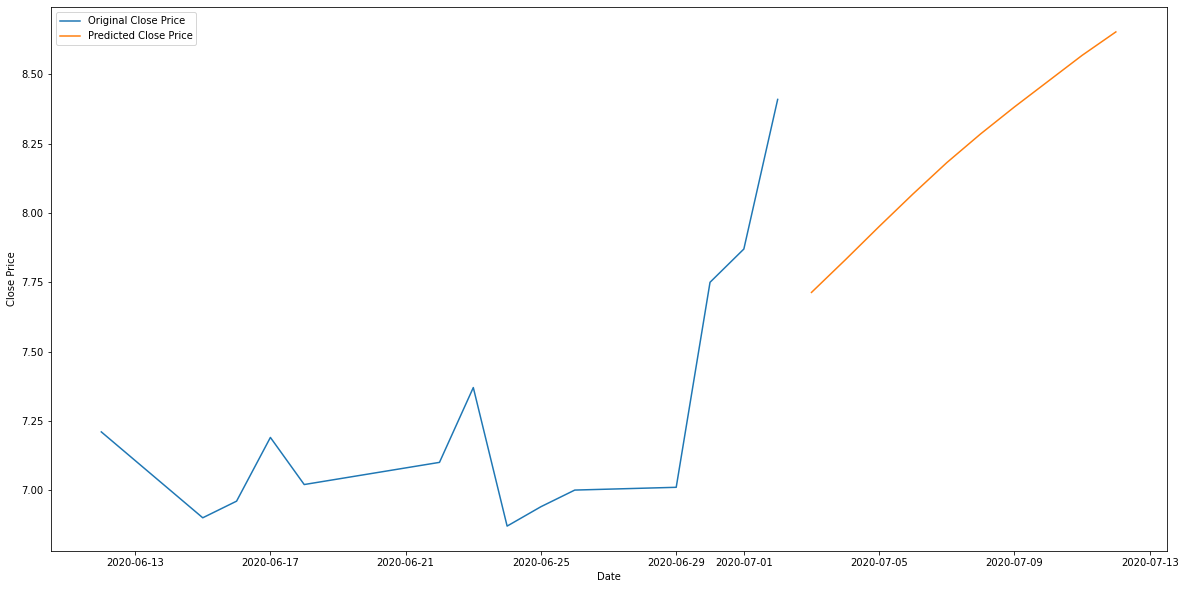

In [ ]:
graph_prediction(USAK_last_15_days_df, USAK_lstm_10_days_df)

**Hyperparameter Tuning**

In [ ]:
results = LSTM_parameter_tuning(USAK_X_train, USAK_y_train, USAK_X_test, USAK_y_test)

Combination  1
-------------------------------------------------------
Epoch 1/50
35/35 [==============================] - 12s 78ms/step - loss: 0.0644 - val_loss: 0.0184
Epoch 2/50
35/35 [==============================] - 1s 32ms/step - loss: 0.0095 - val_loss: 0.0026
Epoch 3/50
35/35 [==============================] - 1s 32ms/step - loss: 0.0077 - val_loss: 0.0012
Epoch 4/50
35/35 [==============================] - 1s 31ms/step - loss: 0.0071 - val_loss: 0.0023
Epoch 5/50
35/35 [==============================] - 1s 30ms/step - loss: 0.0078 - val_loss: 0.0011
Epoch 6/50
35/35 [==============================] - 1s 28ms/step - loss: 0.0064 - val_loss: 7.5120e-04
Epoch 7/50
35/35 [==============================] - 1s 32ms/step - loss: 0.0063 - val_loss: 9.2559e-04
Epoch 8/50
35/35 [==============================] - 1s 30ms/step - loss: 0.0065 - val_loss: 0.0013
Epoch 9/50
35/35 [==============================] - 1s 34ms/step - loss: 0.0055 - val_loss: 9.1020e-04
Epoch 10/50
35/35 [======

Applying parameters in LSTM model for USAK stock

In [ ]:
USAK_results_df = pd.DataFrame(results, columns = ['nodes', 'dropout', 'batch_size', 'dense', 'epoch', 'test_acc'])

USAK_results_df.sort_values(by = ['test_acc'], inplace = True)

USAK_results_df

nodes  dropout  batch_size  dense  epoch  test_acc
5     64      0.2          32      1    100  0.000174
4     64      0.2          32      1     50  0.000285
1     32      0.2          32      1    100  0.000289
7     64      0.2          64      1    100  0.000341
3     32      0.2          64      1    100  0.000457
2     32      0.2          64      1     50  0.000551
6     64      0.2          64      1     50  0.000598
0     32      0.2          32      1     50  0.000781

In [ ]:
tf.keras.backend.clear_session()

nodes, dropout, batch_size, dense, epoch = 64, 0.2, 32, 1, 100

USAK_tuned_lstm_model = Sequential()
USAK_tuned_lstm_model.add(LSTM(nodes, return_sequences = True, input_shape = (USAK_X_train.shape[1], USAK_X_train.shape[2])))
USAK_tuned_lstm_model.add(Dropout(dropout))

USAK_tuned_lstm_model.add(LSTM(nodes, return_sequences = True))
USAK_tuned_lstm_model.add(Dropout(dropout))

USAK_tuned_lstm_model.add(LSTM(nodes))
USAK_tuned_lstm_model.add(Dropout(dropout))

USAK_tuned_lstm_model.add(Dense(dense))

USAK_tuned_lstm_model.compile(loss = 'mean_squared_error', optimizer = 'adam')


In [ ]:
USAK_tuned_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 15, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 15, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 15, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 6

In [ ]:
USAK_tuned_lstm_model.fit(USAK_X_train, USAK_y_train, validation_data = (USAK_X_test, USAK_y_test), epochs = epoch, batch_size = batch_size, verbose = 1)

Epoch 1/100
35/35 [==============================] - 7s 56ms/step - loss: 0.0356 - val_loss: 0.0047
Epoch 2/100
35/35 [==============================] - 1s 25ms/step - loss: 0.0058 - val_loss: 8.7588e-04
Epoch 3/100
35/35 [==============================] - 1s 23ms/step - loss: 0.0050 - val_loss: 9.4468e-04
Epoch 4/100
35/35 [==============================] - 1s 24ms/step - loss: 0.0049 - val_loss: 7.4170e-04
Epoch 5/100
35/35 [==============================] - 1s 24ms/step - loss: 0.0047 - val_loss: 8.2580e-04
Epoch 6/100
35/35 [==============================] - 1s 23ms/step - loss: 0.0052 - val_loss: 6.3412e-04
Epoch 7/100
35/35 [==============================] - 1s 23ms/step - loss: 0.0056 - val_loss: 8.0554e-04
Epoch 8/100
35/35 [==============================] - 1s 24ms/step - loss: 0.0043 - val_loss: 6.4259e-04
Epoch 9/100
35/35 [==============================] - 1s 23ms/step - loss: 0.0047 - val_loss: 8.2166e-04
Epoch 10/100
35/35 [==============================] - 1s 25ms/step -

In [ ]:
USAK_tuned_lstm_predict = USAK_tuned_lstm_model.predict(USAK_X_test)
USAK_tuned_lstm_y_pred = transform_data(USAK_scaler, USAK_tuned_lstm_predict)

**Model Evaluation**

In [ ]:
# Model Evaluation
lstm_model_evaluation('USAK', USAK_ori_y_test, USAK_tuned_lstm_y_pred)

Model Evaluation for stock - USAK
------------------------------------------------
RMSE     : 0.431482962834972
MSE      : 0.18617754721684585
MAE      : 0.3266258449846757
R2       : 0.9459353449364855


In [ ]:
# Create prediction dateframe
USAK_tuned_lstm_predict_df = create_pred_df(USAK_close, USAK_tuned_lstm_y_pred)

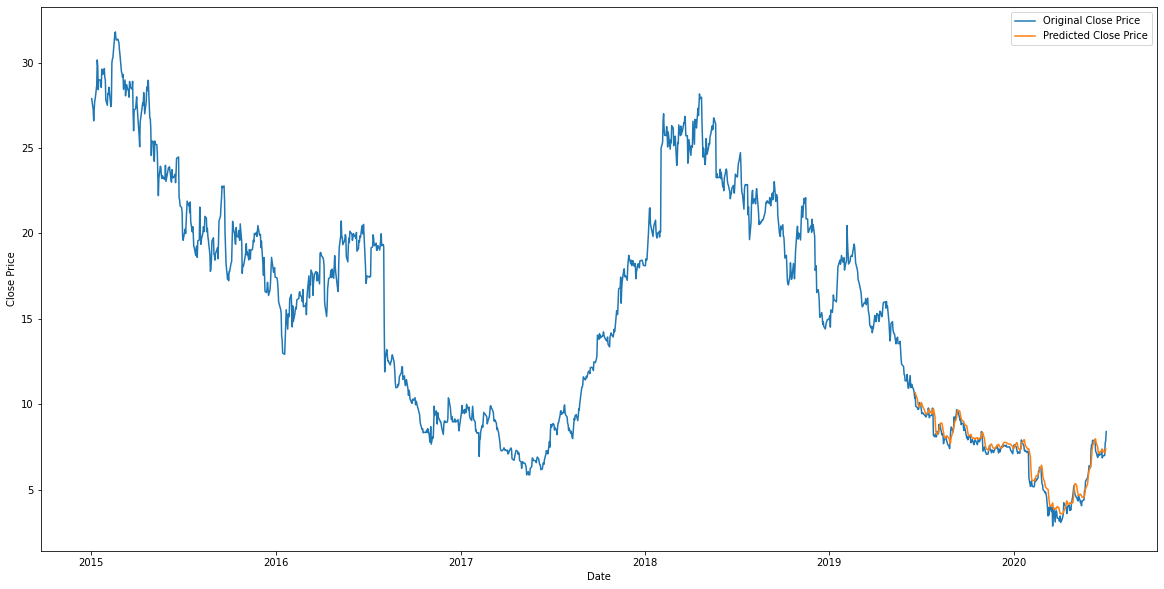

In [ ]:
graph_prediction(USAK_close, USAK_tuned_lstm_predict_df)

In [ ]:
USAK_tuned_lstm_pred_list = lstm_predict_10_days(USAK_test, TIMESTEP, USAK_tuned_lstm_model)

In [ ]:
USAK_tuned_lstm_pred_list = transform_data(USAK_scaler, USAK_tuned_lstm_pred_list)

In [ ]:
USAK_tuned_lstm_10_days_df = pd.DataFrame(USAK_tuned_lstm_pred_list, index = pred_dates, columns = ['Predicted Value'])

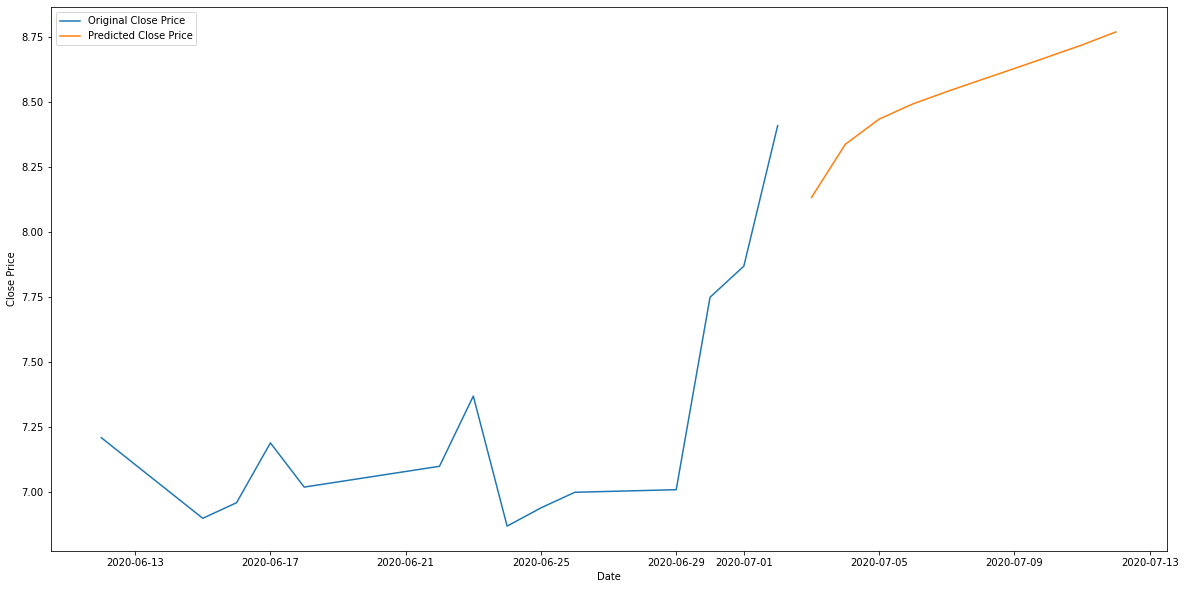

In [ ]:
graph_prediction(USAK_last_15_days_df, USAK_tuned_lstm_10_days_df)

4) UVSP - Univest Financial Corp

**Model Creation**

In [ ]:
UVSP_X_train = reshape_data(UVSP_X_train)
UVSP_X_test = reshape_data(UVSP_X_test)

In [ ]:
tf.keras.backend.clear_session()
UVSP_lstm_model = create_lstm_model(UVSP_X_train)

In [ ]:
UVSP_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 dropout_1 (Dropout)         (None, 15, 32)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [ ]:
UVSP_lstm_model.fit(UVSP_X_train, UVSP_y_train, validation_data = (UVSP_X_test, UVSP_y_test), epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
35/35 [==============================] - 6s 47ms/step - loss: 0.0773 - val_loss: 0.0172
Epoch 2/50
35/35 [==============================] - 1s 18ms/step - loss: 0.0120 - val_loss: 0.0091
Epoch 3/50
35/35 [==============================] - 1s 20ms/step - loss: 0.0077 - val_loss: 0.0069
Epoch 4/50
35/35 [==============================] - 1s 18ms/step - loss: 0.0069 - val_loss: 0.0097
Epoch 5/50
35/35 [==============================] - 1s 19ms/step - loss: 0.0071 - val_loss: 0.0078
Epoch 6/50
35/35 [==============================] - 1s 18ms/step - loss: 0.0065 - val_loss: 0.0068
Epoch 7/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0069 - val_loss: 0.0078
Epoch 8/50
35/35 [==============================] - 1s 18ms/step - loss: 0.0068 - val_loss: 0.0069
Epoch 9/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0067 - val_loss: 0.0080
Epoch 10/50
35/35 [==============================] - 1s 20ms/step - loss: 0.0063 - val_loss: 0.0067
Epoch 11/

In [ ]:
UVSP_lstm_predict = UVSP_lstm_model.predict(UVSP_X_test)
UVSP_ori_y_test = transform_data(UVSP_scaler, UVSP_y_test)
UVSP_lstm_y_pred = transform_data(UVSP_scaler, UVSP_lstm_predict)

In [ ]:
# Model Evaluation
lstm_model_evaluation('UVSP', UVSP_ori_y_test, UVSP_lstm_y_pred)

Model Evaluation for stock - UVSP
------------------------------------------------
RMSE     : 1.1960833839304892
MSE      : 1.4306154613146098
MAE      : 0.7665433774049253
R2       : 0.931860605799066


In [ ]:
# Create prediction dateframe
UVSP_lstm_predict_df = create_pred_df(UVSP_close, UVSP_lstm_y_pred)

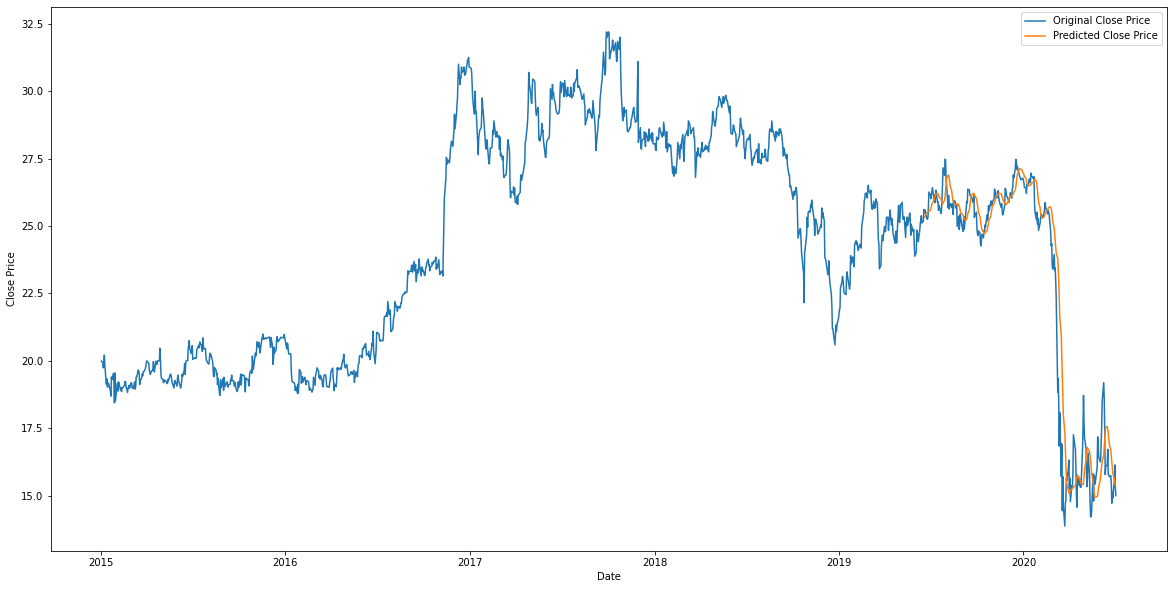

In [ ]:
graph_prediction(UVSP_close, UVSP_lstm_predict_df)

In [ ]:
UVSP_lstm_pred_list = lstm_predict_10_days(UVSP_test, TIMESTEP, UVSP_lstm_model)

In [ ]:
UVSP_lstm_pred_list = transform_data(UVSP_scaler, UVSP_lstm_pred_list)

In [ ]:
UVSP_lstm_10_days_df = pd.DataFrame(UVSP_lstm_pred_list, index = pred_dates, columns = ['Predicted Value'])

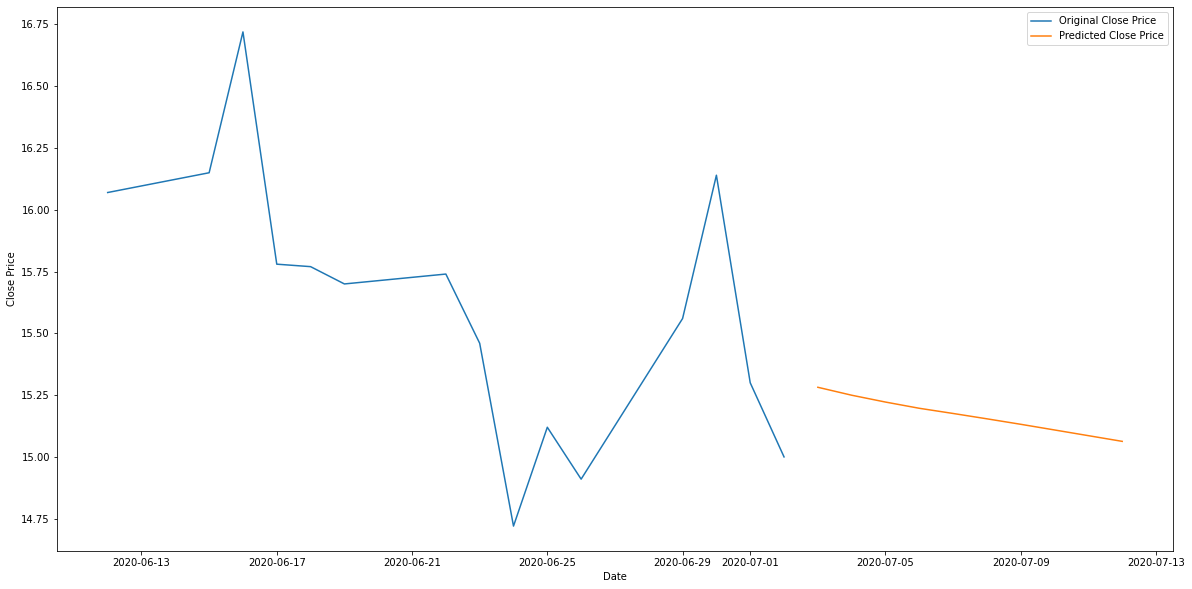

In [ ]:
graph_prediction(UVSP_last_15_days_df, UVSP_lstm_10_days_df)

**Hyperparameter Tuning**

In [ ]:
results = LSTM_parameter_tuning(UVSP_X_train, UVSP_y_train, UVSP_X_test, UVSP_y_test)

Combination  1
-------------------------------------------------------
Epoch 1/50
35/35 [==============================] - 8s 65ms/step - loss: 0.1225 - val_loss: 0.0176
Epoch 2/50
35/35 [==============================] - 1s 25ms/step - loss: 0.0147 - val_loss: 0.0099
Epoch 3/50
35/35 [==============================] - 1s 26ms/step - loss: 0.0102 - val_loss: 0.0077
Epoch 4/50
35/35 [==============================] - 1s 26ms/step - loss: 0.0090 - val_loss: 0.0073
Epoch 5/50
35/35 [==============================] - 1s 27ms/step - loss: 0.0090 - val_loss: 0.0075
Epoch 6/50
35/35 [==============================] - 1s 26ms/step - loss: 0.0086 - val_loss: 0.0081
Epoch 7/50
35/35 [==============================] - 1s 26ms/step - loss: 0.0076 - val_loss: 0.0084
Epoch 8/50
35/35 [==============================] - 1s 27ms/step - loss: 0.0073 - val_loss: 0.0074
Epoch 9/50
35/35 [==============================] - 1s 25ms/step - loss: 0.0069 - val_loss: 0.0086
Epoch 10/50
35/35 [===================

Applying parameters in LSTM model for UVSP stock

In [ ]:
UVSP_results_df = pd.DataFrame(results, columns = ['nodes', 'dropout', 'batch_size', 'dense', 'epoch', 'test_acc'])

UVSP_results_df.sort_values(by = ['test_acc'], inplace = True)

UVSP_results_df

nodes  dropout  batch_size  dense  epoch  test_acc
5     64      0.2          32      1    100  0.001963
1     32      0.2          32      1    100  0.002937
7     64      0.2          64      1    100  0.003163
4     64      0.2          32      1     50  0.003592
3     32      0.2          64      1    100  0.004044
0     32      0.2          32      1     50  0.005073
6     64      0.2          64      1     50  0.005575
2     32      0.2          64      1     50  0.006622

In [ ]:
tf.keras.backend.clear_session()

nodes, dropout, batch_size, dense, epoch = 64, 0.2, 32, 1, 100

UVSP_tuned_lstm_model = Sequential()
UVSP_tuned_lstm_model.add(LSTM(nodes, return_sequences = True, input_shape = (UVSP_X_train.shape[1], UVSP_X_train.shape[2])))
UVSP_tuned_lstm_model.add(Dropout(dropout))

UVSP_tuned_lstm_model.add(LSTM(nodes, return_sequences = True))
UVSP_tuned_lstm_model.add(Dropout(dropout))

UVSP_tuned_lstm_model.add(LSTM(nodes))
UVSP_tuned_lstm_model.add(Dropout(dropout))

UVSP_tuned_lstm_model.add(Dense(dense))

UVSP_tuned_lstm_model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
UVSP_tuned_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 15, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 15, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 15, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 6

In [ ]:
UVSP_tuned_lstm_model.fit(UVSP_X_train, UVSP_y_train, validation_data = (UVSP_X_test, UVSP_y_test), epochs = epoch, batch_size = batch_size, verbose = 1)

Epoch 1/100
35/35 [==============================] - 7s 57ms/step - loss: 0.0641 - val_loss: 0.0122
Epoch 2/100
35/35 [==============================] - 1s 25ms/step - loss: 0.0068 - val_loss: 0.0070
Epoch 3/100
35/35 [==============================] - 1s 23ms/step - loss: 0.0051 - val_loss: 0.0070
Epoch 4/100
35/35 [==============================] - 1s 26ms/step - loss: 0.0049 - val_loss: 0.0068
Epoch 5/100
35/35 [==============================] - 1s 26ms/step - loss: 0.0047 - val_loss: 0.0071
Epoch 6/100
35/35 [==============================] - 1s 25ms/step - loss: 0.0048 - val_loss: 0.0064
Epoch 7/100
35/35 [==============================] - 1s 26ms/step - loss: 0.0049 - val_loss: 0.0068
Epoch 8/100
35/35 [==============================] - 1s 27ms/step - loss: 0.0046 - val_loss: 0.0072
Epoch 9/100
35/35 [==============================] - 1s 26ms/step - loss: 0.0044 - val_loss: 0.0071
Epoch 10/100
35/35 [==============================] - 1s 24ms/step - loss: 0.0044 - val_loss: 0.0079

In [ ]:
UVSP_tuned_lstm_predict = UVSP_tuned_lstm_model.predict(UVSP_X_test)
UVSP_tuned_lstm_y_pred = transform_data(UVSP_scaler, UVSP_tuned_lstm_predict)

**Model Evaluation**

In [ ]:
# Model Evaluation
lstm_model_evaluation('UVSP', UVSP_ori_y_test, UVSP_tuned_lstm_y_pred)

Model Evaluation for stock - UVSP
------------------------------------------------
RMSE     : 0.7951517963333069
MSE      : 0.6322663792120848
MAE      : 0.5234803093804254
R2       : 0.9698855148583808


In [ ]:
# Create prediction dateframe
UVSP_tuned_lstm_predict_df = create_pred_df(UVSP_close, UVSP_tuned_lstm_y_pred)

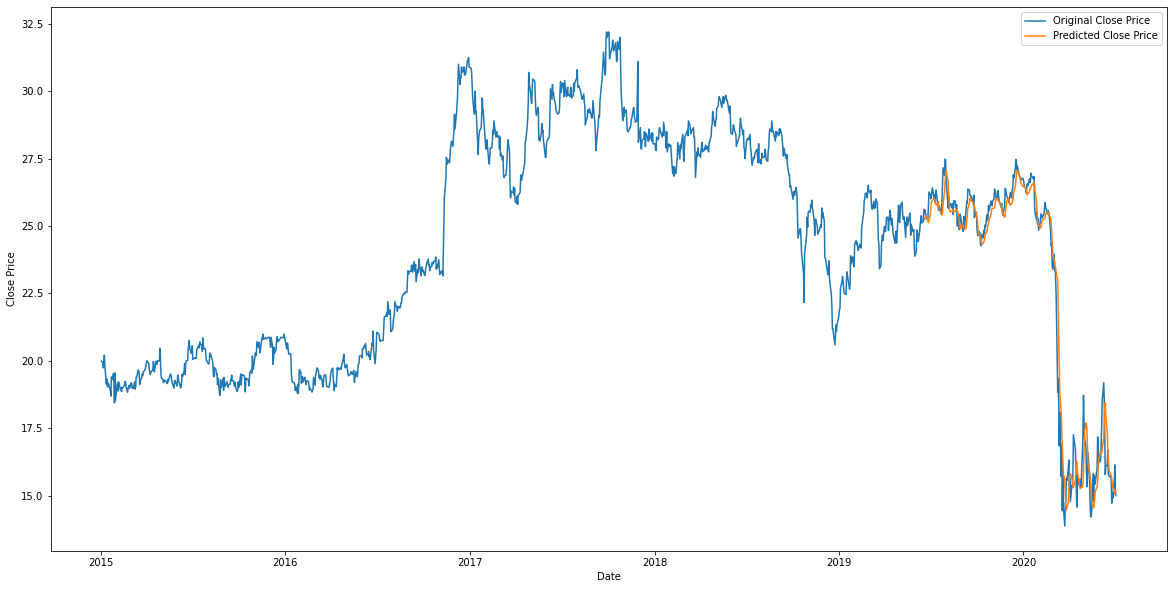

In [ ]:
graph_prediction(UVSP_close, UVSP_tuned_lstm_predict_df)

In [ ]:
UVSP_tuned_lstm_pred_list = lstm_predict_10_days(UVSP_test, TIMESTEP, UVSP_tuned_lstm_model)

In [ ]:
UVSP_tuned_lstm_pred_list = transform_data(UVSP_scaler, UVSP_tuned_lstm_pred_list)

In [ ]:
UVSP_tuned_lstm_10_days_df = pd.DataFrame(UVSP_tuned_lstm_pred_list, index = pred_dates, columns = ['Predicted Value'])

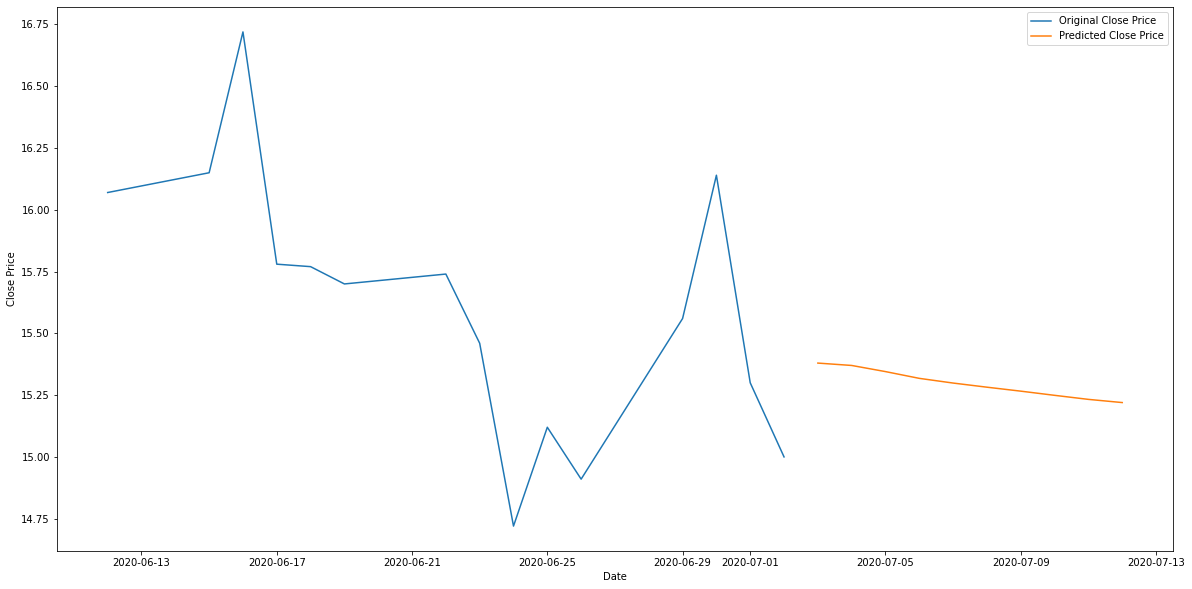

In [ ]:
graph_prediction(UVSP_last_15_days_df, UVSP_tuned_lstm_10_days_df)

**3. Recurrent Neural Network (RNN)**

Declaring Functions for model creation and evaluation

In [ ]:
# Import libraries needed for model creation of RNN
from tensorflow.keras.layers import SimpleRNN

In [ ]:
def create_rnn_model(X_train):
  model = Sequential()

  model.add(SimpleRNN(32, return_sequences = True, input_shape = (X_train.shape[1],X_train.shape[2])))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(32, return_sequences = True))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(32))
  model.add(Dropout(0.2))

  model.add(Dense(1))

  model.compile(optimizer= "adam", loss = "mean_squared_error")

  return model

Applying RNN model on the stocks

1) GDX - VanEck Gold Miners ETF

**Model Creation**

In [ ]:
tf.keras.backend.clear_session()
GDX_rnn_model = create_rnn_model(GDX_X_train)

In [ ]:
GDX_rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 15, 32)            1088      
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 15, 32)            2080      
                                                                 
 dropout_1 (Dropout)         (None, 15, 32)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [ ]:
GDX_rnn_model.fit(GDX_X_train, GDX_y_train, validation_data = (GDX_X_test, GDX_y_test), epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
35/35 [==============================] - 3s 21ms/step - loss: 0.2225 - val_loss: 0.0308
Epoch 2/50
35/35 [==============================] - 0s 11ms/step - loss: 0.0901 - val_loss: 0.0184
Epoch 3/50
35/35 [==============================] - 0s 11ms/step - loss: 0.0570 - val_loss: 0.0114
Epoch 4/50
35/35 [==============================] - 0s 12ms/step - loss: 0.0384 - val_loss: 0.0096
Epoch 5/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0284 - val_loss: 0.0104
Epoch 6/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0235 - val_loss: 0.0051
Epoch 7/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0191 - val_loss: 0.0054
Epoch 8/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0153 - val_loss: 0.0077
Epoch 9/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0146 - val_loss: 0.0047
Epoch 10/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0106 - val_loss: 0.0074
Epoch 11/50
35

In [ ]:
GDX_rnn_predict = GDX_rnn_model.predict(GDX_X_test)
GDX_ori_y_test = transform_data(GDX_scaler, GDX_y_test)
GDX_rnn_y_pred = transform_data(GDX_scaler, GDX_rnn_predict)

In [ ]:
# Model Evaluation
lstm_model_evaluation('GDX', GDX_ori_y_test, GDX_rnn_y_pred)

Model Evaluation for stock - GDX
------------------------------------------------
RMSE     : 1.2494060713198336
MSE      : 1.561015531050861
MAE      : 0.888932721368198
R2       : 0.8475525567014246


In [ ]:
# Create prediction dateframe
GDX_rnn_predict_df = create_pred_df(GDX_close, GDX_rnn_y_pred)

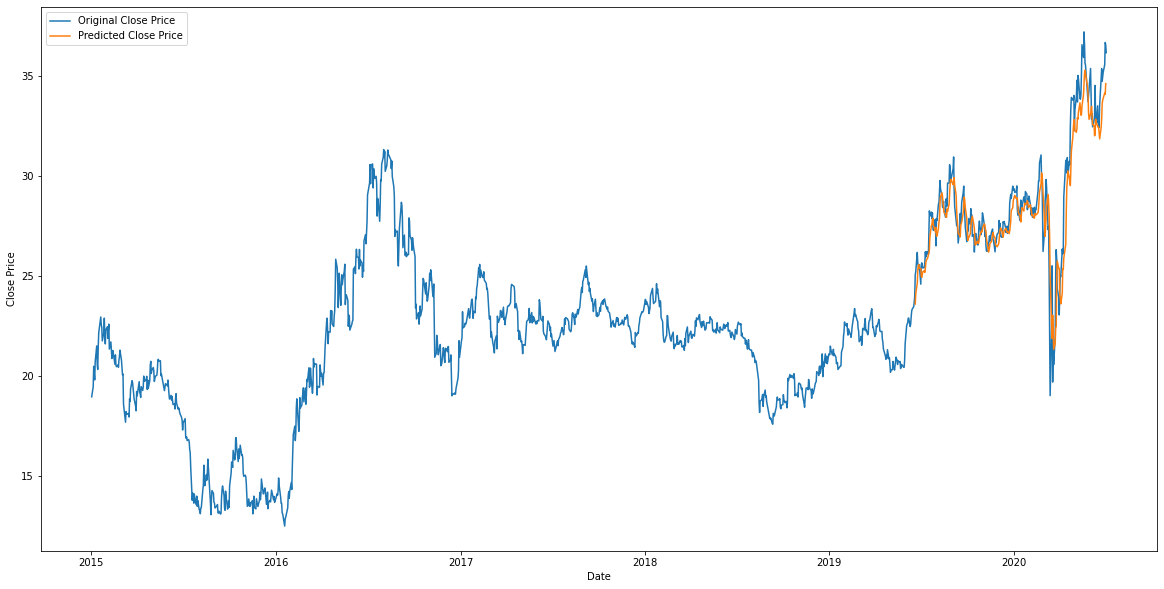

In [ ]:
graph_prediction(GDX_close, GDX_rnn_predict_df)

In [ ]:
GDX_rnn_pred_list = lstm_predict_10_days(GDX_test, TIMESTEP, GDX_rnn_model)

In [ ]:
GDX_rnn_pred_list = transform_data(GDX_scaler, GDX_rnn_pred_list)

In [ ]:
GDX_rnn_10_days_df = pd.DataFrame(GDX_rnn_pred_list, index = pred_dates, columns = ['Predicted Value'])

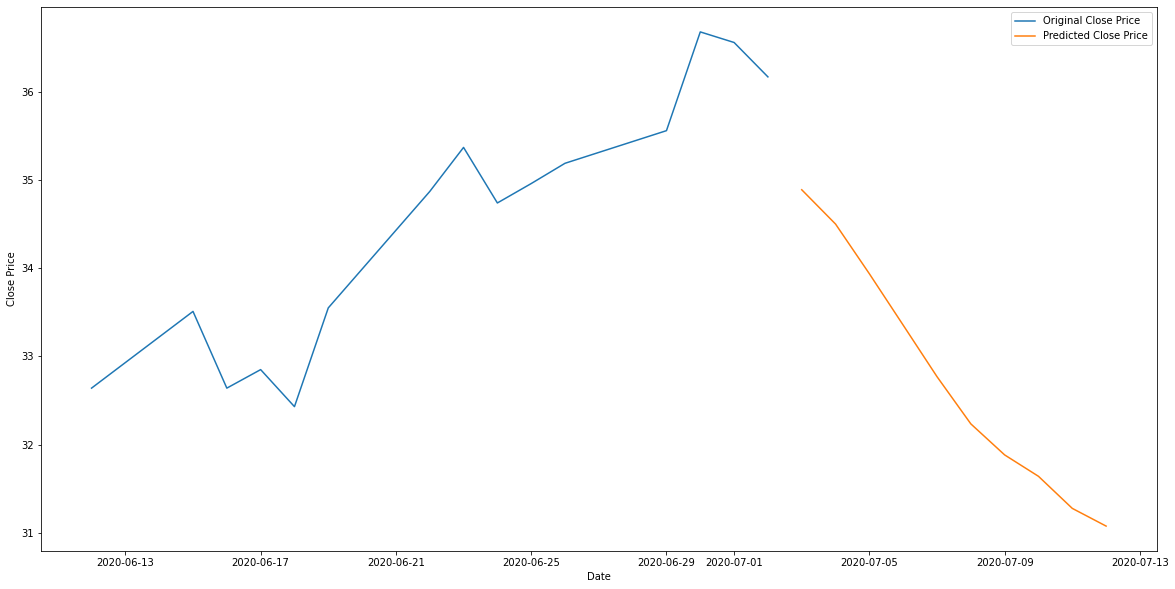

In [ ]:
graph_prediction(GDX_last_15_days_df, GDX_rnn_10_days_df)

**Hyperparameter Tuning**

Declaring function for hyperparameter tuning

In [ ]:
def RNN_parameter_tuning(X_train, y_train, X_test, y_test):
  nodes = [32, 64]
  dropout = [0.2]
  batch_size = [32, 64]
  dense = [1]
  epoch = [50, 100]

  combinations = list(product(nodes, dropout, batch_size, dense, epoch))
  results = []
  for i in range(len(combinations)):
    print('Combination ', i+1)
    print('-------------------------------------------------------')

    nodes, dropout, batch_size, dense, epoch = combinations[i]

    tf.keras.backend.clear_session()

    model = Sequential()
    model.add(SimpleRNN(nodes, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout))

    model.add(SimpleRNN(nodes, return_sequences = True))
    model.add(Dropout(dropout))

    model.add(SimpleRNN(nodes))
    model.add(Dropout(dropout))

    model.add(Dense(dense))

    model.compile(loss = 'mean_squared_error', optimizer = 'adam')

    model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = epoch, batch_size = batch_size, verbose = 1)

    test_acc = model.evaluate(X_test, y_test, verbose = 0)

    results.append([nodes, dropout, batch_size, dense, epoch, test_acc])

    print(f'\nCombination {i+1}: {combinations[i]}')
    print(f'test acc: {test_acc}\n\n\n')

  
  return results

In [ ]:
results = RNN_parameter_tuning(GDX_X_train, GDX_y_train, GDX_X_test, GDX_y_test)

Combination  1
-------------------------------------------------------
Epoch 1/50
35/35 [==============================] - 4s 34ms/step - loss: 0.4269 - val_loss: 0.0826
Epoch 2/50
35/35 [==============================] - 1s 16ms/step - loss: 0.2120 - val_loss: 0.0946
Epoch 3/50
35/35 [==============================] - 1s 16ms/step - loss: 0.1233 - val_loss: 0.0241
Epoch 4/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0911 - val_loss: 0.0250
Epoch 5/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0669 - val_loss: 0.0180
Epoch 6/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0520 - val_loss: 0.0129
Epoch 7/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0418 - val_loss: 0.0083
Epoch 8/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0341 - val_loss: 0.0080
Epoch 9/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0288 - val_loss: 0.0071
Epoch 10/50
35/35 [===================

Applying parameters in RNN model for GDX stock

In [ ]:
GDX_rnn_results_df = pd.DataFrame(results, columns = ['nodes', 'dropout', 'batch_size', 'dense', 'epoch', 'test_acc'])

GDX_rnn_results_df.sort_values(by = ['test_acc'], inplace = True)

GDX_rnn_results_df

nodes  dropout  batch_size  dense  epoch  test_acc
1     32      0.2          32      1    100  0.001766
5     64      0.2          32      1    100  0.001778
7     64      0.2          64      1    100  0.001971
4     64      0.2          32      1     50  0.002187
6     64      0.2          64      1     50  0.002823
3     32      0.2          64      1    100  0.003068
0     32      0.2          32      1     50  0.003442
2     32      0.2          64      1     50  0.004029

In [ ]:
tf.keras.backend.clear_session()

nodes, dropout, batch_size, dense, epoch = 32, 0.2, 32, 1, 100

GDX_tuned_rnn_model = Sequential()
GDX_tuned_rnn_model.add(SimpleRNN(nodes, return_sequences = True, input_shape = (GDX_X_train.shape[1], GDX_X_train.shape[2])))
GDX_tuned_rnn_model.add(Dropout(dropout))

GDX_tuned_rnn_model.add(SimpleRNN(nodes, return_sequences = True))
GDX_tuned_rnn_model.add(Dropout(dropout))

GDX_tuned_rnn_model.add(SimpleRNN(nodes))
GDX_tuned_rnn_model.add(Dropout(dropout))

GDX_tuned_rnn_model.add(Dense(dense))

GDX_tuned_rnn_model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
GDX_tuned_rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 15, 32)            1088      
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 15, 32)            2080      
                                                                 
 dropout_1 (Dropout)         (None, 15, 32)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [ ]:
GDX_tuned_rnn_model.fit(GDX_X_train, GDX_y_train, validation_data = (GDX_X_test, GDX_y_test), epochs = epoch, batch_size = batch_size, verbose = 1)

Epoch 1/100
35/35 [==============================] - 3s 19ms/step - loss: 0.1980 - val_loss: 0.0107
Epoch 2/100
35/35 [==============================] - 0s 10ms/step - loss: 0.0782 - val_loss: 0.0083
Epoch 3/100
35/35 [==============================] - 0s 11ms/step - loss: 0.0464 - val_loss: 0.0092
Epoch 4/100
35/35 [==============================] - 0s 10ms/step - loss: 0.0380 - val_loss: 0.0134
Epoch 5/100
35/35 [==============================] - 0s 9ms/step - loss: 0.0286 - val_loss: 0.0087
Epoch 6/100
35/35 [==============================] - 0s 10ms/step - loss: 0.0217 - val_loss: 0.0112
Epoch 7/100
35/35 [==============================] - 0s 10ms/step - loss: 0.0203 - val_loss: 0.0050
Epoch 8/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0188 - val_loss: 0.0100
Epoch 9/100
35/35 [==============================] - 0s 9ms/step - loss: 0.0146 - val_loss: 0.0086
Epoch 10/100
35/35 [==============================] - 0s 9ms/step - loss: 0.0130 - val_loss: 0.0053
Epo

In [ ]:
GDX_tuned_rnn_predict = GDX_tuned_rnn_model.predict(GDX_X_test)
GDX_tuned_rnn_y_pred = transform_data(GDX_scaler, GDX_tuned_rnn_predict)

In [ ]:
# Model Evaluation
lstm_model_evaluation('GDX', GDX_ori_y_test, GDX_tuned_rnn_y_pred)

Model Evaluation for stock - GDX
------------------------------------------------
RMSE     : 1.2088490409481067
MSE      : 1.4613160038011574
MAE      : 0.8833257814020037
R2       : 0.8572891273664597


In [ ]:
# Create prediction dateframe
GDX_tuned_rnn_predict_df = create_pred_df(GDX_close, GDX_tuned_rnn_y_pred)

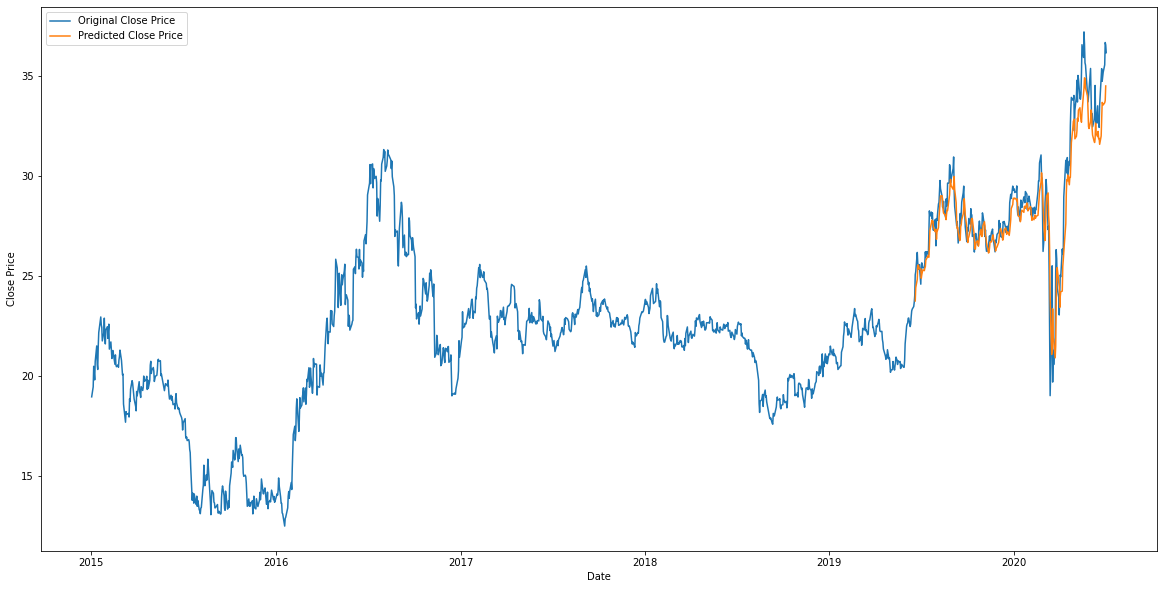

In [ ]:
graph_prediction(GDX_close, GDX_tuned_rnn_predict_df)

In [ ]:
GDX_tuned_rnn_pred_list = lstm_predict_10_days(GDX_test, TIMESTEP, GDX_tuned_rnn_model)

In [ ]:
GDX_tuned_rnn_pred_list = transform_data(GDX_scaler, GDX_tuned_rnn_pred_list)

In [ ]:
GDX_tuned_rnn_10_days_df = pd.DataFrame(GDX_tuned_rnn_pred_list, index = pred_dates, columns = ['Predicted Value'])

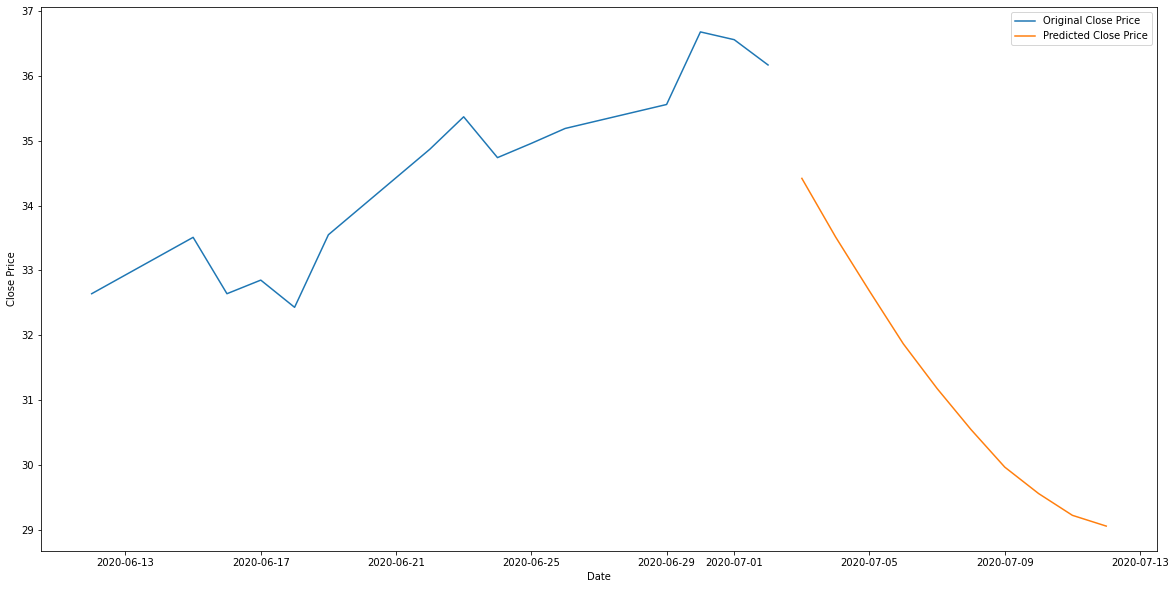

In [ ]:
graph_prediction(GDX_last_15_days_df, GDX_tuned_rnn_10_days_df)

2) TWTR - Twitter Inc

**Model Creation**

In [ ]:
tf.keras.backend.clear_session()
TWTR_rnn_model = create_rnn_model(TWTR_X_train)

In [ ]:
TWTR_rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 15, 32)            1088      
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 15, 32)            2080      
                                                                 
 dropout_1 (Dropout)         (None, 15, 32)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [ ]:
TWTR_rnn_model.fit(TWTR_X_train, TWTR_y_train, validation_data = (TWTR_X_test, TWTR_y_test), epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
35/35 [==============================] - 2s 17ms/step - loss: 0.2275 - val_loss: 0.0117
Epoch 2/50
35/35 [==============================] - 0s 9ms/step - loss: 0.1248 - val_loss: 0.0040
Epoch 3/50
35/35 [==============================] - 0s 8ms/step - loss: 0.0785 - val_loss: 0.0055
Epoch 4/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0565 - val_loss: 0.0045
Epoch 5/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0425 - val_loss: 0.0041
Epoch 6/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0351 - val_loss: 0.0037
Epoch 7/50
35/35 [==============================] - 0s 11ms/step - loss: 0.0295 - val_loss: 0.0047
Epoch 8/50
35/35 [==============================] - 0s 11ms/step - loss: 0.0247 - val_loss: 0.0065
Epoch 9/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0227 - val_loss: 0.0025
Epoch 10/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0176 - val_loss: 0.0016
Epoch 11/50
35/

In [ ]:
TWTR_rnn_predict = TWTR_rnn_model.predict(TWTR_X_test)
TWTR_ori_y_test = transform_data(TWTR_scaler, TWTR_y_test)
TWTR_rnn_y_pred = transform_data(TWTR_scaler, TWTR_rnn_predict)

In [ ]:
# Model Evaluation
lstm_model_evaluation('TWTR', TWTR_ori_y_test, TWTR_rnn_y_pred)

Model Evaluation for stock - TWTR
------------------------------------------------
RMSE     : 1.367874911633301
MSE      : 1.8710817738758114
MAE      : 0.9805956215694035
R2       : 0.9353370415838076


In [ ]:
# Create prediction dateframe
TWTR_rnn_predict_df = create_pred_df(TWTR_close, TWTR_rnn_y_pred)

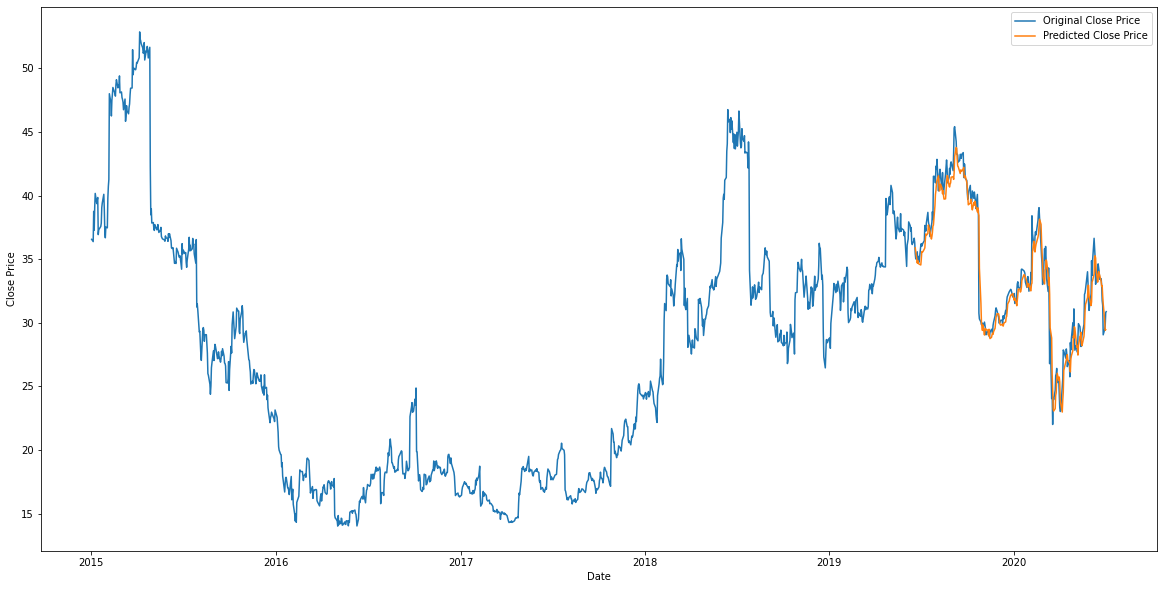

In [ ]:
graph_prediction(TWTR_close, TWTR_rnn_predict_df)

In [ ]:
TWTR_rnn_pred_list = lstm_predict_10_days(TWTR_test, TIMESTEP, TWTR_rnn_model)

In [ ]:
TWTR_rnn_pred_list = transform_data(TWTR_scaler, TWTR_rnn_pred_list)

In [ ]:
TWTR_rnn_10_days_df = pd.DataFrame(TWTR_rnn_pred_list, index = pred_dates, columns = ['Predicted Value'])

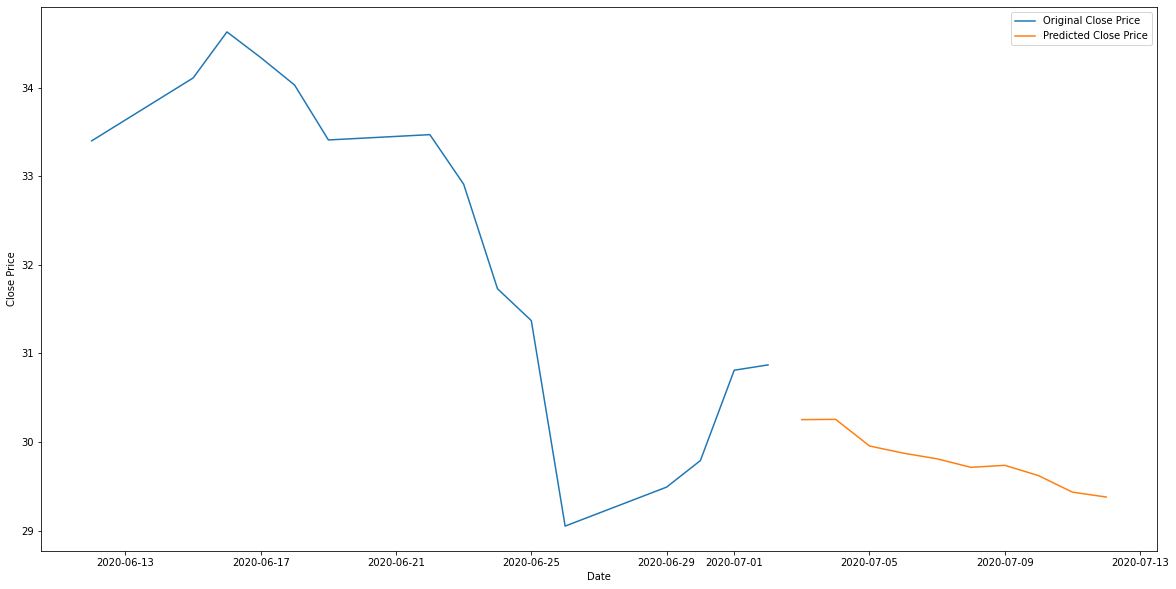

In [ ]:
graph_prediction(TWTR_last_15_days_df, TWTR_rnn_10_days_df)

**Hyperparameter Tuning**

In [ ]:
results = RNN_parameter_tuning(TWTR_X_train, TWTR_y_train, TWTR_X_test, TWTR_y_test)

Combination  1
-------------------------------------------------------
Epoch 1/50
35/35 [==============================] - 3s 20ms/step - loss: 0.3037 - val_loss: 0.0066
Epoch 2/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1228 - val_loss: 0.0141
Epoch 3/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0765 - val_loss: 0.0045
Epoch 4/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0507 - val_loss: 0.0141
Epoch 5/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0467 - val_loss: 0.0131
Epoch 6/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0379 - val_loss: 0.0038
Epoch 7/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0300 - val_loss: 0.0173
Epoch 8/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0258 - val_loss: 0.0053
Epoch 9/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0221 - val_loss: 0.0038
Epoch 10/50
35/35 [========================

Applying parameters in RNN model for TWTR stock

In [ ]:
TWTR_rnn_results_df = pd.DataFrame(results, columns = ['nodes', 'dropout', 'batch_size', 'dense', 'epoch', 'test_acc'])

TWTR_rnn_results_df.sort_values(by = ['test_acc'], inplace = True)

TWTR_rnn_results_df

nodes  dropout  batch_size  dense  epoch  test_acc
7     64      0.2          64      1    100  0.001027
3     32      0.2          64      1    100  0.001045
1     32      0.2          32      1    100  0.001165
2     32      0.2          64      1     50  0.001170
4     64      0.2          32      1     50  0.001200
0     32      0.2          32      1     50  0.001238
5     64      0.2          32      1    100  0.001251
6     64      0.2          64      1     50  0.002249

In [ ]:
tf.keras.backend.clear_session()

nodes, dropout, batch_size, dense, epoch = 64, 0.2, 32, 1, 100

TWTR_tuned_rnn_model = Sequential()
TWTR_tuned_rnn_model.add(SimpleRNN(nodes, return_sequences = True, input_shape = (TWTR_X_train.shape[1], TWTR_X_train.shape[2])))
TWTR_tuned_rnn_model.add(Dropout(dropout))

TWTR_tuned_rnn_model.add(SimpleRNN(nodes, return_sequences = True))
TWTR_tuned_rnn_model.add(Dropout(dropout))

TWTR_tuned_rnn_model.add(SimpleRNN(nodes))
TWTR_tuned_rnn_model.add(Dropout(dropout))

TWTR_tuned_rnn_model.add(Dense(dense))

TWTR_tuned_rnn_model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
TWTR_tuned_rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 15, 64)            4224      
                                                                 
 dropout (Dropout)           (None, 15, 64)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 15, 64)            8256      
                                                                 
 dropout_1 (Dropout)         (None, 15, 64)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 6

In [ ]:
TWTR_tuned_rnn_model.fit(TWTR_X_train, TWTR_y_train, validation_data = (TWTR_X_test, TWTR_y_test), epochs = epoch, batch_size = batch_size, verbose = 1)

Epoch 1/100
35/35 [==============================] - 3s 20ms/step - loss: 0.2538 - val_loss: 0.0070
Epoch 2/100
35/35 [==============================] - 0s 12ms/step - loss: 0.0947 - val_loss: 0.0225
Epoch 3/100
35/35 [==============================] - 0s 10ms/step - loss: 0.0638 - val_loss: 0.0116
Epoch 4/100
35/35 [==============================] - 0s 12ms/step - loss: 0.0423 - val_loss: 0.0239
Epoch 5/100
35/35 [==============================] - 0s 13ms/step - loss: 0.0377 - val_loss: 0.0020
Epoch 6/100
35/35 [==============================] - 0s 13ms/step - loss: 0.0301 - val_loss: 0.0164
Epoch 7/100
35/35 [==============================] - 0s 11ms/step - loss: 0.0275 - val_loss: 0.0029
Epoch 8/100
35/35 [==============================] - 0s 12ms/step - loss: 0.0244 - val_loss: 0.0023
Epoch 9/100
35/35 [==============================] - 0s 11ms/step - loss: 0.0191 - val_loss: 0.0017
Epoch 10/100
35/35 [==============================] - 0s 11ms/step - loss: 0.0197 - val_loss: 0.0062

In [ ]:
TWTR_tuned_rnn_predict = TWTR_tuned_rnn_model.predict(TWTR_X_test)
TWTR_tuned_rnn_y_pred = transform_data(TWTR_scaler, TWTR_tuned_rnn_predict)

In [ ]:
# Model Evaluation
lstm_model_evaluation('TWTR', TWTR_ori_y_test, TWTR_tuned_rnn_y_pred)

Model Evaluation for stock - TWTR
------------------------------------------------
RMSE     : 1.212985443950624
MSE      : 1.4713336872360925
MAE      : 0.8077082725320283
R2       : 0.9491519877097551


In [ ]:
# Create prediction dateframe
TWTR_tuned_rnn_predict_df = create_pred_df(TWTR_close, TWTR_tuned_rnn_y_pred)

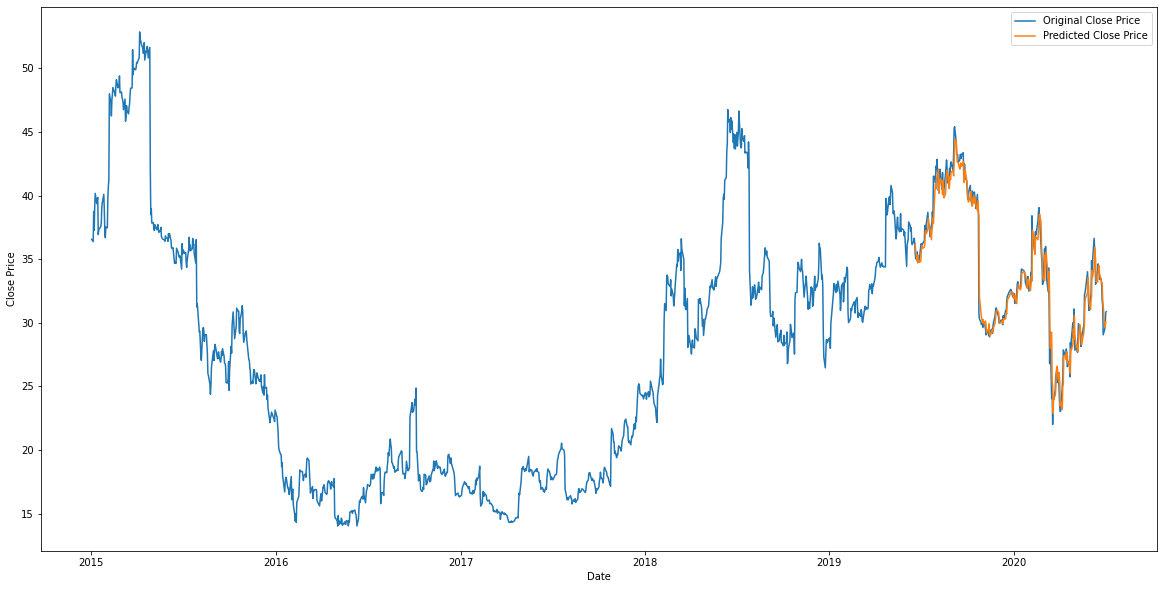

In [ ]:
graph_prediction(TWTR_close, TWTR_tuned_rnn_predict_df)

In [ ]:
TWTR_tuned_rnn_pred_list = lstm_predict_10_days(TWTR_test, TIMESTEP, TWTR_tuned_rnn_model)

In [ ]:
TWTR_tuned_rnn_pred_list = transform_data(TWTR_scaler, TWTR_tuned_rnn_pred_list)

In [ ]:
TWTR_tuned_rnn_10_days_df = pd.DataFrame(TWTR_tuned_rnn_pred_list, index = pred_dates, columns = ['Predicted Value'])

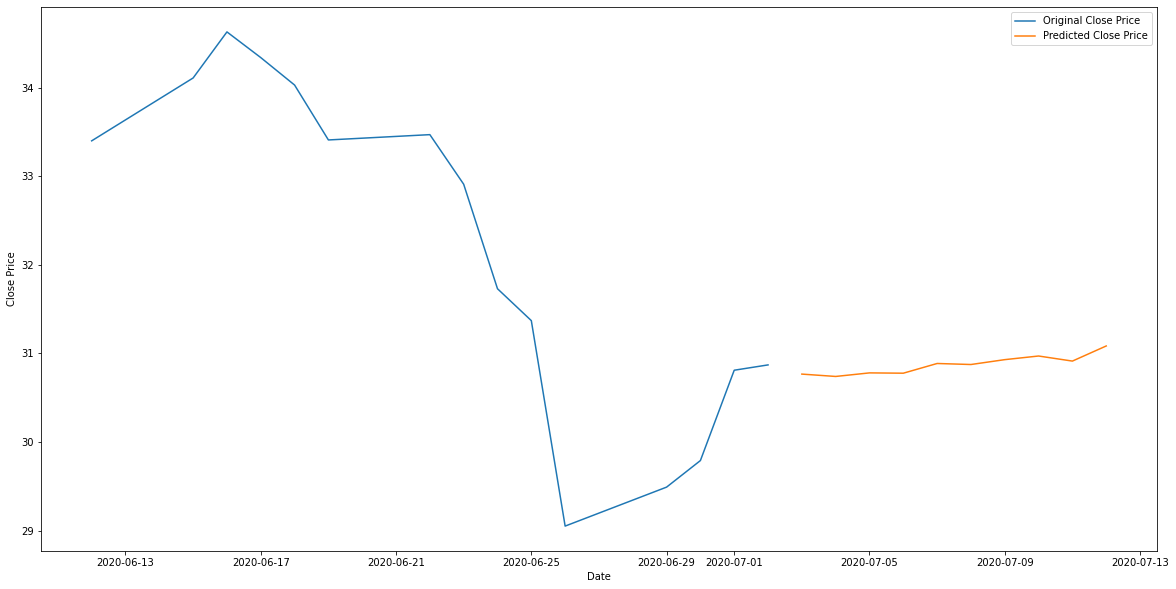

In [ ]:
graph_prediction(TWTR_last_15_days_df, TWTR_tuned_rnn_10_days_df)

3) USAK - USA Truck, Inc

**Model Creation**

In [ ]:
tf.keras.backend.clear_session()
USAK_rnn_model = create_rnn_model(USAK_X_train)

In [ ]:
USAK_rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 15, 32)            1088      
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 15, 32)            2080      
                                                                 
 dropout_1 (Dropout)         (None, 15, 32)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [ ]:
USAK_rnn_model.fit(USAK_X_train, USAK_y_train, validation_data = (USAK_X_test, USAK_y_test), epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
35/35 [==============================] - 3s 22ms/step - loss: 0.2898 - val_loss: 0.0127
Epoch 2/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1418 - val_loss: 0.0283
Epoch 3/50
35/35 [==============================] - 0s 10ms/step - loss: 0.1017 - val_loss: 0.0021
Epoch 4/50
35/35 [==============================] - 0s 11ms/step - loss: 0.0737 - val_loss: 0.0015
Epoch 5/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0522 - val_loss: 0.0040
Epoch 6/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0476 - val_loss: 0.0038
Epoch 7/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0409 - val_loss: 0.0034
Epoch 8/50
35/35 [==============================] - 0s 9ms/step - loss: 0.0328 - val_loss: 0.0025
Epoch 9/50
35/35 [==============================] - 0s 11ms/step - loss: 0.0282 - val_loss: 0.0015
Epoch 10/50
35/35 [==============================] - 0s 11ms/step - loss: 0.0279 - val_loss: 0.0059
Epoch 11/50
3

In [ ]:
USAK_rnn_predict = USAK_rnn_model.predict(USAK_X_test)
USAK_ori_y_test = transform_data(USAK_scaler, USAK_y_test)
USAK_rnn_y_pred = transform_data(USAK_scaler, USAK_rnn_predict)

In [ ]:
# Model Evaluation
lstm_model_evaluation('USAK', USAK_ori_y_test, USAK_rnn_y_pred)

Model Evaluation for stock - USAK
------------------------------------------------
RMSE     : 0.6104330313058423
MSE      : 0.37262848570923945
MAE      : 0.5130949157407914
R2       : 0.8917912989623547


In [ ]:
# Create prediction dateframe
USAK_rnn_predict_df = create_pred_df(USAK_close, USAK_rnn_y_pred)

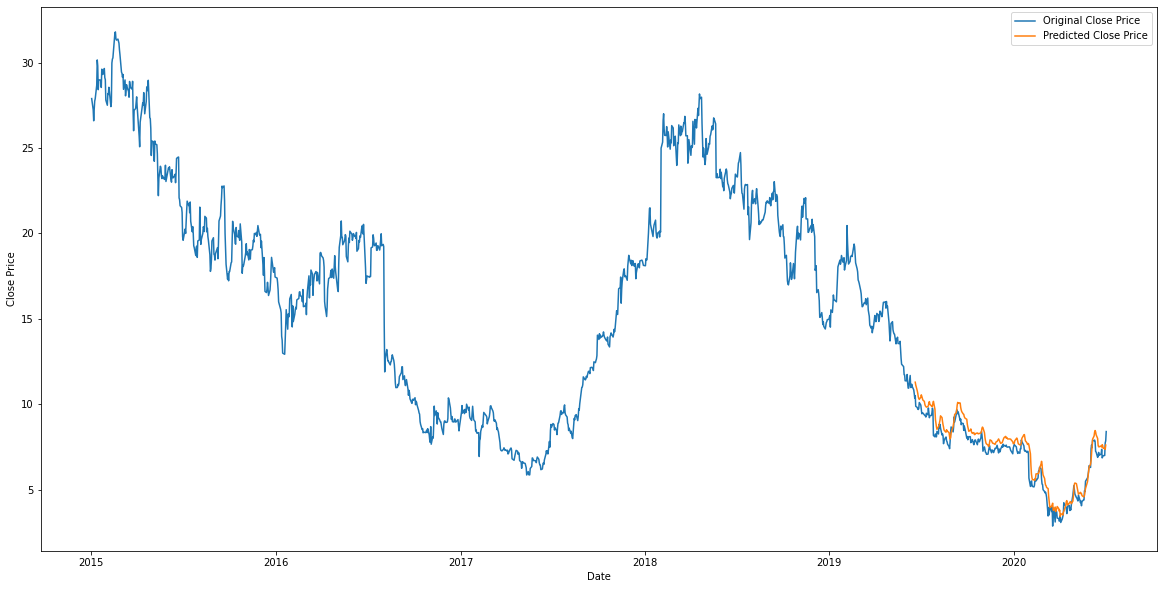

In [ ]:
graph_prediction(USAK_close, USAK_rnn_predict_df)

In [ ]:
USAK_rnn_pred_list = lstm_predict_10_days(USAK_test, TIMESTEP, USAK_rnn_model)

In [ ]:
USAK_rnn_pred_list = transform_data(USAK_scaler, USAK_rnn_pred_list)

In [ ]:
USAK_rnn_10_days_df = pd.DataFrame(USAK_rnn_pred_list, index = pred_dates, columns = ['Predicted Value'])

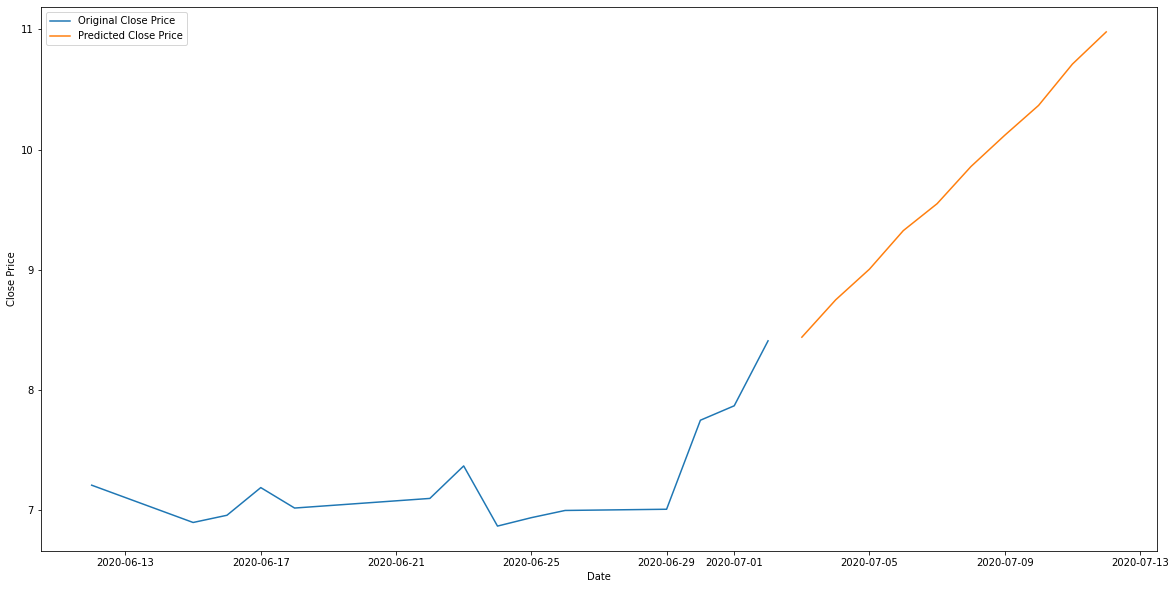

In [ ]:
graph_prediction(USAK_last_15_days_df, USAK_rnn_10_days_df)

**Hyperparameter Tuning**

In [ ]:
results = RNN_parameter_tuning(USAK_X_train, USAK_y_train, USAK_X_test, USAK_y_test)

Combination  1
-------------------------------------------------------
Epoch 1/50
35/35 [==============================] - 4s 26ms/step - loss: 0.3658 - val_loss: 0.0311
Epoch 2/50
35/35 [==============================] - 1s 14ms/step - loss: 0.1793 - val_loss: 0.0193
Epoch 3/50
35/35 [==============================] - 0s 14ms/step - loss: 0.1164 - val_loss: 0.0071
Epoch 4/50
35/35 [==============================] - 0s 13ms/step - loss: 0.0783 - val_loss: 0.0122
Epoch 5/50
35/35 [==============================] - 0s 14ms/step - loss: 0.0674 - val_loss: 0.0083
Epoch 6/50
35/35 [==============================] - 1s 14ms/step - loss: 0.0552 - val_loss: 0.0100
Epoch 7/50
35/35 [==============================] - 0s 14ms/step - loss: 0.0386 - val_loss: 0.0107
Epoch 8/50
35/35 [==============================] - 0s 14ms/step - loss: 0.0377 - val_loss: 0.0106
Epoch 9/50
35/35 [==============================] - 0s 14ms/step - loss: 0.0318 - val_loss: 0.0111
Epoch 10/50
35/35 [===================

Applying parameters in RNN model for USAK stock

In [ ]:
USAK_rnn_results_df = pd.DataFrame(results, columns = ['nodes', 'dropout', 'batch_size', 'dense', 'epoch', 'test_acc'])

USAK_rnn_results_df.sort_values(by = ['test_acc'], inplace = True)

USAK_rnn_results_df

nodes  dropout  batch_size  dense  epoch  test_acc
5     64      0.2          32      1    100  0.000124
1     32      0.2          32      1    100  0.000191
7     64      0.2          64      1    100  0.000216
2     32      0.2          64      1     50  0.000282
6     64      0.2          64      1     50  0.000299
0     32      0.2          32      1     50  0.000324
3     32      0.2          64      1    100  0.000595
4     64      0.2          32      1     50  0.000648

In [ ]:
tf.keras.backend.clear_session()

nodes, dropout, batch_size, dense, epoch = 64, 0.2, 32, 1, 100

USAK_tuned_rnn_model = Sequential()
USAK_tuned_rnn_model.add(SimpleRNN(nodes, return_sequences = True, input_shape = (USAK_X_train.shape[1], USAK_X_train.shape[2])))
USAK_tuned_rnn_model.add(Dropout(dropout))

USAK_tuned_rnn_model.add(SimpleRNN(nodes, return_sequences = True))
USAK_tuned_rnn_model.add(Dropout(dropout))

USAK_tuned_rnn_model.add(SimpleRNN(nodes))
USAK_tuned_rnn_model.add(Dropout(dropout))

USAK_tuned_rnn_model.add(Dense(dense))

USAK_tuned_rnn_model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
USAK_tuned_rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 15, 64)            4224      
                                                                 
 dropout (Dropout)           (None, 15, 64)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 15, 64)            8256      
                                                                 
 dropout_1 (Dropout)         (None, 15, 64)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 6

In [ ]:
USAK_tuned_rnn_model.fit(USAK_X_train, USAK_y_train, validation_data = (USAK_X_test, USAK_y_test), epochs = epoch, batch_size = batch_size, verbose = 1)

Epoch 1/100
35/35 [==============================] - 3s 21ms/step - loss: 0.3147 - val_loss: 0.0043
Epoch 2/100
35/35 [==============================] - 0s 10ms/step - loss: 0.1367 - val_loss: 0.0179
Epoch 3/100
35/35 [==============================] - 0s 11ms/step - loss: 0.1049 - val_loss: 0.0076
Epoch 4/100
35/35 [==============================] - 0s 11ms/step - loss: 0.0566 - val_loss: 0.0046
Epoch 5/100
35/35 [==============================] - 0s 12ms/step - loss: 0.0543 - val_loss: 0.0060
Epoch 6/100
35/35 [==============================] - 0s 13ms/step - loss: 0.0362 - val_loss: 0.0049
Epoch 7/100
35/35 [==============================] - 0s 12ms/step - loss: 0.0301 - val_loss: 0.0058
Epoch 8/100
35/35 [==============================] - 0s 11ms/step - loss: 0.0255 - val_loss: 0.0028
Epoch 9/100
35/35 [==============================] - 0s 11ms/step - loss: 0.0231 - val_loss: 0.0020
Epoch 10/100
35/35 [==============================] - 0s 12ms/step - loss: 0.0183 - val_loss: 0.0029

In [ ]:
USAK_tuned_rnn_predict = USAK_tuned_rnn_model.predict(USAK_X_test)
USAK_tuned_rnn_y_pred = transform_data(USAK_scaler, USAK_tuned_rnn_predict)

In [ ]:
# Model Evaluation
lstm_model_evaluation('USAK', USAK_ori_y_test, USAK_tuned_rnn_y_pred)

Model Evaluation for stock - USAK
------------------------------------------------
RMSE     : 0.3126454461975298
MSE      : 0.09774717502805252
MAE      : 0.21853838478468382
R2       : 0.9716149053399579


In [ ]:
# Create prediction dateframe
USAK_tuned_rnn_predict_df = create_pred_df(USAK_close, USAK_tuned_rnn_y_pred)

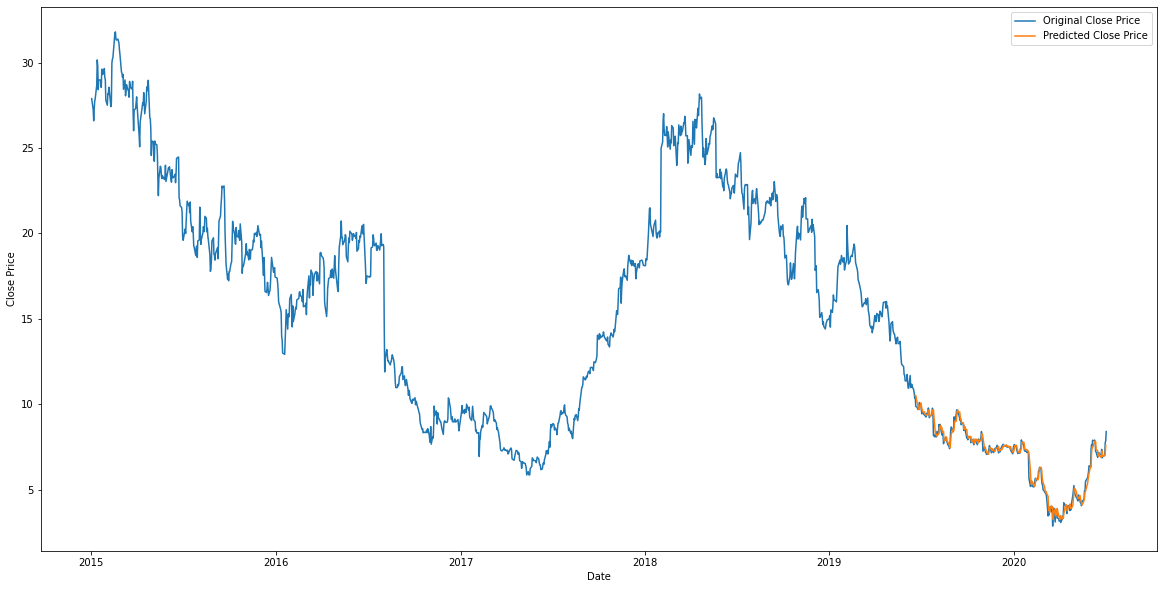

In [ ]:
graph_prediction(USAK_close, USAK_tuned_rnn_predict_df)

In [ ]:
USAK_tuned_rnn_pred_list = lstm_predict_10_days(USAK_test, TIMESTEP, USAK_tuned_rnn_model)

In [ ]:
USAK_tuned_rnn_pred_list = transform_data(USAK_scaler, USAK_tuned_rnn_pred_list)

In [ ]:
USAK_tuned_rnn_10_days_df = pd.DataFrame(USAK_tuned_rnn_pred_list, index = pred_dates, columns = ['Predicted Value'])

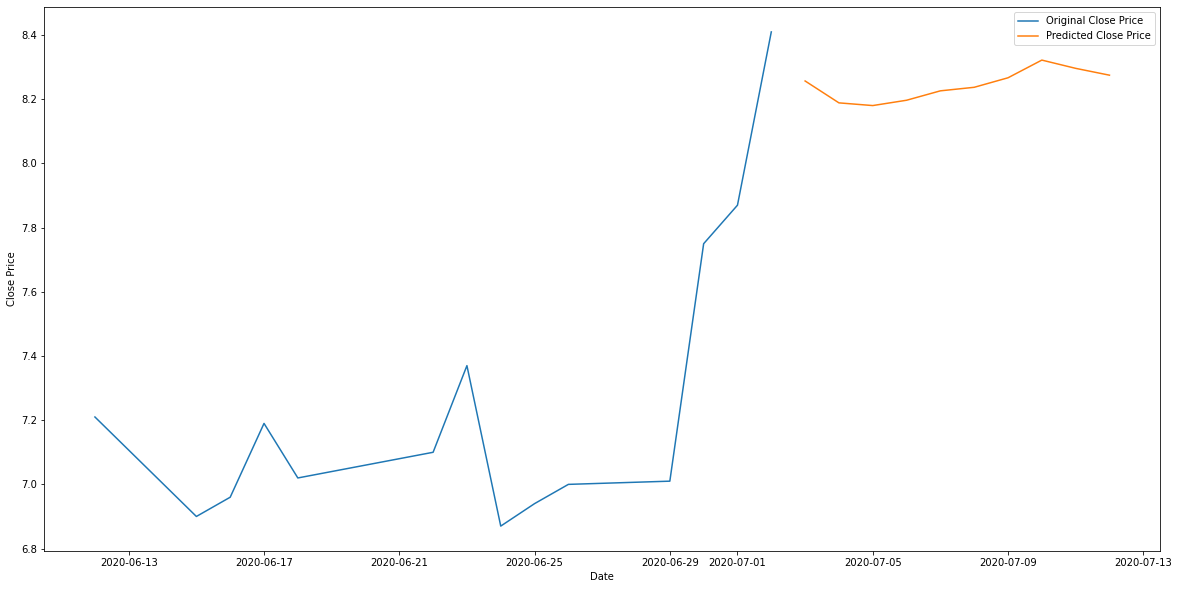

In [ ]:
graph_prediction(USAK_last_15_days_df, USAK_tuned_rnn_10_days_df)

4) UVSP - Univest Financial Corp

**Model Creation**

In [ ]:
tf.keras.backend.clear_session()
UVSP_rnn_model = create_rnn_model(UVSP_X_train)

In [ ]:
UVSP_rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 15, 32)            1088      
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 15, 32)            2080      
                                                                 
 dropout_1 (Dropout)         (None, 15, 32)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [ ]:
UVSP_rnn_model.fit(UVSP_X_train, UVSP_y_train, validation_data = (UVSP_X_test, UVSP_y_test), epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
35/35 [==============================] - 4s 28ms/step - loss: 0.4057 - val_loss: 0.0130
Epoch 2/50
35/35 [==============================] - 1s 20ms/step - loss: 0.1615 - val_loss: 0.0326
Epoch 3/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0919 - val_loss: 0.0229
Epoch 4/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0734 - val_loss: 0.0181
Epoch 5/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0608 - val_loss: 0.0118
Epoch 6/50
35/35 [==============================] - 1s 16ms/step - loss: 0.0514 - val_loss: 0.0103
Epoch 7/50
35/35 [==============================] - 0s 11ms/step - loss: 0.0452 - val_loss: 0.0134
Epoch 8/50
35/35 [==============================] - 1s 15ms/step - loss: 0.0359 - val_loss: 0.0143
Epoch 9/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0312 - val_loss: 0.0122
Epoch 10/50
35/35 [==============================] - 1s 17ms/step - loss: 0.0270 - val_loss: 0.0104
Epoch 11/

In [ ]:
UVSP_rnn_predict = UVSP_rnn_model.predict(UVSP_X_test)
UVSP_ori_y_test = transform_data(UVSP_scaler, UVSP_y_test)
UVSP_rnn_y_pred = transform_data(UVSP_scaler, UVSP_rnn_predict)

In [ ]:
# Model Evaluation
lstm_model_evaluation('UVSP', UVSP_ori_y_test, UVSP_rnn_y_pred)

Model Evaluation for stock - UVSP
------------------------------------------------
RMSE     : 1.4575448139493314
MSE      : 2.124436884670591
MAE      : 1.189858275811791
R2       : 0.8988142891965156


In [ ]:
# Create prediction dateframe
UVSP_rnn_predict_df = create_pred_df(UVSP_close, UVSP_rnn_y_pred)

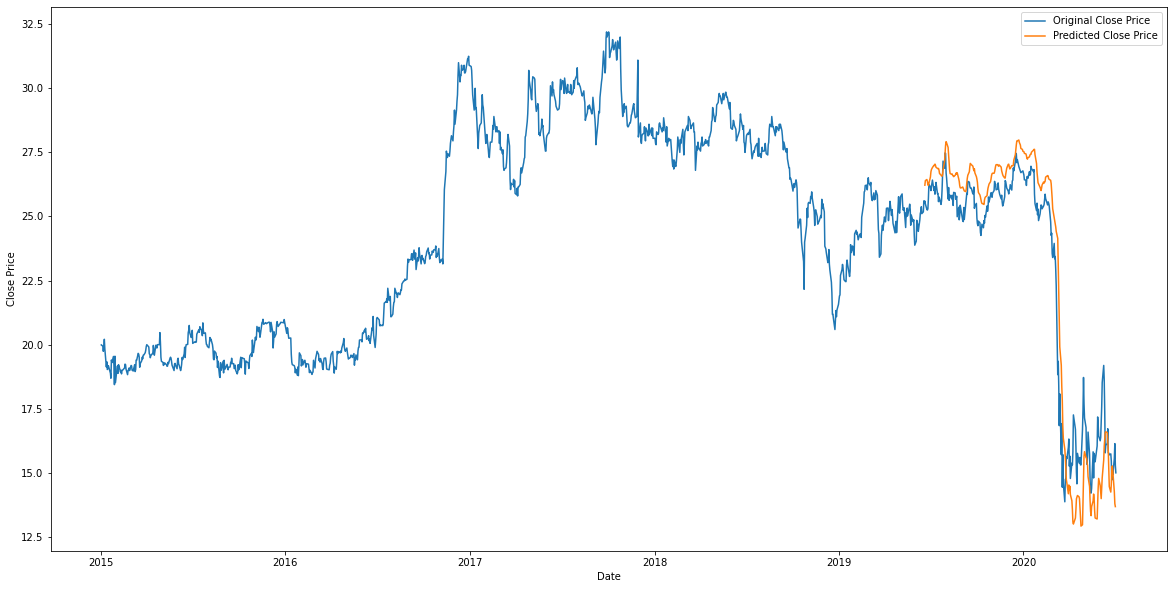

In [ ]:
graph_prediction(UVSP_close, UVSP_rnn_predict_df)

In [ ]:
UVSP_rnn_pred_list = lstm_predict_10_days(UVSP_test, TIMESTEP, UVSP_rnn_model)

In [ ]:
UVSP_rnn_pred_list = transform_data(UVSP_scaler, UVSP_rnn_pred_list)

In [ ]:
UVSP_rnn_10_days_df = pd.DataFrame(UVSP_rnn_pred_list, index = pred_dates, columns = ['Predicted Value'])

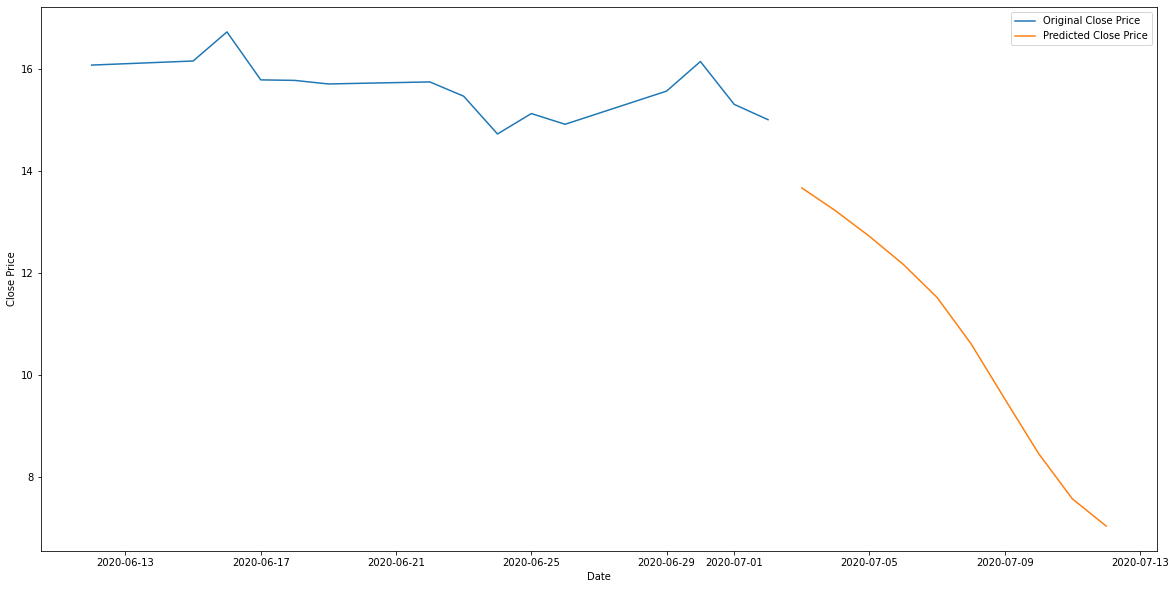

In [ ]:
graph_prediction(UVSP_last_15_days_df, UVSP_rnn_10_days_df)

**Hyperparameter Tuning**

In [ ]:
results = RNN_parameter_tuning(UVSP_X_train, UVSP_y_train, UVSP_X_test, UVSP_y_test)

Combination  1
-------------------------------------------------------
Epoch 1/50
35/35 [==============================] - 5s 42ms/step - loss: 0.2403 - val_loss: 0.0358
Epoch 2/50
35/35 [==============================] - 1s 18ms/step - loss: 0.1353 - val_loss: 0.0356
Epoch 3/50
35/35 [==============================] - 1s 20ms/step - loss: 0.0879 - val_loss: 0.0263
Epoch 4/50
35/35 [==============================] - 1s 18ms/step - loss: 0.0671 - val_loss: 0.0131
Epoch 5/50
35/35 [==============================] - 1s 18ms/step - loss: 0.0456 - val_loss: 0.0272
Epoch 6/50
35/35 [==============================] - 1s 20ms/step - loss: 0.0413 - val_loss: 0.0310
Epoch 7/50
35/35 [==============================] - 1s 20ms/step - loss: 0.0383 - val_loss: 0.0366
Epoch 8/50
35/35 [==============================] - 1s 20ms/step - loss: 0.0326 - val_loss: 0.0338
Epoch 9/50
35/35 [==============================] - 1s 18ms/step - loss: 0.0281 - val_loss: 0.0253
Epoch 10/50
35/35 [===================

Applying parameters in RNN model for UVSP stock

In [ ]:
UVSP_rnn_results_df = pd.DataFrame(results, columns = ['nodes', 'dropout', 'batch_size', 'dense', 'epoch', 'test_acc'])

UVSP_rnn_results_df.sort_values(by = ['test_acc'], inplace = True)

UVSP_rnn_results_df

nodes  dropout  batch_size  dense  epoch  test_acc
5     64      0.2          32      1    100  0.001229
1     32      0.2          32      1    100  0.001374
3     32      0.2          64      1    100  0.002081
7     64      0.2          64      1    100  0.002344
0     32      0.2          32      1     50  0.002956
4     64      0.2          32      1     50  0.004124
6     64      0.2          64      1     50  0.006651
2     32      0.2          64      1     50  0.011966

In [ ]:
tf.keras.backend.clear_session()

nodes, dropout, batch_size, dense, epoch = 64, 0.2, 32, 1, 100

UVSP_tuned_rnn_model = Sequential()
UVSP_tuned_rnn_model.add(SimpleRNN(nodes, return_sequences = True, input_shape = (UVSP_X_train.shape[1], UVSP_X_train.shape[2])))
UVSP_tuned_rnn_model.add(Dropout(dropout))

UVSP_tuned_rnn_model.add(SimpleRNN(nodes, return_sequences = True))
UVSP_tuned_rnn_model.add(Dropout(dropout))

UVSP_tuned_rnn_model.add(SimpleRNN(nodes))
UVSP_tuned_rnn_model.add(Dropout(dropout))

UVSP_tuned_rnn_model.add(Dense(dense))

UVSP_tuned_rnn_model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
UVSP_tuned_rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 15, 64)            4224      
                                                                 
 dropout (Dropout)           (None, 15, 64)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 15, 64)            8256      
                                                                 
 dropout_1 (Dropout)         (None, 15, 64)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 6

In [ ]:
UVSP_tuned_rnn_model.fit(UVSP_X_train, UVSP_y_train, validation_data = (UVSP_X_test, UVSP_y_test), epochs = epoch, batch_size = batch_size, verbose = 1)

Epoch 1/100
35/35 [==============================] - 6s 43ms/step - loss: 0.3139 - val_loss: 0.0332
Epoch 2/100
35/35 [==============================] - 1s 18ms/step - loss: 0.1463 - val_loss: 0.0343
Epoch 3/100
35/35 [==============================] - 1s 15ms/step - loss: 0.0935 - val_loss: 0.0122
Epoch 4/100
35/35 [==============================] - 1s 18ms/step - loss: 0.0733 - val_loss: 0.0151
Epoch 5/100
35/35 [==============================] - 1s 20ms/step - loss: 0.0559 - val_loss: 0.0186
Epoch 6/100
35/35 [==============================] - 1s 18ms/step - loss: 0.0426 - val_loss: 0.0171
Epoch 7/100
35/35 [==============================] - 1s 19ms/step - loss: 0.0390 - val_loss: 0.0109
Epoch 8/100
35/35 [==============================] - 1s 18ms/step - loss: 0.0292 - val_loss: 0.0168
Epoch 9/100
35/35 [==============================] - 1s 19ms/step - loss: 0.0237 - val_loss: 0.0158
Epoch 10/100
35/35 [==============================] - 0s 14ms/step - loss: 0.0236 - val_loss: 0.0210

In [ ]:
UVSP_tuned_rnn_predict = UVSP_tuned_rnn_model.predict(UVSP_X_test)
UVSP_tuned_rnn_y_pred = transform_data(UVSP_scaler, UVSP_tuned_rnn_predict)

In [ ]:
# Model Evaluation
lstm_model_evaluation('UVSP', UVSP_ori_y_test, UVSP_tuned_rnn_y_pred)

Model Evaluation for stock - UVSP
------------------------------------------------
RMSE     : 0.6598736016935811
MSE      : 0.4354331702120589
MAE      : 0.48789043353435174
R2       : 0.979260567751744


In [ ]:
# Create prediction dateframe
UVSP_tuned_rnn_predict_df = create_pred_df(UVSP_close, UVSP_tuned_rnn_y_pred)

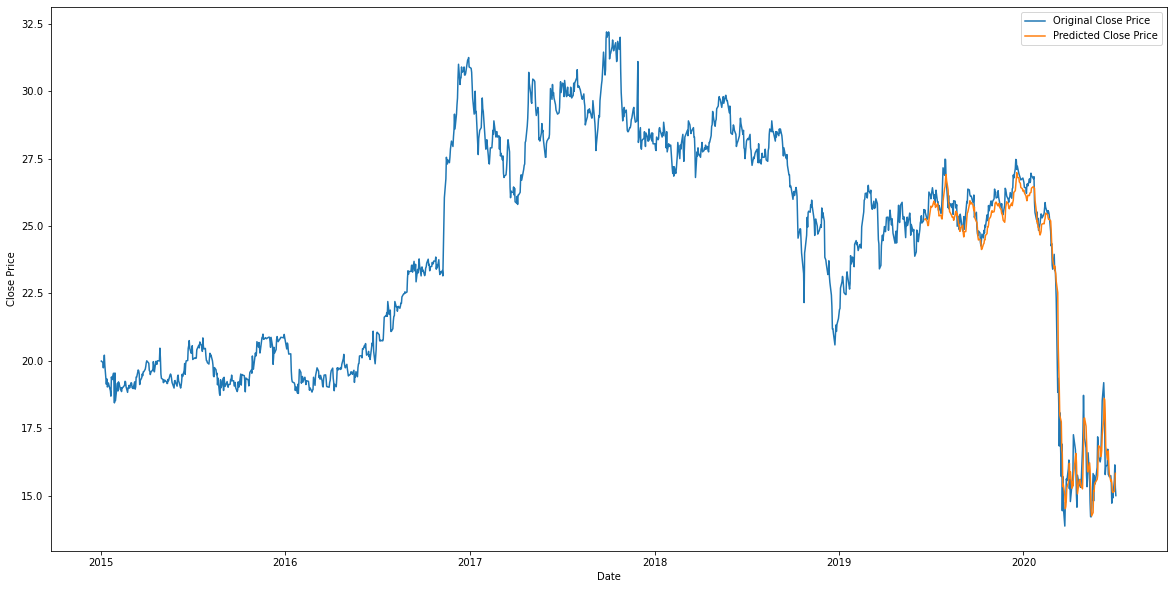

In [ ]:
graph_prediction(UVSP_close, UVSP_tuned_rnn_predict_df)

In [ ]:
UVSP_tuned_rnn_pred_list = lstm_predict_10_days(UVSP_test, TIMESTEP, UVSP_tuned_rnn_model)

In [ ]:
UVSP_tuned_rnn_pred_list = transform_data(UVSP_scaler, UVSP_tuned_rnn_pred_list)

In [ ]:
UVSP_tuned_rnn_10_days_df = pd.DataFrame(UVSP_tuned_rnn_pred_list, index = pred_dates, columns = ['Predicted Value'])

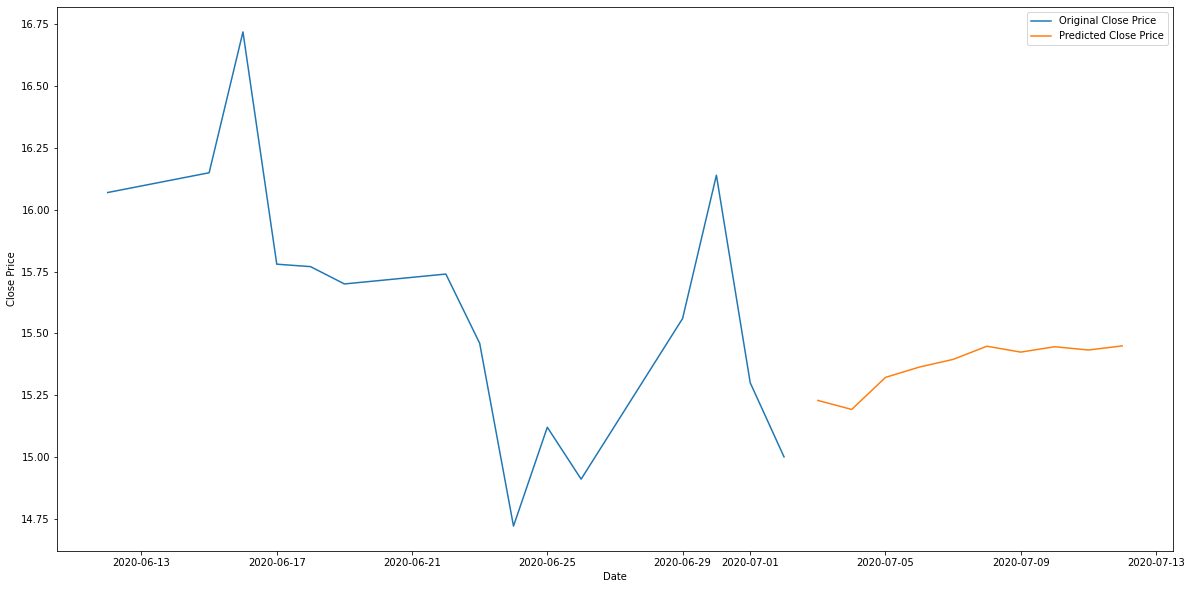

In [ ]:
graph_prediction(UVSP_last_15_days_df, UVSP_tuned_rnn_10_days_df)

**Conclusion**

Getting average model R2 score after parameter tuning

In [ ]:
# Average of Random Forest R2 score
GDX_rf_r2_score = r2_score(GDX_ori_y_test, GDX_tuned_y_pred)
TWTR_rf_r2_score = r2_score(TWTR_ori_y_test, TWTR_tuned_y_pred)
USAK_rf_r2_score = r2_score(USAK_ori_y_test, USAK_tuned_y_pred)
UVSP_rf_r2_score = r2_score(UVSP_ori_y_test, UVSP_tuned_y_pred)

rf_r2_ave = (GDX_rf_r2_score + TWTR_rf_r2_score + USAK_rf_r2_score + UVSP_rf_r2_score) / 4

GDX_lstm_r2_score = r2_score(GDX_ori_y_test, GDX_tuned_lstm_y_pred)
TWTR_lstm_r2_score = r2_score(TWTR_ori_y_test, TWTR_tuned_lstm_y_pred)
USAK_lstm_r2_score = r2_score(USAK_ori_y_test, USAK_tuned_lstm_y_pred)
UVSP_lstm_r2_score = r2_score(UVSP_ori_y_test, UVSP_tuned_lstm_y_pred)

lstm_r2_ave = (GDX_lstm_r2_score + TWTR_lstm_r2_score + USAK_lstm_r2_score + UVSP_lstm_r2_score) / 4

GDX_rnn_r2_score = r2_score(GDX_ori_y_test, GDX_tuned_rnn_y_pred)
TWTR_rnn_r2_score = r2_score(TWTR_ori_y_test, TWTR_tuned_rnn_y_pred)
USAK_rnn_r2_score = r2_score(USAK_ori_y_test, USAK_tuned_rnn_y_pred)
UVSP_rnn_r2_score = r2_score(UVSP_ori_y_test, UVSP_tuned_rnn_y_pred)

rnn_r2_ave = (GDX_rnn_r2_score + TWTR_rnn_r2_score + USAK_rnn_r2_score + UVSP_rnn_r2_score) / 4

In [ ]:
print("Summary")
print("------------------------------------------------------")
print("Random Forest Average R2 score: ", rf_r2_ave)
print("LSTM Average R2 score: ", lstm_r2_ave)
print("RNN Average R2 score: ", rnn_r2_ave)

Summary
------------------------------------------------------
Random Forest Average R2 score:  0.7740644512089047
LSTM Average R2 score:  0.9437750193491001
RNN Average R2 score:  0.9393291470419791


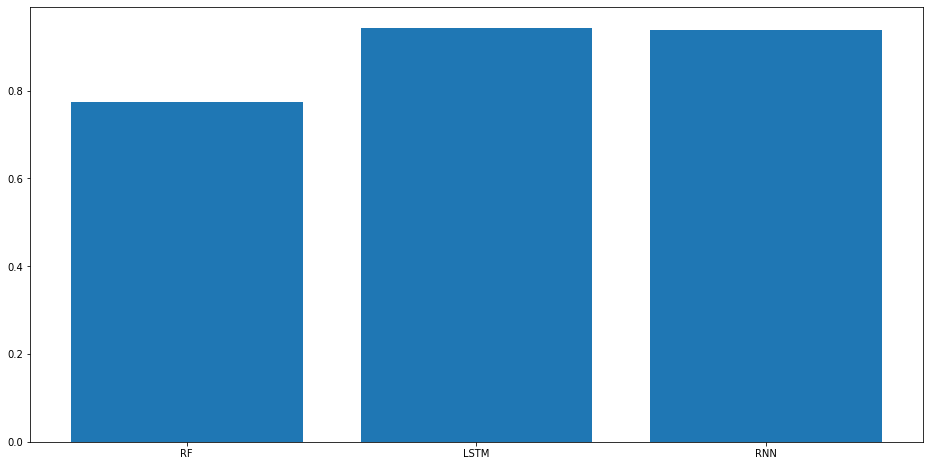

In [ ]:
plt.figure(figsize = (16, 8))

plt.bar(['RF', 'LSTM', 'RNN'], [rf_r2_ave, lstm_r2_ave, rnn_r2_ave])

plt.show()

Stock Analysis chart (GDX)

In [ ]:
GDX_last_25_days_df = GDX_close[len(GDX_close)-25:]

In [ ]:
GDX_tuned_10_days_df.rename(columns = {'Predicted Value' : 'close'}, inplace = True)

In [ ]:
GDX_final_rf_df = GDX_last_25_days_df.append(GDX_tuned_10_days_df)

In [ ]:
GDX_tuned_lstm_10_days_df.rename(columns = {'Predicted Value' : 'close'}, inplace = True)

In [ ]:
GDX_final_lstm_df = GDX_last_25_days_df.append(GDX_tuned_lstm_10_days_df)

In [ ]:
GDX_tuned_rnn_10_days_df.rename(columns = {'Predicted Value' : 'close'}, inplace = True)

In [ ]:
GDX_final_rnn_df = GDX_last_25_days_df.append(GDX_tuned_rnn_10_days_df)

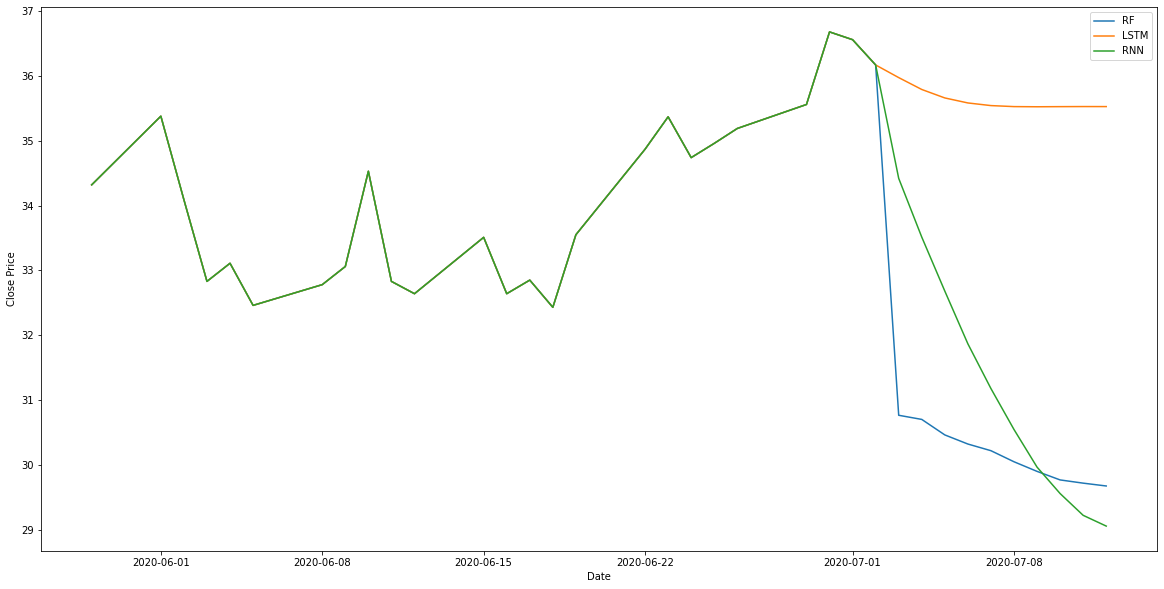

In [ ]:
plt.figure(figsize = (20, 10))

plt.plot(GDX_final_rf_df, label = 'RF')
plt.plot(GDX_final_lstm_df, label = 'LSTM')
plt.plot(GDX_final_rnn_df, label = 'RNN')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.show()

Stock Analysis chart (TWTR)

In [ ]:
TWTR_last_25_days_df = TWTR_close[len(TWTR_close)-25:]

In [ ]:
TWTR_tuned_10_days_df.rename(columns = {'Predicted Value' : 'close'}, inplace = True)

In [ ]:
TWTR_final_rf_df = TWTR_last_25_days_df.append(TWTR_tuned_10_days_df)

In [ ]:
TWTR_tuned_lstm_10_days_df.rename(columns = {'Predicted Value' : 'close'}, inplace = True)

In [ ]:
TWTR_final_lstm_df = TWTR_last_25_days_df.append(TWTR_tuned_lstm_10_days_df)

In [ ]:
TWTR_tuned_rnn_10_days_df.rename(columns = {'Predicted Value' : 'close'}, inplace = True)

In [ ]:
TWTR_final_rnn_df = TWTR_last_25_days_df.append(TWTR_tuned_rnn_10_days_df)

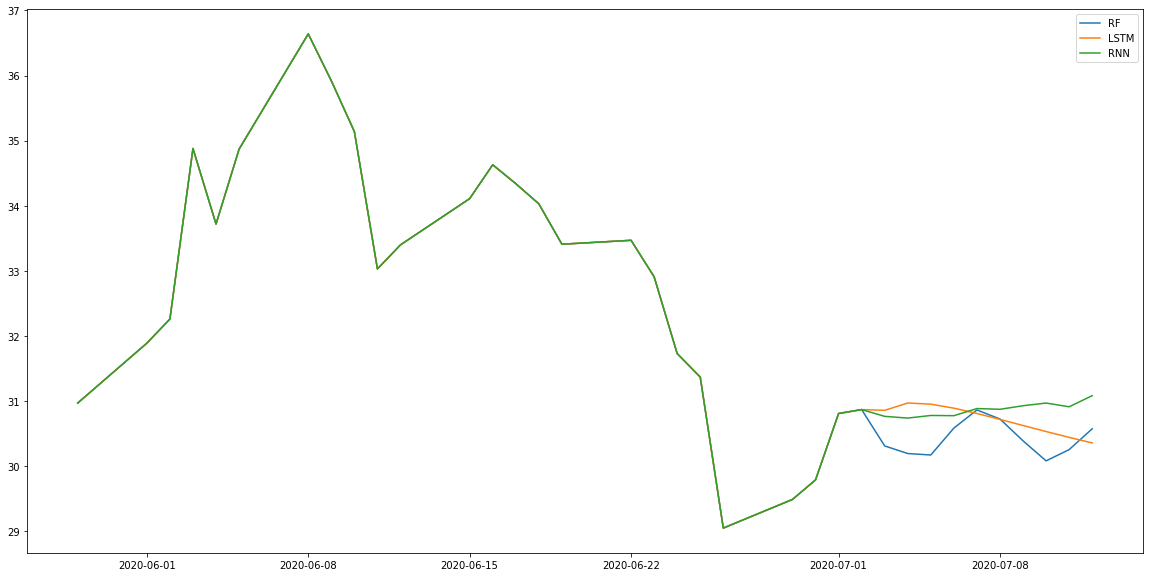

In [ ]:
plt.figure(figsize = (20, 10))

plt.plot(TWTR_final_rf_df, label = 'RF')
plt.plot(TWTR_final_lstm_df, label = 'LSTM')
plt.plot(TWTR_final_rnn_df, label = 'RNN')

plt.legend()

plt.show()

In [ ]:
USAK_last_25_days_df = USAK_close[len(USAK_close)-25:]

In [ ]:
USAK_tuned_10_days_df.rename(columns = {'Predicted Value' : 'close'}, inplace = True)

In [ ]:
USAK_final_rf_df = USAK_last_25_days_df.append(USAK_tuned_10_days_df)

In [ ]:
USAK_tuned_lstm_10_days_df.rename(columns = {'Predicted Value' : 'close'}, inplace = True)

In [ ]:
USAK_final_lstm_df = USAK_last_25_days_df.append(USAK_tuned_lstm_10_days_df)

In [ ]:
USAK_tuned_rnn_10_days_df.rename(columns = {'Predicted Value' : 'close'}, inplace = True)

In [ ]:
USAK_final_rnn_df = USAK_last_25_days_df.append(USAK_tuned_rnn_10_days_df)

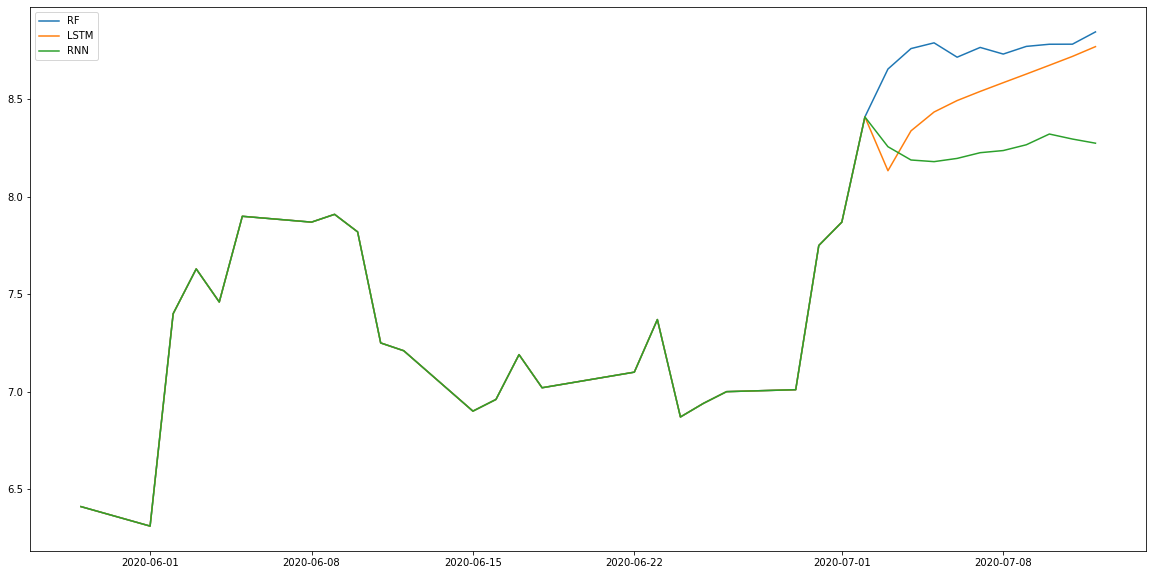

In [ ]:
plt.figure(figsize = (20, 10))

plt.plot(USAK_final_rf_df, label = 'RF')
plt.plot(USAK_final_lstm_df, label = 'LSTM')
plt.plot(USAK_final_rnn_df, label = 'RNN')

plt.legend()

plt.show()

In [ ]:
UVSP_last_25_days_df = UVSP_close[len(UVSP_close)-25:]

In [ ]:
UVSP_tuned_10_days_df.rename(columns = {'Predicted Value' : 'close'}, inplace = True)

In [ ]:
UVSP_final_rf_df = UVSP_last_25_days_df.append(UVSP_tuned_10_days_df)

In [ ]:
UVSP_tuned_lstm_10_days_df.rename(columns = {'Predicted Value' : 'close'}, inplace = True)

In [ ]:
UVSP_final_lstm_df = UVSP_last_25_days_df.append(UVSP_tuned_lstm_10_days_df)

In [ ]:
UVSP_tuned_rnn_10_days_df.rename(columns = {'Predicted Value' : 'close'}, inplace = True)

In [ ]:
UVSP_final_rnn_df = UVSP_last_25_days_df.append(UVSP_tuned_rnn_10_days_df)

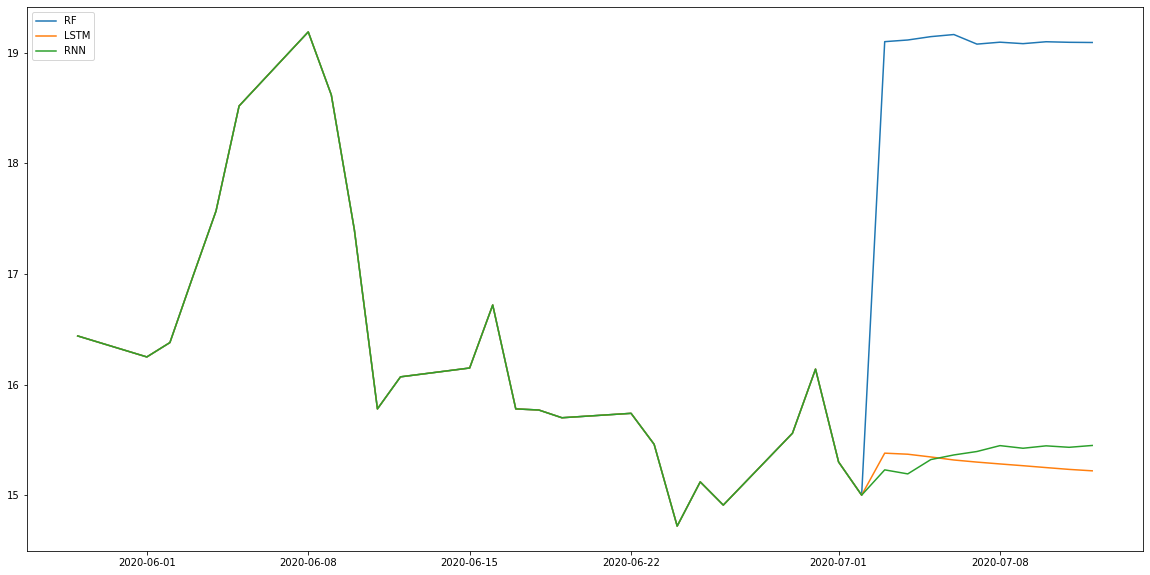

In [ ]:
plt.figure(figsize = (20, 10))

plt.plot(UVSP_final_rf_df, label = 'RF')
plt.plot(UVSP_final_lstm_df, label = 'LSTM')
plt.plot(UVSP_final_rnn_df, label = 'RNN')

plt.legend()

plt.show()